# Marathon - Khám phá bí mật sau những bước chân

Trong phần này chúng ta sẽ phân tích dữ liệu thu thập từ một cuộc chạy đua marathon với 40.000 vận động viên tham dự, cự ly 21km.
Dữ liệu được đính kèm trong tập tin **marathon.csv** 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 1. Đọc dữ liệu từ tập tin marathon.csv theo dạng sau, in 5 dòng dữ liệu đầu
data = pd.read_csv('data\marathon.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>

<div class="output_subarea output_html rendered_html output_result"><div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right">
      <th></th>
      <th>age</th>
      <th>gender</th>
      <th>split</th>
      <th>final</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>33</td>
      <td>M</td>
      <td>01:05:38</td>
      <td>02:08:51</td>
    </tr>
    <tr>
      <th>1</th>
      <td>32</td>
      <td>M</td>
      <td>01:06:26</td>
      <td>02:09:28</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:49</td>
      <td>02:10:42</td>
    </tr>
    <tr>
      <th>3</th>
      <td>38</td>
      <td>M</td>
      <td>01:06:16</td>
      <td>02:13:45</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:32</td>
      <td>02:13:59</td>
    </tr>
  </tbody>
</table>
</div></div>
</details>

In [3]:
# 2a. Kiểm tra lại kiểu dữ liệu của data
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<pre>age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object</pre></details>

In [4]:
# 2b. Đổi kiểu dữ liệu của split và final sang kiểu timedelta64[ns]


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<pre>age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object</pre>
</details>

In [5]:
# 3. Tạo cột 'split_sec' và 'final_sec' cho biết số giây tương ứng với split và final
data['split_sec'] = data['split'].map(lambda x: pd.to_timedelta(x).total_seconds())
data['final_sec'] = data['final'].map(lambda x: pd.to_timedelta(x).total_seconds())
data.head()


,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<div class="output_subarea output_html rendered_html output_result"><div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right">
      <th></th>
      <th>age</th>
      <th>gender</th>
      <th>split</th>
      <th>final</th>
      <th>split_sec</th>
      <th>final_sec</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>33</td>
      <td>M</td>
      <td>01:05:38</td>
      <td>02:08:51</td>
      <td>3938.0</td>
      <td>7731.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>32</td>
      <td>M</td>
      <td>01:06:26</td>
      <td>02:09:28</td>
      <td>3986.0</td>
      <td>7768.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:49</td>
      <td>02:10:42</td>
      <td>4009.0</td>
      <td>7842.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>38</td>
      <td>M</td>
      <td>01:06:16</td>
      <td>02:13:45</td>
      <td>3976.0</td>
      <td>8025.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:32</td>
      <td>02:13:59</td>
      <td>3992.0</td>
      <td>8039.0</td>
    </tr>
  </tbody>
</table>
</div></div></details>

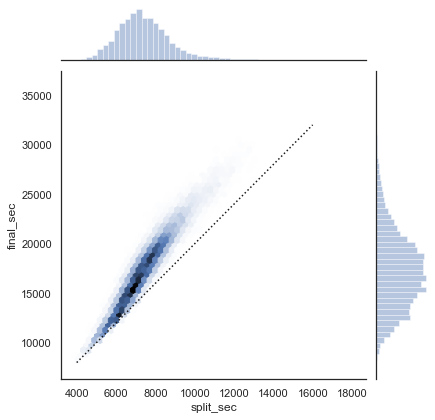

In [18]:
# 4. Tạo biểu đồ joinplot thể hiện mối tương quan giữa "split_sec" và "final_sec"
# Bạn nhận xét gì về biểu đồ vừa tạo, ý nghĩa của đường chéo và đồ thị phân bố 
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),np.linspace(8000, 32000), ':k')

Đường chấm chấm cho thấy thời gian chạy marathon với tốc độ hoàn toàn ổn định. Thực tế là phân bố dữ liệu tập trung ở trên đường này cho thấy hầu hết mọi người chạy chậm lại trong quá trình chạy marathon. Nhưng cũng sẽ có một số vận động viên sẽ chạy nhanh hơn trong nửa sau của cuộc đua - negative split. Thực tế đã chứng minh chạy tốc độ nhanh hơn ở nửa cuối đường đua chính là công thức để lập thành tích cá nhân.

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="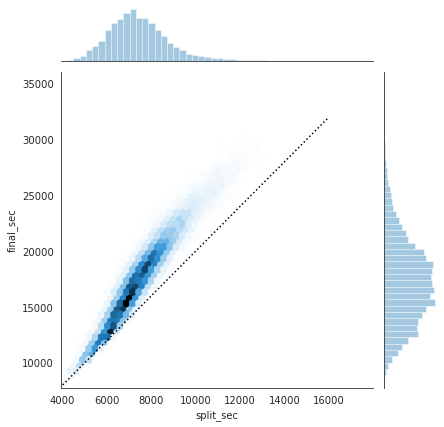
"></details>

In [7]:
# 5. Hãy tạo cột 'split_frac' trong dữ liệu, cho biết vận động viên dùng chiến lược negative-splits hay positive-splits khi chạy
# 'split_frac' = 1 - 2 * 'split_sec' / 'final_sec'

data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<div class="output_subarea output_html rendered_html output_result"><div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right">
      <th></th>
      <th>age</th>
      <th>gender</th>
      <th>split</th>
      <th>final</th>
      <th>split_sec</th>
      <th>final_sec</th>
      <th>split_frac</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>33</td>
      <td>M</td>
      <td>01:05:38</td>
      <td>02:08:51</td>
      <td>3938.0</td>
      <td>7731.0</td>
      <td>-0.018756</td>
    </tr>
    <tr>
      <th>1</th>
      <td>32</td>
      <td>M</td>
      <td>01:06:26</td>
      <td>02:09:28</td>
      <td>3986.0</td>
      <td>7768.0</td>
      <td>-0.026262</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:49</td>
      <td>02:10:42</td>
      <td>4009.0</td>
      <td>7842.0</td>
      <td>-0.022443</td>
    </tr>
    <tr>
      <th>3</th>
      <td>38</td>
      <td>M</td>
      <td>01:06:16</td>
      <td>02:13:45</td>
      <td>3976.0</td>
      <td>8025.0</td>
      <td>0.009097</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:32</td>
      <td>02:13:59</td>
      <td>3992.0</td>
      <td>8039.0</td>
      <td>0.006842</td>
    </tr>
  </tbody>
</table>

</div></div></details>

Trong trường hợp split_frac nhỏ hơn 0, người chạy đang dùng chiến lược **negative-split**.


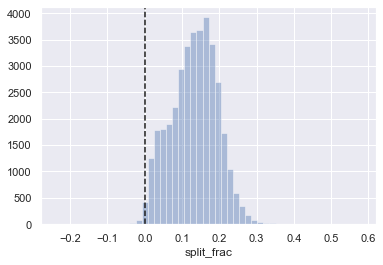

In [8]:
# 6. Vẽ đồ thị phân bố theo split_frac 
# Bạn nhận xét gì về biểu đồ vừa tạo
sns.set()
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfUAAAFmCAYAAAB0ugP8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtwlPd97/HPrtYCabXCiF0WIlo5QcOERshu8YTiixxL
WIqkyEgmdmtPZRs8XMaOCcTYCVBzcSLXtSdjZsrJjKBJHUwbT7lIHmpxZCROuJw02JGTI0OgU5yj
YDvo8YrFaLUSUkHP+UP1HhNJrNBlV/rt+zWTmej3e57d78PPu599br/HYdu2LQAAMOE5410AAAAY
HYQ6AACGINQBADAEoQ4AgCEIdQAADEGoAwBgiCGHem9vryoqKrRq1SpJ0qVLl7Rs2TIVFRXpiSee
UCgUiixbXV2twsJCFRcX6/jx45H2U6dOqaysTEVFRaqqqhrFzQAAAEMO9V27dmn27NmRv3fs2KGF
Cxeqvr5eCxYsUHV1tSTp7NmzOnjwoOrq6rRz505t3bpVn90Kv2XLFlVVVam+vl4tLS06duzYKG8O
AACJa0ih3traqiNHjujBBx+MtDU2NqqiokKSVFFRoYaGBknS4cOHVVJSIpfLpVmzZikrK0vNzc0K
BAIKh8PKzc2VJJWXl0fWAQAAIzekUH/xxRf13HPPyeFwRNouXLggr9crSfL5fAoGg5Iky7I0c+bM
yHJ+v1+WZcmyLM2YMaNfOwAAGB1RQ/3nP/+5vF6v5s6dq+vNKPv5wAcAALHnirbAe++9p8OHD+vI
kSPq7u5WOBzWs88+K6/Xq7a2Nnm9XgUCAWVkZEjq2wM/f/58ZP3W1lb5/f5+7ZZlye/3Ry3wypWr
crmShrNtAAAklKih/p3vfEff+c53JEnvvPOOfvKTn+iVV17Ryy+/rP3792vFihWqqalRQUGBJCk/
P1/r1q3T448/LsuydO7cOeXm5srhcMjj8ai5uVnz5s1TbW2tKisroxZ48WLnCDcx/nw+jwKBUPQF
Mebmz8+R0+nQu+++H+9SID4b4wljMX74fJ5hrxs11AezYsUKrVmzRvv27VNmZqa2bdsmScrOzlZx
cbFKS0vlcrm0efPmyKH5TZs2af369eru7lZeXp7y8vKGXTgAALiWY7w/etWEX478Ah4/2FMfX/hs
jB+Mxfgxkj11ZpQDAMAQwz78DsB8tm0rFGq/7jIeTzp3vwDjBKEOYFChULsOnTirlFT3gP1dnWHd
tyBb6elTYlwZgIEQ6kgoTU0nOXd4g1JS3Up1D/8cH4DY4Zw6AACGINQBADAEoQ4AgCEIdQAADEGo
AwBgCEIdCWX+/Bzdcsst8S4DAMYEoQ4AgCEIdQAADEGoAwBgCEIdAABDEOoAABiCUEdCaWo6qZaW
lniXAQBjglAHAMAQhDoAAIYg1AEAMATPUwcSmG3bCoXaB+0PhdolO4YFARgRQh1IYKFQuw6dOKuU
VPeA/cE2S6nudKWmeWJcGYDhINSRUObPz5HT6dC7774f71LGjZRUt1LdA4d2Z7gjxtUAGAlCHTAY
h9eBxEKoAwbj8DqQWAh1wHAcXgcSB7e0AQBgCEIdAABDEOpIKMz9DsBkhDoAAIYg1AEAMETUUO/p
6dGDDz6o8vJylZWVafv27ZKk7du3Ky8vTxUVFaqoqNDRo0cj61RXV6uwsFDFxcU6fvx4pP3UqVMq
KytTUVGRqqqqxmBzAABIXFFvaUtOTtauXbuUkpKiq1ev6uGHH1ZeXp4kaenSpVq6dOk1y3/wwQc6
ePCg6urq1NraqqVLl+rtt9+Ww+HQli1bVFVVpdzcXC1fvlzHjh3T3XffPTZbBgBAghnS4feUlBRJ
fXvtV65cibTbdv+pqBobG1VSUiKXy6VZs2YpKytLzc3NCgQCCofDys3NlSSVl5eroaFhNLYBAABo
iKHe29ur8vJy3Xnnnbrzzjsjwbx7924tXrxYGzduVCgUkiRZlqWZM2dG1vX7/bIsS5ZlacaMGf3a
gViaPz9Ht9xyS7zLAIAxMaQZ5ZxOp2pra9XR0aGnnnpKZ8+e1SOPPKKnnnpKDodDr776ql566aUx
OU8+dWqqXK6kUX/dWPP5mIZzPHA6HZISZzySk3uV5g7KnTZ5wP6ucLKczpvkGWa/Uz3yej2aMmX4
/56JMhYTAWMx8d3QNLFpaWn66le/qmPHjl1zLv2hhx7SqlWrJPXtgZ8/fz7S19raKr/f36/dsiz5
/f6o73nxYueNlDgu+XweBQKheJcBSb29tpxOR8KMR3t7SB3hbvXq8oD94XCPnM6rmpQyvP7OcLfa
2kLq6RnejTR8NsYPxmL8GMmPq6ifxGAwGDm0fvnyZf3iF7/Ql770JQUCgcgyhw4d0pw5cyRJ+fn5
qqurU09Pjz788EOdO3dOubm58vl88ng8am5ulm3bqq2tVUFBwbALBwAA14q6px4IBPS9731Pvb29
6u3tVUlJie655x4999xzOn36tJxOpzIzM/XCCy9IkrKzs1VcXKzS0lK5XC5t3rxZDkffIc9NmzZp
/fr16u7uVl5eXuQqegAAMHIOe6BL2McREw4HcVhr/Jg/P0dOp0Pvvvt+vEuJifb2Szr+/vlBn9LW
9sl5OZ1JyvBOH1Z/Zziku+bNVHr6lGHVx2dj/GAsxo8xPfwOmIS53wGYjOepAxg227YVCrVfdxmP
Jz1yCg7A2CLUAQxbV2dYR94L6uaMaYP237cge9iH5wHcGEIdmMCi7SmHQu3SGF81MzklddBz9gBi
i1AHJrBQqF2HTpxVSqp7wP5gm6VUd7pS0whdIBEQ6sAEl5LqHnRPuTPcEeNqAMQTV78joTD3OwCT
EeoAABiCUAcAwBCEOgAAhiDUAQAwBKEOAIAhCHUkFOZ+B2AyQh0AAEMQ6gAAGIJQBwDAEIQ6AACG
INQBADAEoY6EwtzvAExGqAMAYAhCHQAAQxDqAAAYglAHAMAQhDoAAIYg1JFQmPsdgMkIdQAADEGo
AwBgCEIdAABDEOoAABgiaqj39PTowQcfVHl5ucrKyrR9+3ZJ0qVLl7Rs2TIVFRXpiSeeUCgUiqxT
XV2twsJCFRcX6/jx45H2U6dOqaysTEVFRaqqqhqDzQEAIHFFDfXk5GTt2rVLtbW1qq2t1dGjR9Xc
3KwdO3Zo4cKFqq+v14IFC1RdXS1JOnv2rA4ePKi6ujrt3LlTW7dulW3bkqQtW7aoqqpK9fX1amlp
0bFjx8Z264A/wtzvAEw2pMPvKSkpkvr22q9cuSJJamxsVEVFhSSpoqJCDQ0NkqTDhw+rpKRELpdL
s2bNUlZWlpqbmxUIBBQOh5WbmytJKi8vj6wDAABGbkih3tvbq/Lyct1555268847lZubqwsXLsjr
9UqSfD6fgsGgJMmyLM2cOTOyrt/vl2VZsixLM2bM6NcOAABGx5BC3el0XnPo/T//8z/lcDiuWeaP
/wYAALHlupGF09LS9NWvflXHjh3TtGnT1NbWJq/Xq0AgoIyMDEl9e+Dnz5+PrNPa2iq/39+v3bIs
+f3+qO85dWqqXK6kGylzXPL5PPEuAZKczr4fn6aMR3Jyr9LcQbnTJg/Y3xVOltN5kzxx6neqR16v
R1OmDP7vbcpYmICxmPiihnowGNRNN90kj8ejy5cv6xe/+IVWrFih/Px87d+/XytWrFBNTY0KCgok
Sfn5+Vq3bp0ef/xxWZalc+fOKTc3Vw6HQx6PR83NzZo3b55qa2tVWVkZtcCLFztHvpVx5vN5FAiE
oi+IMdfba8vpdBgzHu3tIXWEu9WrywP2h8M9cjqvalJKfPo7w91qawupp2fgg4J8NsYPxmL8GMmP
q6ihHggE9L3vfU+9vb3q7e1VSUmJ7rnnHt16661as2aN9u3bp8zMTG3btk2SlJ2dreLiYpWWlsrl
cmnz5s2RQ/ObNm3S+vXr1d3drby8POXl5Q27cGA4mppO8uUFwFgO+7P7zcYpE758CZHxZSKNh23b
CoXaB+0Phdr1f/5vWKlpA/+yb/vkvJzOJGV4p8elvzMc0l3zZio9fcqA/RNpLEzHWIwfY7qnDiB+
QqF2HTpxVimp7gH7g22WUt3pg4Y6gMRCqAPjXEqqW6nugUO7M9wR42oAjGfM/Q4AgCEIdQAADEGo
I6Ew9zsAkxHqAAAYglAHAMAQhDoAAIYg1AEAMAShDgCAIQh1JJSmppNqaWmJdxkAMCYIdQAADEGo
AwBgCEIdAABDEOoAABiCUAcAwBCEOhIKc78DMBmhDgCAIQh1AAAM4Yp3AQDMZdu2QqH2QfuTk3vV
3h6Sx5Muh8MRw8oAMxHqAMZMV2dYR94L6uaMaQP2p7mDCgSCum9BttLTp8S4OsA8hDqAMTU5JVWp
bs+Afe60yeoId8e4IsBcnFNHQmHudwAmI9QBADAEoQ4AgCEIdQAADEGoAwBgCEIdAABDEOpIKMz9
DsBkUUO9tbVVjz76qEpLS1VWVqbXX39dkrR9+3bl5eWpoqJCFRUVOnr0aGSd6upqFRYWqri4WMeP
H4+0nzp1SmVlZSoqKlJVVdUYbA4AAIkr6uQzSUlJWr9+vebOnatwOKwHHnhAd9xxhyRp6dKlWrp0
6TXLf/DBBzp48KDq6urU2tqqpUuX6u2335bD4dCWLVtUVVWl3NxcLV++XMeOHdPdd989NlsGAECC
ibqn7vP5NHfuXEmS2+3W7Nmz9cknn0jqm9f5jzU2NqqkpEQul0uzZs1SVlaWmpubFQgEFA6HlZub
K0kqLy9XQ0PDaG4LAAAJ7YbOqX/00Uc6c+ZMJJh3796txYsXa+PGjQqFQpIky7I0c+bMyDp+v1+W
ZcmyLM2YMaNfOwAAGB1DDvVwOKzVq1drw4YNcrvdeuSRR9TY2Kg333xTXq9XL7300ljWCQAAohjS
A12uXLmi1atXa/HixVq0aJEkKSMjI9L/0EMPadWqVZL69sDPnz8f6WttbZXf7+/XblmW/H5/1Pee
OjVVLlfS0LZmHPP5Bn6gBWLr3Lnfx7uEG5Kc3Ks0d1DutMkD9neFk+V03iTPBO2XpDT3JHm9Hk2Z
wmck3viemviGFOobNmxQdna2HnvssUhbIBCQz+eTJB06dEhz5syRJOXn52vdunV6/PHHZVmWzp07
p9zcXDkcDnk8HjU3N2vevHmqra1VZWVl1Pe+eLFzONs1rvh8HgUCoXiXgf82kcajvT2kjnC3enV5
wP5wuEdO51VNSpmY/Z7/fkpbW1tIPT3cYRtPE+lzYbqR/LiKGupNTU06cOCA5syZo/LycjkcDq1d
u1b/9m//ptOnT8vpdCozM1MvvPCCJCk7O1vFxcUqLS2Vy+XS5s2b5XA4JEmbNm3S+vXr1d3drby8
POXl5Q27cAAAcK2ooT5//nydPn26X/v1AnnlypVauXJlv/acnBwdOHDgBksEAABDwfEuAAAMQagD
AGAIQh0JhbnfAZiMUAcAwBCEOgAAhiDUAQAwBKEOAIAhCHUAAAxBqCOhNDWdVEtLS7zLAIAxQagD
AGAIQh0AAEMQ6gAAGIJQBwDAEIQ6AACGINSRUJj7HYDJCHUAAAzhincBQCKzbVuhUPug/aFQu2TH
sCAAExqhDsRRKNSuQyfOKiXVPWB/sM1SqjtdqWmeGFcGYCIi1IE4S0l1K9U9cGh3hjtiXA2AiYxz
6gAAGIJQR0Jh7ncAJiPUAQAwBKEOAIAhCHUAAAxBqAMAYAhCHQAAQxDqSCjM/Q7AZIQ6AACGINQB
ADAEoQ4AgCGihnpra6seffRRlZaWqqysTLt27ZIkXbp0ScuWLVNRUZGeeOIJhUKhyDrV1dUqLCxU
cXGxjh8/Hmk/deqUysrKVFRUpKqqqjHYHAAAElfUUE9KStL69ev11ltv6Y033tA///M/64MPPtCO
HTu0cOFC1dfXa8GCBaqurpYknT17VgcPHlRdXZ127typrVu3yrb7nh25ZcsWVVVVqb6+Xi0tLTp2
7NjYbh0AAAkkaqj7fD7NnTtXkuR2uzV79mxZlqXGxkZVVFRIkioqKtTQ0CBJOnz4sEpKSuRyuTRr
1ixlZWWpublZgUBA4XBYubm5kqTy8vLIOkCsMPc7AJPd0Dn1jz76SGfOnNGtt96qCxcuyOv1SuoL
/mAwKEmyLEszZ86MrOP3+2VZlizL0owZM/q1AwCA0THk56mHw2GtXr1aGzZskNvtlsPhuKb/j/8e
LVOnpsrlShqT144ln2/g52UjPsbLeCQn9yrNHZQ7bfKA/V3hZDmdN8ljaL8kpbknyev1aMqU8TEm
iWy8fC4wfEMK9StXrmj16tVavHixFi1aJEmaNm2a2tra5PV6FQgElJGRIalvD/z8+fORdVtbW+X3
+/u1W5Ylv98f9b0vXuy8oQ0aj3w+jwKBUPQFERPjaTza20PqCHerV5cH7A+He+R0XtWkFDP7PWmT
1RHuVltbSD093IwTT+Ppc5HoRvLjakifog0bNig7O1uPPfZYpC0/P1/79++XJNXU1KigoCDSXldX
p56eHn344Yc6d+6ccnNz5fP55PF41NzcLNu2VVtbG1kHAACMXNQ99aamJh04cEBz5sxReXm5HA6H
1q5dq+XLl2vNmjXat2+fMjMztW3bNklSdna2iouLVVpaKpfLpc2bN0cOzW/atEnr169Xd3e38vLy
lJeXN7ZbBwBAAoka6vPnz9fp06cH7HvttdcGbF+5cqVWrlzZrz0nJ0cHDhy4sQqBUTR/fo6cTofe
fff9eJcCAKOOk1gAABiCUAcAwBBDvqUNwI2zbVuhUPug/aFQu2THsCAARiPUgTEUCrXr0ImzSkl1
D9gfbLOU6k5Xahr3BwMYOUIdGGMpqW6lugcO7c5wR4yrAWAyzqkjoTD3OwCTEeoAABiCUAcAwBCE
OgAAhuBCOWAEuGUNwHhCqAMjwC1rAMYTQh0J5Ubnfh/KnnhKCresARgfCHXgOtgTBzCREOpAFEwe
A2Ci4Op3AAAMwZ46gLiKdt2CJHk86XI4HDGqCJi4CHUAcdXVGdaR94K6OWPaoP33LchWevqUGFcG
TDyEOhJKU9NJ+XweBQKheJeCz5mckjrodQsAho5z6gAAGIJQBwDAEIQ6AACGINQBADAEoQ4AgCEI
dSSU+fNzdMstt8S7DAAYE4Q6AACGINQBADAEoQ4AgCEIdQAADEGoAwBgiKihvmHDBt1xxx0qKyuL
tG3fvl15eXmqqKhQRUWFjh49Gumrrq5WYWGhiouLdfz48Uj7qVOnVFZWpqKiIlVVVY3yZgBD09R0
Ui0tLfEuAwDGRNRQf+CBB/TjH/+4X/vSpUtVU1Ojmpoa5eXlSZI++OADHTx4UHV1ddq5c6e2bt0q
27YlSVu2bFFVVZXq6+vV0tKiY8eOjfKmAACQ2KKG+u2336709PR+7Z+F9ec1NjaqpKRELpdLs2bN
UlZWlpqbmxUIBBQOh5WbmytJKi8vV0NDwyiUDwAAPjPsc+q7d+/W4sWLtXHjRoVCfY+xtCxLM2fO
jCzj9/tlWZYsy9KMGTP6tQMAgNEzrFB/5JFH1NjYqDfffFNer1cvvfTSaNcFAABukGs4K2VkZET+
/0MPPaRVq1ZJ6tsDP3/+fKSvtbVVfr+/X7tlWfL7/UN6r6lTU+VyJQ2nzHHF5/PEuwR8zlDHIzm5
V2nuoNxpkwfs7wony+m8SR76h9UvSW739Zdxqkder0dTpvAZGmt8T018Qwr1Pz5/HggE5PP5JEmH
Dh3SnDlzJEn5+flat26dHn/8cVmWpXPnzik3N1cOh0Mej0fNzc2aN2+eamtrVVlZOaQCL17svJHt
GZd8Po8CgVC8y4D65n53Oh169933h7R8e3tIHeFu9erygP3hcI+czqualEL/cPo9aZOjLtMZ7lZb
W0g9PdyBO5b4nho/RvLjKmqoP/PMMzpx4oQ+/fRTfe1rX9PTTz+tEydO6PTp03I6ncrMzNQLL7wg
ScrOzlZxcbFKS0vlcrm0efNmORwOSdKmTZu0fv16dXd3Ky8vL3LFPAAAGB1RQ/2HP/xhv7YlS5YM
uvzKlSu1cuXKfu05OTk6cODADZYHAACGiuNZAAAYglAHAMAQhDoAAIYg1JFQmPsdgMkIdQAADEGo
AwBgCEIdAABDEOoAABiCUAcAwBCEOhLK/Pk5uuWWW+JdBgCMCUIdAABDEOoAABiCUAcAwBCEOgAA
hoj66FXAVLZtKxRqv+4yoVC7ZMeoIAAYIUIdCaWp6aR8Po8CgZBCoXYdOnFWKanuQZcPtllKdacr
Nc0TwyoBYHgIdSS0lFS3Ut2DB3ZnuCOG1QDAyHBOHQAAQxDqAAAYglAHAMAQhDoAAIYg1JFQmPsd
gMkIdQAADEGoAwBgCEIdAABDEOoAABiCUAcAwBCEOhJKU9NJtbS0xLsMABgThDoAAIaIGuobNmzQ
HXfcobKyskjbpUuXtGzZMhUVFemJJ55QKBSK9FVXV6uwsFDFxcU6fvx4pP3UqVMqKytTUVGRqqqq
RnkzAABA1FB/4IEH9OMf//iath07dmjhwoWqr6/XggULVF1dLUk6e/asDh48qLq6Ou3cuVNbt26V
bfc9jHrLli2qqqpSfX29WlpadOzYsTHYHACm+ey59+3tlwb932ffM0Cii/ro1dtvv10ff/zxNW2N
jY3avXu3JKmiokKVlZVat26dDh8+rJKSErlcLs2aNUtZWVlqbm7WF77wBYXDYeXm5kqSysvL1dDQ
oLvvvnsMNgmASbo6wzryXlA3Z0wbtP++BdlKT58S48qA8WdYz1MPBoPyer2SJJ/Pp2AwKEmyLEu3
3XZbZDm/3y/LspSUlKQZM2b0aweAoZicknrd594D6DMqF8o5HI7ReBlgzDH3OwCTDWtPfdq0aWpr
a5PX61UgEFBGRoakvj3w8+fPR5ZrbW2V3+/v125Zlvx+/5Dea+rUVLlcScMpc1zx+djLGA+czr4f
oD6fR8nJvUpzB+VOmzzo8l3hZDmdN8kzyDL0j6xfktzukb2GUz3yej2aMoXP2EjxPTXxDSnU//gi
lPz8fO3fv18rVqxQTU2NCgoKIu3r1q3T448/LsuydO7cOeXm5srhcMjj8ai5uVnz5s1TbW2tKisr
h1TgxYudN7hJ44/P51EgEIq+IMZcb68tp9OhQCCk9vaQOsLd6tXlQZcPh3vkdF7VpJSBl6F/ZP2e
tMkjfo3OcLfa2kLq6eEO3ZHge2r8GMmPq6ih/swzz+jEiRP69NNP9bWvfU1PP/20VqxYoW9/+9va
t2+fMjMztW3bNklSdna2iouLVVpaKpfLpc2bN0cOzW/atEnr169Xd3e38vLylJeXN+yiAQBAf1FD
/Yc//OGA7a+99tqA7StXrtTKlSv7tefk5OjAgQM3Vh0AABgyjlcBAGAIQh0JhbnfAZiMUAcAwBCE
OgAAhiDUAQAwBKEOAIAhCHUAAAxBqCOhMPc7AJMR6gAAGIJQBwDAEIQ6AACGINQBADAEoQ4AgCEI
dSQU5n4HYDJCHQAAQxDqAAAYglAHAMAQhDoAAIYg1AEAMAShjoTC3O8ATEaoAwBgCEIdAABDEOoA
ABiCUAcAwBCEOgAAhiDUkVCY+x2AyVzxLgAARsK2bYVC7dddxuNJl8PhiFFFQPwQ6gAmtK7OsI68
F9TNGdMG7b9vQbbS06fEuDIg9gh1ABPe5JRUpbo98S4DiDvOqQMAYIgR7ann5+crLS1NTqdTLpdL
e/fu1aVLl7R27Vp9/PHHmjVrlrZt2yaPp+8XdHV1tfbt26ekpCRt3LhRd91116hsBAAAGOGeusPh
0Ouvv67a2lrt3btXkrRjxw4tXLhQ9fX1WrBggaqrqyVJZ8+e1cGDB1VXV6edO3dq69atsm175FsA
3ADmfgdgshGFum3b6u3tvaatsbFRFRUVkqSKigo1NDRIkg4fPqySkhK5XC7NmjVLWVlZam5uHsnb
AwCAzxnxnvqyZcu0ZMkS7dmzR5J04cIFeb1eSZLP51MwGJQkWZalmTNnRtb1+/2yLGskbw8AAD5n
ROfUf/azn2n69OkKBoNatmyZvvjFL/a7F3Sk94ZOnZoqlytpRK8xHvh8XJk7Hjidff89+nweJSf3
Ks0dlDtt8qDLd4WT5XTeJM8gy9A/sn5JcrvH9j2c6pHX69GUKXwGo+F7auIbUahPnz5dkpSRkaFF
ixapublZ06ZNU1tbm7xerwKBgDIyMiT17ZmfP38+sm5ra6v8fn/U97h4sXMkJY4LPp9HgUAo3mVA
Um+vLafToUAgpPb2kDrC3erV5UGXD4d75HRe1aSUgZehf2T9nrTJY/4eneFutbWF1NPDzT7Xw/fU
+DGSH1fD/q+8q6tL4XBYktTZ2anjx49rzpw5ys/P1/79+yVJNTU1KigokNR3pXxdXZ16enr04Ycf
6ty5c8rNzR124QAA4FrD3lNva2vTt771LTkcDl29elVlZWW66667lJOTozVr1mjfvn3KzMzUtm3b
JEnZ2dkqLi5WaWmpXC6XNm/ezLSNiLmmppPskQAw1rBD/U/+5E/05ptv9mu/+eab9dprrw24zsqV
K7Vy5crhviUAALgOpomFsQZ70Edycq/a20N9fUyVAMAghDqMFQq169CJs0pJdV/TnuYOqiPcrWCb
pVR3ulLTuOIXgBkIdRgtJdXd70Ef7rTJ6tVldYY74lQVAIwN7vEAAMAQhDoSylOVBXrsAR4kBMBM
hDoAAIYg1AEAMAQXygEw2mC3Nn6ex5POZFgwAqEOwGhdnWEdeS+omzOmDdp/34JspadPiXFlwOgj
1AEYb3JKar9bGwETEepIKP/j9UZ50iYr1DH4k9kAYKLiQjkAAAxBqAMAYAhCHQAAQxDqAAAYglAH
AMAQhDoSCnO/AzAZoQ4AgCEIdQAADEGoAwBgCGaUA5DQeOALTEKoA0hoPPAFJiHUkVCY+x0D4YEv
MAXn1AEAMAShDgCAIQh1AAAMwTl1TFjRrloOhdolO4YFAUCcEeqYsEKhdh06cVYpqe4B+4NtllLd
6UpN4wIoDB+3vGEiIdQxoaWkuge9arkz3NGv7anKAjkcDm3f1TDWpcEQ3PKGiSTmoX706FG9+OKL
sm1bS5YiB6EwAAAJlUlEQVQs0YoVK2JdAgDcEG55w0QR01Dv7e3V97//fb322muaPn26vvnNb6qg
oECzZ8+OZRkAMGo4PI/xJKah3tzcrKysLGVmZkqSSktL1djYSKhjQFwIh4kg2uH5znCHFn7FL48n
fcB+2+77j/h6oc+PAgxVTEPdsizNnDkz8rff79f7778fyxIQQ9FCOdqXWSjUrl+e+kQpbi6Ew/h2
vcPzneEOHXnv3KChH2yz5HS6hv2jQOKHAf4/LpQbRE9Pj06888vrLjP3y3+m5OSbor5WcnKv2ttD
o1XahBEKtet/Nf1fTZ6cMmD/xWCbnM4kTbl56qD9bnf6oKEuSZe7OtUZHvjf9nJXWE6n65r+3l5b
TqfUGQ4N2D+U16B/9Pqd6ol7DbHqH67LXWH9z/99etDPiRT9s3T5cpfunf/F6/4wSNTvqViKxcWU
MQ11v9+vP/zhD5G/LcvS9OnTr7uOzxe/vbAHKkpH7bWmTEnMK2Nvu+3P4l3CNR4r/0P0hRBjufEu
AP8tUb+nTBLTGeXmzZunc+fO6eOPP1ZPT4/eeustFRQUxLIEAACMFdM99aSkJD3//PNatmyZbNvW
N7/5TS6SAwBglDjsz66wAAAAExoPdAEAwBCEOgAAhiDUAQAwBKE+Bi5duqRly5apqKhITzzxhEKh
/vd+tra26tFHH1VpaanKysq0a9euOFRqrqNHj+rrX/+6ioqKtGPHjgGX+cEPfqDCwkItXrxYp0+f
jnGFiSPaWBw4cED333+/7r//fj388MP6j//4jzhUmTiG8tmQ+mYA/cpXvqK33347htUllqGMxYkT
J1ReXq5vfOMbqqysjP6iNkbdyy+/bO/YscO2bduurq62X3nllX7LfPLJJ/Zvf/tb27Ztu6Ojwy4s
LLTPnj0b0zpNdfXqVXvRokX2Rx99ZPf09Nj3339/v3/bn//85/by5ctt27bt3/zmN/aDDz4Yj1KN
N5Sx+PWvf223t7fbtm3bR44cYSzG0FDG47PlHn30UXvFihV2fX19HCo131DGor293S4pKbFbW1tt
27btCxcuRH1d9tTHQGNjoyoqKiRJFRUVamjo/5hPn8+nuXPnSpLcbrdmz56tTz75JKZ1murzzxi4
6aabIs8Y+LzGxkaVl5dLkm699VaFQiG1tbXFo1yjDWUsbrvtNnk8nsj/tywrHqUmhKGMhyS9/vrr
KioqUkZGRhyqTAxDGYsDBw6osLBQfr9fkoY0HoT6GAgGg/J6vZL6wjsYDF53+Y8++khnzpxRbi4z
a42GgZ4x8Mc/mD755BPNmDHjmmUIk9E3lLH4vD179igvLy8WpSWkoYyHZVlqaGjQI488EuvyEspQ
xqKlpUWXLl1SZWWllixZotra2qivy9zvw7R06dIB9+zWrFnTr+16D1EIh8NavXq1NmzYIPd15jgH
TPfLX/5S+/fv17/8y7/Eu5SE9uKLL+rZZ5+N/G0zlUncXL16Vb/97W/105/+VJ2dnfrrv/5r/fmf
/7mysrIGXYdQH6Z/+qd/GrRv2rRpamtrk9frVSAQGPSQyZUrV7R69WotXrxYixYtGqtSE85QnjEw
ffp0tba2Rv5ubW2NHOLC6Bnq8x7OnDmjTZs26R//8R+Zf3wMDWU8Tp48qbVr18q2bV28eFFHjx6V
y+ViSu9RNpSx8Pv9mjp1qiZNmqRJkybp9ttv15kzZ64b6hx+HwP5+fnav3+/JKmmpmbQD8OGDRuU
nZ2txx57LJblGW8ozxgoKCiIHMr6zW9+o/T09MgpE4yeoYzFH/7wB61evVovv/yy/vRP/zROlSaG
oYxHY2OjGhsbdfjwYX3961/X5s2bCfQxMNTvqaamJl29elVdXV1qbm6OOrU6e+pjYPny5VqzZo32
7dunzMxMbdu2TVLfedznn39e1dXVampq0oEDBzRnzhyVl5fL4XBo7dq1nE8cBYM9Y+CNN96Qw+HQ
X/3VX+mee+7RkSNHdN999yklJUV/93d/F++yjTSUsfjRj36kS5cuaevWrbJtWy6XS3v37o136UYa
ynggNoYyFrNnz9Zdd92l+++/X06nUw899JCys7Ov+7rM/Q4AgCE4/A4AgCEIdQAADEGoAwBgCEId
AABDEOoAABiCUAcAwBCEOpBAKisr9e677+rkyZN6/vnnJUn/+q//qrq6uuuu19HRoSVLlqiiokK/
//3vY1EqgGFg8hkgAeXk5CgnJ0eS9Otf/1oLFiy47vKnT59WcnKyfvazn8WiPADDRKgDE5xlWVq3
bp26urrkdDq1ceNGrV27VgUFBfrVr34lh8OhF198UV/+8pcj67zzzjv6h3/4Bz355JM6fPiwTpw4
IZ/PpzvvvLPf6weDQW3cuFFtbW168skndd9996mmpkaffvqp7r33Xn3jG9/Q97//fXV1denChQta
unSpKisrdenSJW3cuFG/+93vNGnSJH33u9/VX/7lX8bynwZIOBx+Bya4PXv26N5779XevXv17LPP
qqmpSQ6HQzfffLNqamr09NNP67nnnuu3nsPh0MKFC5Wfn6/Vq1cPGOhS3zOcf/CDHygnJ0c/+tGP
JPX9kHjzzTe1du1a7d27V08++aT27Nmjn/70p3r11VclSdu2bVNWVpbq6ur093//95HpkgGMHUId
mODuuOMO/eQnP9Ezzzwjy7L0N3/zN7JtOzKP97333ivLsvTpp5+O2nt+5StfiTxS+Lvf/a66u7u1
Y8cObdu2TV1dXZKkX/3qV1q8eLEkac6cOXrjjTdG7f0BDIxQBya4v/iLv9Bbb72lu+++W3V1dVq1
apUcDoeSkpIiy9i2fc3fIzVp0qTI///2t7+thoYGZWdna+3atZF2l+vas3u/+93vRu39AQyMUAcm
uFdeeUW1tbUqLy/X888/r1OnTklS5Ir2Q4cO6Utf+pI8Hs+A6yclJem//uu/hv3+//7v/67Vq1cr
Pz9f77zzjqS+HxG333673nrrLUnSBx98oOXLlw/7PQAMDRfKARNcZWWlnnnmGdXU1CgpKUlbt27V
yy+/rPfee0979uxRamqqXn75ZUmKHDL/vDvuuEOvvvqqpkyZosLCwht+/29961t6+OGHlZ6eri9+
8YvKzMzURx99pNWrV+tv//ZvtXjxYrlcLr3yyisj3lYA18ejVwED5efna/fu3frCF74Q71IAxBB7
6oCBBtojj+a1115TbW3tNevati2/36/q6urRLA/AGGFPHQAAQ3ChHAAAhiDUAQAwBKEOAIAhCHUA
AAxBqAMAYAhCHQAAQ/w/HaCoKnHAZlAAAAAASUVORK5CYII=
"></details>

In [9]:
# 7. Có bao nhiêu người sử dụng chiến lược negative-split  
sum(data.split_frac < 0)

251

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
251</details>

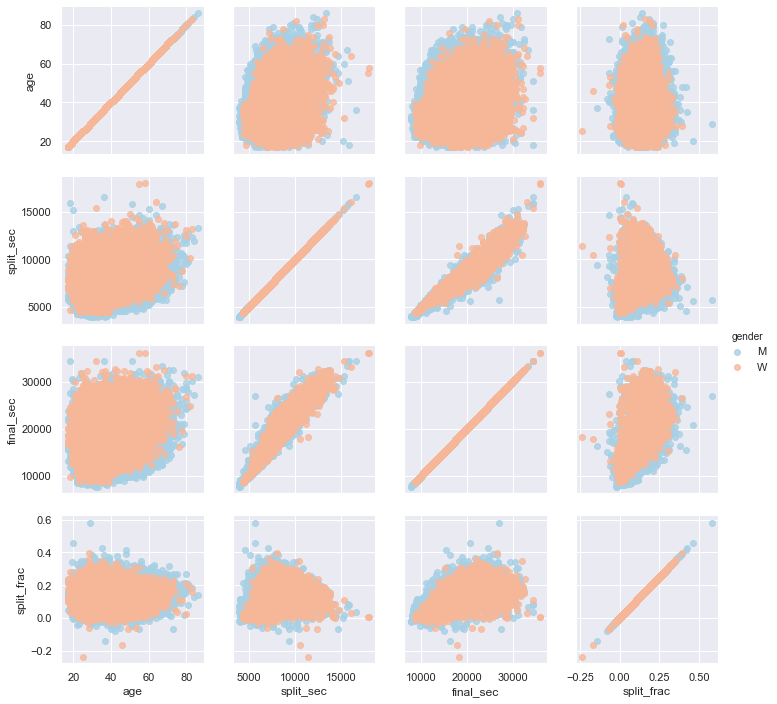

In [10]:
# 8. Chúng ta hãy xem liệu có bất kỳ mối tương quan nào giữa age', 'split_sec', 'final_sec', 'split_frac'
# bằng cách sử dụng PairGrid 
# Bạn có nhận xét gì qua biểu đồ vừa tạo
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

Có vẻ như split_frac không tương quan đặc biệt với tuổi, nhưng split_frac có tương quan mạnh với final_sec.

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="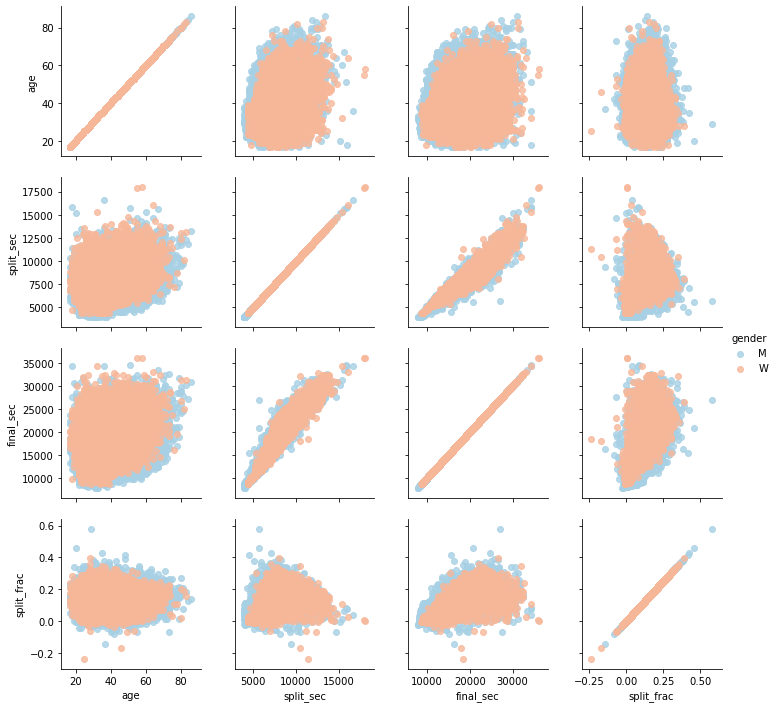
"></details>

Text(0.5, 0, 'split_frac')

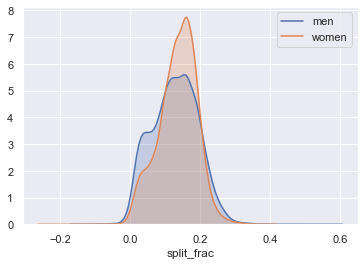

In [11]:
# 9. Có sự khác biệt giữa Nam và Nữ. Hãy thử phân tích biểu đồ histogram của 'split_frac' theo Nam và Nữ
# Bạn có nhận xét gì qua biểu đồ này
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

Điều thú vị ở đây là có nhiều VĐV nam gần mức split_frac <=0 hơn VĐV nữ.

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="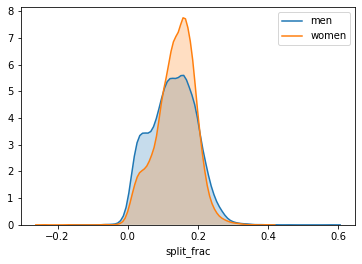
"></details>

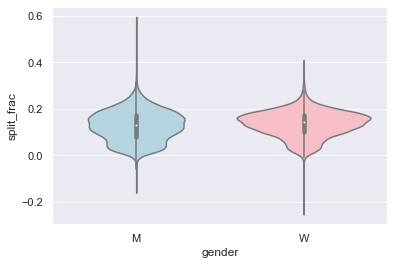

In [12]:
# 10. Có vẻ đây là phân phối bimodal giữa nam và nữ. Chúng ta hãy dùng biểu đồ violin để phân tích.

sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"])

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfsAAAFmCAYAAABqczNPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xl0XPV9///nSKN9X2ZGu2RJ1uJ9kbEBY4MNtolJsYmp
80tJE8gJyfl+U75w8g0p6SFpkxDapIEc2qZfnJSwNKmbsBUwDcYO2NjYBu82tixr32ckjXbJWmbu
7w/Zwq6xESDpjq5ej3N0PMv1zFu2NK/7We7nYzMMw0BEREQsK8jsAkRERGRiKexFREQsTmEvIiJi
cQp7ERERi1PYi4iIWJzCXkRExOJMD/vdu3ezbt061q5dy5YtWy57vqenh29+85vcfvvtfP7zn+fF
F180oUoREZGpy2bmdfZ+v5+1a9fy9NNP43Q62bRpE4899hh5eXmjxzz55JP09PTw7W9/G6/Xy623
3srevXux2+1mlS0iIjKlmNqyP378ONnZ2aSnpxMSEsL69evZuXPnJcfYbDZ6e3sB6O3tJT4+XkEv
IiLyCZga9m63m9TU1NH7LpcLj8dzyTF/8Rd/QXl5OcuXL+f222/ne9/73mSXKSIiMqWZPmb/cfbs
2cOsWbPYs2cPL7/8Mj/84Q9HW/oiIiLy8UwNe5fLRWNj4+h9t9uN0+m85JgXX3yRW265BYCsrCwy
MjKorKz82NceHvaNb7EiIiJTlKmD33PnzqW2tpaGhgYcDgfbtm3jscceu+SYtLQ09u3bx+LFi2lt
baW6uprMzMyPfe329r6JKltERCTgOBwxV3zO1Nn4MHLp3SOPPIJhGGzatIl7772XrVu3YrPZ2Lx5
Mx6Ph4ceemh0LP8b3/gGt91228e+bktL90SXLiIiEjACOuwnisJeRESmk6uFfcBP0BMREZHPRmEv
IiJicQp7ERERi1PYi4iIWJzCXkRExOIU9iIiIhansBcREbE4hb2IiIjFKexFREQsTmEvIiJicQp7
ERERi1PYi4iIWJzCXkRExOIU9iIiIhansBcREbE4hb2IiIjFKexFREQsTmEvIiJicQp7ERERi1PY
i4iIWJzCXkRExOIU9iIiIhansBcREbE4hb2IiIjFKexFREQsTmEvIiJicQp7ERERi1PYi4iIWJzC
XkRExOIU9iIiIhansBcREbE4hb2IiIjFKexFREQsTmEvIiJicQp7ERERi1PYi4iIWJzCXkRExOIU
9iIiIhansBcREbE4hb2IiIjFKexFREQsTmEvIiJicaaH/e7du1m3bh1r165ly5YtH3nMgQMH2LBh
A7fddhtf/vKXJ7lCERGRqc1u5pv7/X5+9KMf8fTTT+N0Otm0aROrV68mLy9v9Jju7m5++MMf8tRT
T+FyufB6vSZWLCIiMvWY2rI/fvw42dnZpKenExISwvr169m5c+clx7z66qusWbMGl8sFQGJiohml
ioiITFmmhr3b7SY1NXX0vsvlwuPxXHJMdXU1nZ2dfPnLX+YLX/gCL7/88mSXKSIiMqWZ2o0/Fj6f
j1OnTvHMM8/Q19fHF7/4RRYuXEh2drbZpYmIiEwJpoa9y+WisbFx9L7b7cbpdF52TEJCAmFhYYSF
hVFSUkJpaenHhn1CQiR2e/CE1C0T6/Tp02RkZBATE2N2KSIilmBq2M+dO5fa2loaGhpwOBxs27aN
xx577JJjVq9ezY9//GN8Ph+Dg4McP36cu++++2Nfu729b6LKlgnk8TTz298+R05OLhs3bja7HBGR
KcPhuHIDydSwDw4O5uGHH+aee+7BMAw2bdpEXl4eW7duxWazsXnzZvLy8li+fDl/9md/RlBQEH/+
539Ofn6+mWXLBOru7gKgurrS5EpERKzDZhiGYXYRE6GlpdvsEuRTqKgo45VXXgDggQceMrkaEZGp
42ote9MX1RG5mDVPPUVEzKWwFxERsTiFvYiIiMUp7EVERCxOYS8iImJxCnsRERGLU9iLiIhYnMJe
AorNZnYFIiLWo7CXAKO0FxEZbwp7ERERi1PYi4iIWJzCXkRExOIU9iIiIhansBcREbE4hb2IiIjF
KexFREQsTmEvIiJicQp7ERERi1PYi4iIWJzCXkRExOIU9iIiIhansBcREbE4hb2IiIjFKexFREQs
TmEvIiJicQp7ERERi1PYS4AxzC5ARMRyFPYiIiIWp7AXERGxOIW9iIiIxSnsJaAYGrIXERl3CnsR
ERGLU9iLiIhYnMJeRETE4hT2ElBsNrMrEBGxHoW9iIiIxSnsRURELE5hLyIiYnEKexEREYtT2IuI
iFicwl5ERMTiFPYSULRcrojI+FPYi4iIWJzpYb97927WrVvH2rVr2bJlyxWPO378OLNnz2b79u2T
WJ2IiMjUZ2rY+/1+fvSjH/Fv//ZvvPbaa2zbto2KioqPPO7nP/85y5cvN6FKEZHp4Y9/fJX9+/eY
XYZMAFPD/vjx42RnZ5Oenk5ISAjr169n586dlx333HPPsXbtWhITE02oUkRkejh9+iT79r1jdhky
AUwNe7fbTWpq6uh9l8uFx+O57JgdO3bwpS99abLLExERsQS72QV8nJ/85Cd85zvfGb1vjHG6dkJC
JHZ78ESVJROkpSVi9LbDEWNiJSLTl373rMfUsHe5XDQ2No7ed7vdOJ3OS445efIkDzzwAIZh0N7e
zu7du7Hb7axevfqqr93e3jchNcvE6urqH73d0tJtYiUi05d+96amq52kmRr2c+fOpba2loaGBhwO
B9u2beOxxx675JiLx/Afeughbrrppo8NehEREfmQqWEfHBzMww8/zD333INhGGzatIm8vDy2bt2K
zWZj8+bNZpYnIiJiCaaP2a9YsYIVK1Zc8tgXv/jFjzz20UcfnYySxERaQU9EZPyZvqiOiIiITCyF
vYiIiMUp7CWg2GxmVyAiYj0KewkwSnsRkfGmsJcAoxl6IiLjTWEvIiJjXp1UpiaFvQQUv99vdgki
05LP5zO7BJlACnsJKIODg2aXIDItqWVvbQp7CSgKexFzKOytTWEvAWVg4JzZJYhMSwp7a1PYS0BR
y17EHIah+TJWprCXgDI8PDR6WxOGRCbP8PCw2SXIBFLYS0C5+APn4uAXkYk1MDAweltXxViPwl4C
ysUBr5aGyOQ5d65/9LbmzliPwl4CysVj9hq/F5k8fX19H3lbrEFhLwHF43GP3r64pSEiE6u/v+8j
b4s1KOwloFzcotAHjsjkUdhbm8JeAoZhGJdc/tPb22tiNSLTS39//0feFmtQ2EvA+J/d9t3dnSZV
IjL9XPz7pyE061HYS8Do7OwAICg4GICOjnYzyxGZVtSNb212swsQueDC5LygYDu2oCA8Ho/JFYlM
HxcPm2kIzXrUspeA0dzcCIAtOJioxGTa29vUnSgySbq7u0iIiMR2/rZYi8JeAoLf76eyshywERQU
RHxKBsD5x0RkIp0718+5c/0kRkYTGx6hITQLUthLQKitraK/v48g+8h4fVJmDgClpR+YWJXI9NDa
2gqAMzoGZ3QsfX29Gre3GIW9mM4wDPbv3wtAcEgoAJFxCcS6UqmpqRrt3heRiXHhd6ylt5uU2DgA
mpr0e2clCnsxXVnZaZqaGkjMyCYo6MMfyay5iwF4++0d2phDZAI1NNQB4O7uIjM+8ZLHxBoU9mKq
7u4udu78I0HBdnIWLrvkuThXGsnZuTQ1NfD++/tMqlDE2nw+H/V1NQTZbATZbGTGJxIcFERtTZXZ
pck4GlPY79+/ny9+8YsAVFZWsnr1ag4fPjyhhYn1DQ0N8uqrLzIwMMCMkmuJON99eLG8JTcQGhnF
vn3vUFVVYUKVItbW0FDH4NAg9qCR+TKhdjtZ8Yl4WtyalW8hYwr7f/iHf+CHP/whALm5uWzZsoVH
HnlkQgsTa/P7/fz3f7+C292EM7cAV17RRx5nDwuj6IZbsAUFsW3by3g8zZNcqYi1nT1bCkDI+cWs
AAqdqeefO2NKTTL+xhT2AwMDFBQUjN7Py8vTXuPyqRmGwZtvvk5FxVniUtLJu+YGbDbbFY+PSXYy
87qbGBoa5MUX/xOvt20SqxWxroGBAUpPf0BMWDj2i+bLFLtSCbLZOHHiCIZhmFihjJcxhX1ubi4/
+9nPKCsro6ysjMcff5ycnJwJLk2syDAM/vSnNzh16gTRiQ6KbrhldHncq0nOyiV3yXL6+/t4/vnf
0d7unYRqRazt6NGDDA4Nsvj8pa4XRIeFMyslDa+3jfJyte6tYExh/8gjj9DX18e3v/1tvvvd79LX
18ePf/zjia5NLGZoaIjXXnuJ48ePEJWQxKxVt2IPDR3z308tmEXOomX09vaw9T+f1Wxhkc/A623j
wIG9RIWGUfI/wh7ghtwCgoOCeOut7Zw7d27yC5RxNaa18ePi4vjBD34wet8wDOrr64mJiZmwwsRa
uro6efXVF/F4mol1plK04hZCwsI/8eukF88j2B5C5ft7eP75/+Dmm9cxa9bcqw4DiMilzp3r59VX
X8Dn83HrnIVEhFx+0p0cFcMNuQW8XV7K69te5vYNdxI8hl44CUxjCvvnnnuOxx9//JI9jtPT09mx
Y8eEFSbWYBgGx48f4Z09bzE0OIgzt4C8a24YU9f9laTMLCY8OobSd3awffs2ysvPsHr1OqKjdfIp
8nEGBs7xX//1PF5vG8uycyl2pV3x2Otz8mnobOdsbRXbt7/GmjW3KfCnqDF14//mN7/hv/7rv/jc
5z7Hm2++ySOPPML8+fMnujaZ4lpbW/jDH37Ln/70Bn4D8petIH/Zys8U9BfEp2aw4NY7iHOlUVlZ
zjPP/Ipjxw5r8R2Rq+js7GDr1udobKxndko6NxfMvurxQUFB3DF3MelxCZSWnuKll/5TXfpT1JjC
PikpiczMTAoLCykrK+OOO+6gqkoLLshH6+zs4I03XuO5535NQ0MdiRk5LLztTlx5RePa3R4eE8vs
1evJW3oDvvMT/5599leUlZVqBrHIRQzD4PTpk/zH757G623lmqxcNsxdNKbfx1C7nbsWX0uBI4W6
uhp+97vfUFtbPfFFy7gaUzd+REQE+/fvp7CwkB07djB37ly6urTYglyqs7ODw4ff4/jxo/j9PiLj
E8mev4SE9KwJG1O32Wyk5BeTkJZF3YnDeCpK2bbtJZzOFJYtu54ZM/IvWYJXZLrxett4663t1NZW
Yw8K5tbiuZRkzvhErxFqt3PngiW8dfY0+6rLeeGF/6C4eA433HATUVHRE1S5jKcxhf3DDz/M888/
z3e/+12ef/55br31Vr71rW9NdG0yBRiGQW1tNUePHhzdjjYsOoaseSU4svOwTVLQhkVGkb/0BtKL
51F7/CCemgpeeeUFYmPjmD9/EXPmzCc8PGJSahExm2EYNDTUcfjwe1RUnAUgP9nJuqK5JERGfarX
DLLZWF0wi1kpabz2wTFOnz5J2ZnTFBXPZtGiJSQnO8fzW5BxZjPG0N/5+OOP88ADD0xGPeOmpaXb
7BIsrb+/j9LSDzh+/MjoIjfRSQ5SC+eQnJX7qcflD778OwBKNnzpM9XX2+Gl6cxJWqrK8fuGsdvt
FBXNZs6c+aSkpGn2vlhSb28vFRVlnDhxBI/HDUBabDzXz5hJoTPlqj/3T+x+E4D7Vtzyse/jNwyO
1Newv6YCb18vAFlZOcyePY8ZM/IJCwsbh+9GPimH48qTlMfUsn/rrbe4//779QE5zfl8PqqrKzl1
6gSVlWfx+/3YgoJw5OSTWjiHmAA6s4+KTyR/6QqyF1yDp+IMTWWnOHnyGCdPHiMhIYnZs+dSXDxH
M/hlyuvq6qS8/Azl5WWja0/YgCJnKsuyc8mITxz3z+4gm43FmTksysjmbIubAzWVVNdWU1tbTXBQ
MFnZOeTnF5KbO5PIyMhxfW/5dMYU9vHx8axbt47Zs2dfcsb26KOPTlhhEhgMw8DjcVNa+gGlpR/Q
d/4sPjIuAWdeIY6cfEIjAveXOSQsnPRZ80krmktHcwOeyjO01dWwZ8/b7N27i+zsGRQXzyEvbyYh
H3GtsUigGRgYoKGhjvr6Gmprq2lp8Yw+lxmfSJErlWJnKnGT8Htps9kocKZQ4Eyhpaeb0+5GSj1N
VFVVUFVVgc1mIzU1nczMbDIzs0lNTcduH1PsyDi76r96TU0N2dnZbNy4cbLqkQDR0dE+GvAXlqa1
h4aRWjAbZ14hUQlJU6qnxxYUREJaJglpmQwPDNBSU4Gnsozq6kqqqyux20PIz59JYeFssrNn6Fpi
CRhDQ4M0NjZQV1dDXV0NbnfT6NUmwUFB5CY5KHKmUuhMIfpTLFQ1XhzRMTiiC1mRV4i3r5czniZK
3U00NNbT2FjPgQN7CQ62k5Y2Ev4ZGdmkpKTqd22SXDXs77//fl566SXefPNNfvnLX05IAbt37+Yn
P/kJhmHwhS98gXvvvfeS51999VV+9atfARAVFcXf/u3fUlhYOCG1THdebxuVlWc5e/YMzc2NAAQF
B5OUlYsjJ5+EtMxxuUbebPawMFILZpFaMIu+zg5aqstprS6ntPQUpaWnCA+PYObMIvLyZpKZma2W
iEwawzDwettobm6kqamR5qYGWttaRsM9yGYjPTae7MRkZiQmkxGfQEhw4P18JkZGcW1OPtfm5HNu
aIia9jZqvK1Ut7eOnrQABAcF43S5SElJJzU1jZSUNGJj46ZUQ2KquOoEvS984QuEhoZy5swZ5syZ
c9nzzz777Gd6c7/fz9q1a3n66adxOp1s2rSJxx57jLy8vNFjjh49Sl5eHjExMezevZt//ud/5ve/
//3HvrYm6H08v99PU1MDFRVnqaw8++HmMjYb8SnpOHLySczMwT6J3dvjNUHvkzIMg562lpHgr6lg
6NzIapEhISFkZ+eSm5tPbm4+EQE8ZCFTi2EYdHd30dLiwe1uoqmpAXdzEwODA6PH2IOCSI2NJyM+
gZxEB1nxiYRO0MnnJ5mg91n0DQ6cD/826ju9uLu78F8UQ5ERkaSkjoS/y5WCw+Ei8lNeQTDdfOoJ
es888wynT5/mb/7mbybkUrvjx4+TnZ1Neno6AOvXr2fnzp2XhP2CBQsuue12u8e9jumkv7+Pmpoq
qqsrqaqu4Nz5JZCDgu0kZuaQmJ5NQnoWodPsMjWbzUZMspOYZCczFi2jq9WNt74Gb33N+clPZ0bH
H2fMyCMnJw+Hw6kWiIyJ3+/H622jpcVNS4sbj8dDS0vzZavRJUZGUZDkID0ugYz4BJzRsQRbbJ2I
yNAwil1po8v0DvmGaerqpKGznYbOduo72qmsHGmAXBAVFY3T6cLhcI3+GRcXr9+/T+CqYR8dHc2S
JUvYunUriYmJH3nMN77xDZ588slP9eZut5vU1NTR+y6XixMnTlzx+D/84Q+sWLHiU73XdGUYBm73
yISZ6urKS8b7QiMiceUXk5iRTXxKGkEB2B1oBltQEHHOVOKcqcxYtIy+rg689TW019fQeH78ce/e
XURGRpGTk0tOTh7Z2Tm6jl8wDIPe3h7a2lpoa2ulra2V1lYPLS0t+HzDlxybEBFJjjOVlNg4UmLi
SI+LJzJ0+l2yFhJsJyshiayEpNHHus7109DZTnN3F+6uTpq7O0cn/V0QGhqKw+EiOdlBUlIySUkO
EhOTNfv/Csb06X6loAcmraW9f/9+XnzxRX73u9+N6fiEhEjs9qk/vvxp+Hw+ysvLOXHiBKWlpfT1
9QEXWq8uEtIyiU/LnHKT7MwSGRtP5Kx4MmbNZ2jgHB1N9bQ31tHRWMepUyc4deoENpuNrKws5syZ
w9y5c4mNjTW7bJlAhmHQ1dWFx+PB7R5pqV/4+p+t9SCbDUd0DCkxI6GeEhuHMzqW8JAQk6oPfLHh
EcSGR1yySU/v4ADu7k6auzpHTgK6O2lsqLtsq+uoqCicTiculwun0zl6Oypqeg8FfOam3GcJC5fL
RWNj4+h9t9uN03n5tdqlpaV8//vf59e//jVxcXFjeu329r5PXddU5Pf7qauroazsNOXlZ0Y/cEIj
InHmFY4EfEo69mnYchhPIWHhOHLyceTkj4zze1vpaKyjvbGOmtpaampq2LZtG+npmRQWFpOfXzTt
P2SmMr/fT2dnB15vG15v6/k/22j3tl0ytg4jn4WJkVHkOFPPz0wf+UqKjLZcV7wZokLDyE1ykpv0
YUYM+YZp7e2hpaf7w6/ebqqqqi7bvyUiIpLExKSLvpJJTEwiJibWMo2ez7yozkSZO3cutbW1NDQ0
4HA42LZtG4899tglxzQ2NnLffffx05/+lKysLJMqDVx9fb0cOXKQEyeP0n++BR8aETmykl12LjHJ
Lsv8IAcam81GTJKDmCQHmXMXMdjfR1ttFa01FTScb3G89dabZGfPoKRkGRkZE7dHgHw2Pp8Pr7eN
traW0UD3elvpaG/H5/ddcmyQzUZCZBQz4hM/DPWoGJKiFOqTLSTYTmpsPKmx8Zc8Pjg8TFtfD57z
JwCt508CGj6iJ8BuD/kfJwFJJCU5iI9PsNS+GqaGfXBwMA8//DD33HMPhmGwadMm8vLy2Lp1Kzab
jc2bN/PLX/6Szs5O/u7v/g7DMLDb7Tz//PNmlh0QOjs7OHToACdPHsfnG8YeFkbKzFkkZ+cS60iZ
tDXp5UMjJ1mzSS2czUBfL221lbTWVIxey+9ypXLNNdeRlzdToW+i3t5eWlvdtLS00NLiprXVg9fb
dtn2yKHBdlzRIyGeHBVDcnQ0yVHRJEREKdQDXKj9o08Chnw+vH09tPb20NrTTWtfD609PbS1evB4
mi851m63k5TkwOFwkpzsPP+nY8rOzRnT2vhXs2HDBl5++eXxqmfcWPXSu76+Xvbu3c0HHxzDMAzC
oqJJL56PM6+QYAtcD37w5d9hGAZLNv6F2aWMm+5WD/WnjuKtqwYgKSmZFStWk5OTa25h08C5c/00
NNTT0FA3EuwtHvr6Lx3iCwkOxhkde/7rQqjHEBMWPq1Oyp7Y/SaGYfB/Vq4xu5RJ5zcMOvv7Rk4C
ervxdHfh7umipaf7kssCAWJiYklOduJ0ukhPzyQtLT1gVt+8Wjf+mMJ+7969XH/99Zc8tn37dtas
WcPTTz/NV7/61c9c5HizWtj7fD6OHTvEvn17GBwcICI2now5C0nOzrNMV1Nvh5djr7+AYRiEx8RR
tOIWouKvPDl0qunrbKfh1DE8VWfBMMjNzWfFitUkJFjnezRbX18v9fV1NDTUUl9fS2tryyXPx4VH
4oqJxRUzEu6umFgSIqMImkah/lE83V38av8u/IZBYmQUd85fgjNGk0x9fj+tvT14erpwd3fh6e7E
3dNFz8CH8zWCgoJwuVJIT88iIyOTtLRM0zYC+tRh//rrrzM4OMgTTzzBfffdN/r40NAQW7Zs4c03
3xzfSseRlcK+vr6WnTv/iNfbhj00jKx5i0mZOctyXfWHXvlPznV3jt6PiI1j0ec3m1jRxOhtb6Py
4Lt0eZoICgqipGQZS5deh92u2dmflGEYtLa2nJ+YWobX2zr6nD0oiIy4RLISk8hOSCIlJk4z4K/g
X/bsHN29DiApMpr/tXyViRUFtt7BARo7O6hpb6O2vY3Gro7RS5ptNhsuZwr5M4soKCgiLi7+Y15t
/HzqCXo9PT0cOXKE3t5eDhw4MPp4cHDwlNvydirq7+/jnXfe4oMPjgOQMrOYrHlLCAk3b/3riTLY
33dJ0AP0d3Uy2N8X0BvtfBpRCUnMufk22uqqqD60j/fee5czZ06xevU6srNnmF3elHAh4MvKTn+4
d0NQMLlJDrLPX7OdFhePPWh6Xn77SfQMnLsk6AHa+nroGThn6lr7gSwqNIyZDhczHS5gZEJgfaeX
Gm8bNe1tNHiaaXY3sWfPW7hcqRQUFFFQUExs7NiuJpsIY+rG37dvH9dee+1k1DNupnrLvrGxnlde
eYH+/j6iEpLIu+aGgNpCdryd6+nm0H/9x2WPL779/yPcwtvQ+oaGqD1xiKbSExiGwYIFi1m58mbL
DM2Mt66uTnbt2kl5+RlgJOBnOpzMcqWTn+ycsKVkrayjv49/emfHZY//1Q03E2+xE+3J0jc4yBlP
E6fcjVR5WzEMA5vNxrx5C7nuuhUTNsnvU7fsH374YX70ox/xy1/+kn/913+97PnPuja+fLTKynK2
bXsJn89HzsKlpBXNtVyXvYwIDglhxqJlOHLyObvvbY4ePURvby/r1n1eG/BcxDAMDh16j337djM8
PExGfALXZOUyM9mlgJeAExkaysKMbBZmZNM3OECpp5n91RUcO3aYsrJSbrrpFgoLZ01qTVf9Ldm8
eWS89K/+6q8mpRgBj8fNK688jy0omKKVa0lM19oC00F0YjJzb/kzTu96g7NnSwkNDWXNmvVmlxUw
2tu9vPPOnwiz2/nc7AXMS8ucVjPlZeqKDA1jUUY289My2V9TwVvlpfz3f7/CzJlFk9qDd9V36u/v
5/3338dms33kl4y/xsZ6DMNgRsl1Cvppxh4ayuxVt2IPC6e+vtbscgJKfHwCMTGx+A0DR7R1VjyT
6SPIZiMpKhrDMMjMzJ70obqrtuyfeOKJKz5ns9nUjT8Bent7ACw9Ti1XFhRsJzQikt6eqT3nZLyN
XLWwlLfeepN/O7CbQmcKN+YV6fIwmRJqvK28VV5KXcfIZNKSkqWTXsNVw/6555675H5HRwfBwcHE
xCiIJkpSUjIA7Y11xKekm1yNTLZzPd30dbbjcqaYXUrAWbCghMTEZN7du4szzY2c8TSzID2LVTOL
idKeD59ZSEgIsbGxdHV1MTQ0ZHY5luDt62F76QecbR3ZMC43N5/rrluB4/ws/sk0ppktpaWlPPjg
g7jdbgzDIDc3V2vVT5CZM4vYtWsnnopSsucvIShYlw5NJ+6KUjg/K18ul5WVQ2ZmNlVVFezZ8zZH
G2opdTdxY34RizNzpv3iOJ9WSEgIn//85ykpKeHgwYO8+uqrZpc0pQ35fOypOsu+6nJ8fj8ZGVks
X34jqanmNeDGNGjwve99jwceeIADBw7w3nvv8bWvfY2//uu/nujapqXg4GBmzixkeHCQnraWj/8L
YikdTfXMbjprAAAgAElEQVQEBQUxc2ah2aUELJvNRm5uPnfddQ833ngz/iAbfyw9wSsnj1y2tKmM
TWxsLCUlJQCUlJRoi+bPYHB4mN8d2seeyjIiIqNYv34DmzZ9ydSghzGGvWEY3HTTTaP3b7nlltE9
0mX8ZWbmANDpaTK3EBOEhISQlJREyDRc6cw3PESPt5WUlLSAWWs7kAUFBbFw4RK++tVvkpqSxomm
el49eYRhn+/j/7Jcoquri4MHDwJw8OBBurq6TK5oauofGmTrkQPUdniZObOIr3zlXgoKigNiQumY
uvFLSkr4l3/5FzZv3kxwcDCvv/46eXl5o3vRp6WlTWiR082F/c9902zcbLp3JfqGh8EwiIqKNruU
KSUqKoqNd2zmxRe2crypnqauTm6fu4hUE1crm2qGhoZ49dVX2bVrl8bsP6XyFjevnTpG98A5Zs4s
4nOfuz2gFscaU9jv3LkTm83GCy+8MHqGYhgGd911FzabjZ07d05okdPX9OqS/J9dibt27TK5Ipkq
wsLC2XTnl3jnnbc4duwwTx3YzYL0LBZlZJMSExcQLatANzQ0RFtbm9llTCmGYVDtbeVQfQ2n3Y0E
BQVx/fUrKSlZFlBBD2MM+8cff5xDhw5x11138c1vfpMPPviAv/u7v2PdunUTXd+0dGHYcbp9QF3o
SrzQsp9uXYkX/rc/467T01ZISCirVq0lL28mO3b8kcP1NRyur8EVE8vC9GzmpKYToeERGQdd5/o5
1ljH0YZaOs5vmex0ulizZr0pM+3HYkxh/8gjj/Cd73yH7du3Ex4ezssvv8y3vvUthf0EuZDx060b
f7p3JfqGp9f3O1Gys3O5++5vUlNTycmTx6msPMsfS0+w/cxJshOSKHCmUOBI0brvMmaGYdDS001Z
SzNlLW4aOtsBsNtDmD17HnPmzCc1NT2gG2hjCnu/38+SJUv49re/zZo1a0hNTcWnSTATxul0ER4e
QUtNBdkLlxI8jdb+ns5die7zm7vk5OSaXMnUFxQUxIwZ+cyYkU9vby+nT5+krOw0Ve4mqrytvFF6
Emd0LAXOFIqcKerql8v4/X5qO7yUeZo509I82oK32WxkZGRRVDSbgoJi0/au/6TGlCIRERE89dRT
HDhwgO9///s888wzo5PIZPzZ7SHMm7eQ9957l7Pv/omZ162aVoE/HbXVVdNYeoLw8HCKimabXY6l
REVFUVKylJKSpfT0dFNZWU5l5Vlqa6vZU1nGnsoy4sIjKHKlUuRMJSM+UdfrT1PDfh/Vba2c9jRR
5mmmb2gQgNDQUAoKisnLm0lOTu6E7Vo3kcaUIP/4j//IH/7wB5544gni4uLweDz8/Oc/n+japrWS
kmU0NNTRUFfNwI5XKVqxhrBInWBZjWEYNJ4+TvWRA9jtIaxb9/lpednhZImOjmHevIXMm7eQwcFB
amqqKC8/Q2XlWQ7UVHKgppKo0DCKnCnMTskgKyFRLX6L8/n9VLR5+KCpgbOtbgaGhwGIjIxiXvFs
8vMLyMjIJniKL3A2pv3sp6Kpvp89gM/nY8eO/+bUqRME2e2kF88jrXgedgtOMpqO+9l3NNVTffQ9
er2tREVFc/vtd+JyaZlcM/h8Purqqjl7toyKijL6z3fZxoSHM8eVzuzUdMt29U/H/ez9hkFtexsn
mxoo9TTSf35+UGxsHPn5heTnF5KamhZwM+o/zqfez17MFRwczJo160lLy+Ddd3dTd+IwzWWnyJiz
CFd+kbr2p6juNg+1R9+no7kBgKKiWdxwwyqiLXpSMxUEBweTk5NHTk4eq1evpa6uhjNnTlF+9gz7
airYV1NBQkQk+Q4X+ckushOSCJniLb0L7FcItCs9PlWdGxqisq2F8lY3Fa0eegYHAIiKimbhnAUU
Fc3C5Uq15AkdqGU/ZQwODnLkyPu8f3A/Q4OD2MPCSckvJrVwNqEWOPu2esve8Pvx1tfQWHqCrpZm
ALKzZ7B8+Y04telNwBoeHqa6upIzZ05RXVXB4PkxXHtQMDmJSeQnu8hNcpAYGTWlQ+Jf9uzE29c7
ej8pMpr/tXyViRV9dn7DwNPdRUWbh/JWD3Ud3tHLWiMiIsnLm0lR0WzS0zOnXAv+Sq7WslfYTzF9
fX0cOfI+x48f5ty5c9iCgkjOziOtaC7Riclml/epWTXsh4cG8VScofHMSQbOb1ubk5PL4sVLycrK
Mbc4+UR8Ph+NjfVUVVVQXV1BW1vr6HNRoWFkJSSSlZBEVnwSzpjYKTXJz9Pdxa/278JvGCRFRrNp
fsmU2z7Y5/fT2NVBbXsbte1t1HV4R8ffAVJS0sjJyWXGjDzLtuAV9hY0NDTE6dMnOXz4fdrbRy5V
i3WkkFo0h6SMHGxT7EzVamHf391J05kP8FSewTc0RHCwnVmz5rBw4ZLRbYxlauvq6qS6upK6uhoa
Guro7e0ZfS7MbiczfiT8ZyQmkxIbH/Dh/8TuNzEMg/+zco3ZpYzJsN9HfUc71d5WatvbaOhsZ9jv
H30+Li6ejIwsMjOzyc7OJTJy6veAfhyN2VtQSMjI5Xlz5y6gurqSI0fep6amiq6WZsIio0ktnE3K
zFkEa2b3pOp0N9Fw+hjtDbXAyHjggmuuY+7cBURYYLhFPhQbGzc6s98wDDo7O0auoDn/Vd460n0M
I+GfnZDMjMRkchKTcUTHBGTLMhBrusDv99PU1UmVt5Vqbwt1Hd5Lwj052UFGRhZpaZmkp2cSHa09
Ji6msJ/ibDYbM2bkMWNGHm1trRw9epBTp05SfeQA9aeOkTFrPikFszWZb4J1eZqpPX6QTvfI5lAp
KWksWrSE/PzCKX/Jjnw8m81GfHwC8fEJzJ49D4Cenh4aGmqpra2hrq76/OprI/M1okLDmOlwMTc1
g+yEpIAOWTP5/H7KW92caGqgss1zSbd8crKDzMwcMjOzSU/PmJLXvk8mdeNb0Llz/Rw9eohDhw4w
ODhISHgEmXMWklIwO2A/VAb7+3j/xX+/7PEld9wV0BMQezu8VB/eT0dTPTAyHr9s2XLT966WwNPV
1UldXQ11dTXU1laPdvvHhkcwJyWduakZpo6TP7H7TQDuW3GLaTXAyNoT9Z3tnGis55S7YfSyuLi4
eLKyZpCZmU1mZhaRWnfkMhqzn6bOnevn8OH3OHz4IENDg8SnZlJw3Y2EBOgZ8KFX/pNz3Z2j9yNi
41j0+c0mVnRlhmHgrjhD1cG9+H0+MjOzufbaFaSnZ5hdmkwBhmFQX19LaekHlJWdZnBwZJb/zGQX
q2YWmxL6gRD2Nd5WdpSdorGrAxhZ2KaoaBbFxXNwOFwB21gJFAr7aa6vr5c33niN6upKQiMiKVqx
hphkp9llXaa3w8ux11/AMAwiYuMovOEWouITzS7rMn6fj/L9u2ipLicsLIw1a24jP7/A7LJkihoe
HqKyspyjRw/R0FCHDZiXlslN+cXEhIdPWh1mhn1LTzc7y05xttUNQH5+IfPmLSAzM8cyl8VNBk3Q
m+YiI6PYsOHPOXhwP3v37uLMO2+y8LY/D7jJe1HxiYRGRmEYRsC26AEaTh2jpbqclJQ01q/fQGxs
nNklyRRmt4dQUFDMzJlFVFVVsGfP2xxrrKPU08yawtnMT8u0bIvW5/fzbnU5uyvO4DcMMtIzuWHF
KlJS0swuzXIU9tOEzWZjyZJrGRoa5MCBd6k9fpAZi681u6yPFMgfbP1dHdSdPExUVDR33LGZsLDJ
a3mJtdlsNnJz88nJyeXEiaPseectXv3gKB80N7BhziKipsjuamPV2tvDi8cP4u7uIioqmlWr1pKX
NzOgf/+nMvWPTDPXXHM9UVHReKrKzC5lSmqtrcLw+7n++pUKepkQQUFBzJ+/iL/8ytfJycmlsq2F
fzuwG/dF81mmuopWD08deAd3dxezZ8/jL//y6+TnFyjoJ5DCfpqx2+0kJiYxPDCA3+czu5wpZ7B/
ZElRLXErEy0mJpYNG/6ca6+9gc5z/fzmvT00dnaYXdZndtrdyH8c3s+w4Wfdus+zZs16widxbsJ0
pbCfhi60SH3n1/mWsfOdnzUdZrEuVQlMNpuNZcuW87nP3c6Qz8cLxw9y7vylaFORt6+XV04exR4S
wp13/gXFxXPMLmnaUNhPQ77zLXqbFnv5xC78m/n96hWRyVNYOItrrrmOjv4+3i4vNbucT+31U8cY
9A2zevU6rUUxyRT205D9/Gp6atl/chf+zYKDNbdVJteyZcuJjYnlSEMNvQMDZpfziTV2dlDlbSUz
M0ctehMo7Kchh2PkGvvu8+t2y9gYfj89ba2Eh0do73mZdMHBwSxavJRhv5/366rMLucTe7e6HIAl
S5aZXMn0pLCfhi5srVr5/l76u7vMLWaKMAyDivf3MNDbTXb2DM0aFlPMmTOP8PBwDtZVT6nWvbu7
i1J3I06HS1s7m0RhPw2lpqZz0023MHSunw92vkZbXRUWXUhxXJzr6aZ8/y7c5aU4nS5Wr15ndkky
TYWEhLJkybX0Dw3y28P7psRkvfa+Xn53eB8GsOzaG3SibBINPE5TCxaUMDAwwLvv7qZ095tExMaR
Xjwfx4yZBGniHgC97W3UnzpGW00FhmGQmJjMxo2bNRNfTLV48VI6Ojo4ceIITx14h3XFc8lNcphd
1mUMw+BEUz07yk7ROzjAypWrycubaXZZ05bCfhpbuvR68vMLOXToAKdPn6T8wG5qjx8kKSuXhPQs
4pwpBE2ziWj9XZ20N9bira8Z3a42OdlBSckyCgqKtV2tmM5ms7Fq1RpCQuwcOXKQ3x7aR5EzlZsL
ZpEQIDvBNXV18EbpSeo6vNjtdlauvJlFi5aYXda0Nr0+yeUySUnJrFmznmuvvYEjR97nxImjNJ05
SdOZkwQF24lPTSchLZOEtCzCoqLNLnfc+X0+Oj1NtDfU0t5Yy7mL5jCkp2eyZMkycnLy1PUoASUo
KIiVK2+muHgOf/rTdkqbGjjjaaI4JY3rcvJJjY2f9JoMw6DK28K7VeVUeVsByM8vYOXKm7V/RAAw
Pex3797NT37yEwzD4Atf+AL33nvvZcf8+Mc/Zvfu3URERPD3f//3FBcXm1CptcXExLJixWquv/5G
GhrqqKqqoKqqAm99Dd76GgAi4xKIc6UR60wl1pkS0PvMX4nf76enrYUuTxNdniY6PU34h4eBkfHQ
/PwCZswYWZ9cM+4l0DmdKWze/GXKyk7z/nv7ONXcyKnmRmYkJnNNVi75DhdBE3yiOuzz8YG7kfdq
Kmk+v6RvZmY211xznSbjBRBTw97v9/OjH/2Ip59+GqfTyaZNm1i9ejV5eXmjx+zatYva2lq2b9/O
sWPH+MEPfsDvf/97E6u2tuDgYLKycsjKymHlytV0dLRTVVVBdXUFdXW1NHV+QFPZBwBExMYT60wh
zplGrCuVsADpQryY3zdMd2vLaLB3t7jx+4ZHn09ISGTGjDxmzMgnPT1T3fQy5dhsNgoLZ1FQUExt
bRXvv3+AqrpqqrytxEdEUpKZw4L0LCJCQsf1fTvP9XOorpoj9TX0DQ1is9koKChm8eKlpKSkjut7
yWdnatgfP36c7Oxs0tNHVlJav349O3fuvCTsd+7cyYYNGwCYP38+3d3dtLa2kpycbErN0018fAIL
F5awcGEJw8PDuN3NNDTUUl9fS2NjA+7yUtznV/QKj44lLiWd+NR04lxphJiwUYzh99PT3kpHUwOd
zQ10tbgxLlrtLikpmYyMLNLTs0hPzyQ62npDEzI92Ww2srNzyc7OpaXFzdGjhyktPcmOslO8XV7K
vLRMrsnKxfEZe6zqO7zsr6mg1N2EAYSHh1Myfxnz5i0kLm7yhw9kbEwNe7fbTWrqh2eALpeLEydO
XHKMx+MhJSXlkmPcbrfC3gR2u5309AzS0zO45prr8Pv9eDzN1NfXjZ4AuMtP4y4/DUB0koP4lHTi
UjKIdbgmbJZ/f3cXnc31IwHvbmR48MPrjx0OJxkZ2WRkZJKenknEFBx6EPmkHA4Xt9xyKzfccCMf
fHCCo0cPcri+hsP1NeQnO1mWnUdOYvKY56L4DYNSdxP7aypo6Gw//x5OFi5cQmFhMXZ7yER+OzIO
TB+zl6krKCiIlJQ0UlLSKClZit/vp7m5kdraamprq2lqaqCnrYX6D44SFGwnKTMHZ14hca60zzzh
baCvl5bKMjxVZfR3fbj1Z0xMLNkFRaNDEQp3mc7CwyNYvPgaFi4soaLiLIcPv0d5Yz3lrR7ykhys
KZpDctTVW/p17W38sfTk6Hh8bm4+ixZdQ0ZGliauTiGmhr3L5aKxsXH0vtvtxul0XnKM0+mkubl5
9H5zczMul+tjXzshIRK7XeOvk83limP+/JEJlAMDA1RVVVFeXk5paSkt1eW0VJcTFhWNM7cAZ24B
4dGxY35tv8+Ht74ad0UZHc31YBjY7XZmzZpFfn4++fn5JCUl6QNI5CO4XCVcd10JdXV1vPnmm5SX
l/Pku29zTVYuq2ZePum5f2iQP54+wcnmBgAWLFjAqlWr1Ks6RZka9nPnzqW2tpaGhgYcDgfbtm3j
scceu+SY1atX89vf/pbPfe5zHD16lNjY2DH9sLW3901U2fIJJCWlk5SUzjXXrKChoZ5Tp45TVnaa
uhOHqTtxGMeMmcxYfO1Vx/cNw6C1poKqQ/sYOtcPQEpKGrNnz6OgoHh0L2zDgNbWnkn5vkSmqvDw
eG67bROVlWfZtWsn+2sqaO3tptCZSvD5E+XegQH+/dA+PD1duFwp3HjjLaSlZWAY0NLSbfJ3IFfi
cFy5l8bUsA8ODubhhx/mnnvuwTAMNm3aRF5eHlu3bsVms7F582ZWrlzJrl27uOWWW4iIiODRRx81
s2T5lGw2GxkZmWRkZHLjjbdw9mwpR468T0vVWTqa6slbspykrBmX/b3B/j4q3nsHb30NdrudxYuX
Mnv2PJKS1LoQ+bRsNht5eQVkZc3gtddepLy6ktwkgy8tWsbA8DDPHtxLa28P8+YtZNWqteotswCb
YdFF0XX2Gfj8fj+HDh1g37538Pl8ZMxZREtVGQAlG75Ef1cHx7e/wvDAOdLTM1mzZj3x8QkmVy1i
LcPDw7zyyvPU1FSxce5iWnu7eaeyTEE/BV2tZa+wF9N5vW28/PLv6ezswB4WTrDdzoLPbeL4Gy/R
39XJDTesYvHia/ShIzJBOjraeeaZLUSFhHJueIiQsHDuvvubhIaO77X5MrGuFvba9U5Ml5iYxO23
30lISCjDA+dGlt089C79XZ0sWnQNJSVLFfQiEyg+PoHc3Hy6B84x5PMxZ858Bb3FKOwlICQlJbNi
xSoAhgcHaakuJzExiRtuuMnkykSmh4yM7ItuZ5lYiUwEhb0EjOLi2QD4h4cw/H7mzVtEUJB+REUm
Q2Ji0uhtTYC1Hn2SSsAICQnFbv/wApGcnFwTqxGZXmJjP1zzIsqCO1xOdwp7CSgXt+S1zrbI5AkP
jxi9rTky1qOwl4By8YeMuvBFJk9oaJjZJcgE0qepBBS1KETMoZNra9P/rgQYhb2IyHhT2EtAUcNe
xBx+v9/sEmQCKexFRASfz2d2CTKBFPYSUNLSMswuQWRaUsve2hT2ElBmzZpndgki05Qlt0mR8xT2
ElA0Zi9iDptNcWBl+t+VgGLNPRhFAl9wcLDZJcgEUtiLiIjC3uIU9iIiogWtLE5hLwFFnzciIuNP
YS8BRWP2IiLjT2EvIiJicQp7ERERi1PYi4iIWJzCXgKKJuiJiIw/hb2IiIjFKewlwKhpLyIy3hT2
IiIiFqewFxERsTiFvQQYraojIjLeFPYSULSCnojI+FPYi4iIWJzCXkRExOIU9iIiIhansBcREbE4
hb2IiIjFKewloGhtfBGR8aewFxERsTiFvQQUm5r2IiLjzm52ASIXy8qaQWZmNgsWLDa7FBERy1DY
S0Cx2+1s2vQls8sQEbEUdeOLiIhYnMJeRETE4hT2IiIiFmfamH1nZycPPPAADQ0NZGRk8Itf/IKY
mJhLjmlububBBx+kra2NoKAg7rzzTv7yL//SpIpFRESmJtNa9lu2bOHaa6/ljTfeYOnSpTz55JOX
HRMcHMxDDz3Etm3b2Lp1K7/97W+pqKgwoVoREZGpy7Sw37lzJxs3bgRg48aN7Nix47JjHA4HxcXF
AERFRZGXl4fH45nUOkVERKY608Le6/WSnJwMjIS61+u96vH19fWUlpYyb968yShPRETEMiZ0zP7u
u++mtbX1ssfvv//+yx672sppvb293HfffXzve98jKipqXGsUERGxugkN+9/85jdXfC4pKYnW1laS
k5NpaWkhMTHxI48bHh7mvvvu4/bbb+fmm28e83snJERitwd/4ppFRKY7hyPm4w+SKcW02firVq3i
xRdf5N577+Wll15i9erVH3nc9773PfLz8/nKV77yiV6/vb1vPMoUEZl2Wlq6zS5BPoWrnaSZNmb/
9a9/nXfffZe1a9eyf/9+7r33XgA8Hg/f+MY3ADh06BCvvvoq+/fvZ8OGDWzcuJHdu3ebVbKIiMiU
ZDMMwzC7iImgM1MRkU/m8ccfBeCBBx4yuRL5NAKyZS8iIiKTQ2EvIiJicQp7ERERi1PYi4iIWJzC
XkRExOIU9iIiIhansBcREbE4hb2IiIjFKexFREQsTmEvIiJicaZthCMiIoHluutWEB2tHe+sSGvj
i4iIWIDWxhcREZnGFPYiIiIWp7AXERGxOIW9iIiIxSnsRURELE5hLyIiYnEKexEREYtT2IuIiFic
wl5ERMTiFPYiIiIWp7AXERGxOIW9iIiIxSnsRURELE5hLyIiYnEKexEREYtT2IuIiFicwl5ERMTi
FPYiIiIWp7AXERGxOIW9iIiIxSnsRURELE5hLyIiYnEKexEREYtT2IuIiFicwl5ERMTiFPYiIiIW
p7AXERGxOIW9iIiIxSnsRURELE5hLyIiYnGmhX1nZyf33HMPa9eu5Wtf+xrd3d1XPNbv97Nx40a+
+c1vTmKFIiIi1mBa2G/ZsoVrr72WN954g6VLl/Lkk09e8dhnn32WvLy8SaxORETEOkwL+507d7Jx
40YANm7cyI4dOz7yuObmZnbt2sWdd945meWJiIhYhmlh7/V6SU5OBsDhcOD1ej/yuJ/85Cc8+OCD
2Gy2ySxPRETEMuwT+eJ33303ra2tlz1+//33X/bYR4X522+/TXJyMsXFxRw4cGBCahQREbG6CQ37
3/zmN1d8LikpidbWVpKTk2lpaSExMfGyYw4fPsyf/vQndu3axcDAAL29vTz44IP89Kc//dj3djhi
PlPtIiIiVmEzDMMw441/9rOfERcXx7333suWLVvo6uri//7f/3vF49977z2eeuop/t//+3+TWKWI
iMjUZ9qY/de//nXeffdd1q5dy/79+7n33nsB8Hg8fOMb3zCrLBEREcsxrWUvIiIik0Mr6ImIiFic
wl5ERMTiFPYiIiIWp7CXgFBUVMSDDz44et/n87Fs2TLthyAygR599FGeffbZ0ftf+9rXePjhh0fv
/8M//ANPP/20CZXJeFPYS0CIiIjg7NmzDA4OArB3715SU1NNrkrE2hYtWsSRI0cAMAyD9vZ2zp49
O/r8kSNHWLRokVnlyThS2EvAWLFiBW+//TYA27ZtY/369eYWJGJxCxcuHA37s2fPUlBQQFRUFN3d
3QwODlJZWcmsWbNMrlLGg8JeAoLNZmP9+vW89tprDA4OcubMGebPn292WSKW5nQ6sdvtNDc3c+TI
ERYuXMj8+fM5cuQIJ0+epKCgALt9QhdalUmi/0UJGAUFBTQ0NPDaa6+xcuVKtASEyMRbuHAhhw8f
5siRI9x99900Nzdz+PBhYmJi1IVvIWrZS0BZtWoVP/3pT7ntttvMLkVkWrgQ9mVlZRQUFLBgwQKO
Hj3K0aNHWbhwodnlyThR2EtAuNCK37RpE9/61reYOXOmyRWJTA+LFi3i7bffJj4+HpvNRlxcHF1d
XaPd+mINCnsJCBe2OHa5XNx1110mVyMyfRQUFNDR0cGCBQtGHyssLCQ2Npb4+HgTK5PxpLXxRURE
LE4texEREYtT2IuIiFicwl5ERMTiFPYiIiIWp7AXERGxOIW9iIiIxSnsRWRCvffee3z5y182uwyR
aU1hLyIT7sKiSSJiDm2EIyKX+PnPf8727dtJSEjA4XCwatUqbDYbzz77LIZhMHv2bL7//e8TGhrK
8uXLWbduHYcOHcJut/OLX/yC9PR09uzZw9///d8TFhbGjBkzRl+7traWv/3bv6Wjo4OIiAgefvhh
ioqKeOihh2hvb6euro7vfOc73Hjjjeb9A4hYkFr2IjLqrbfe4siRI7z++uts2bKF06dP09/fzx/+
8Ae2bt3KSy+9RGJiIk899RQAra2tXHfddbz00kuUlJTw7//+7wwODvLXf/3X/NM//RMvvPAC4eHh
o6//3e9+lwcffJAXX3yRH/7wh9x///2jzyUkJLBt2zYFvcgEUMteREbt3buXW2+9leDgYGJjY7n5
5psxDIOamho2b96MYRgMDw8ze/bs0b+zfPlyAGbOnMnBgwcpKyvD5XKNtug3bNjAE088QV9fHydO
nOChhx4a3fjo3LlzdHZ2AjB//vxJ/m5Fpg+FvYiMCg4Oxu/3j943DAOfz8ett97K3/zN3wDQ39+P
z+cDRsbiQ0NDR28bhoHNZrvkNez2kY8Zv99PeHg4L7300uhzbrebuLg4gEt6AERkfKkbX0RGXXfd
dWzfvp2hoSF6enp4++236erqYseOHXi9XgzD4Ac/+AFPP/008OHWxBcrLCzE6/Vy5swZAF577TUA
oqOjyc7O5pVXXgFGehG0w6HI5FDLXkRGrVy5kiNHjnDHHXcQFxeH0+kkPz+f//2//zdf+cpXMAyD
4uJi7r33XuCjZ9nb7XZ+/vOf853vfAe73X5Jl//PfvYzfvCDH/DrX/+a0NBQfvGLX0za9yYynWmL
W+HgkHQAAAB2SURBVBEZdfToUaqrq9mwYQPDw8Ns3ryZRx99lIKCArNLE5HPQGEvIqM6Ozv59re/
TUtLC4ZhcMcdd/DVr37V7LJE5DNS2IuIiFicJuiJiIhYnMJeRETE4hT2IiIiFqewFxERsTiFvYiI
iMUp7EVERP7/DXMAAPmmNk33GAG5AAAAAElFTkSuQmCC
"></details>

In [13]:
# 11. Để có thể phân tích chi tiết hơn theo lứa tuổi, chúng ta sẽ tạo cột 'age_dec' chứa lứa tuổi hàng chục của vận động viên
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>gender</th>
      <th>split</th>
      <th>final</th>
      <th>split_sec</th>
      <th>final_sec</th>
      <th>split_frac</th>
      <th>age_dec</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>33</td>
      <td>M</td>
      <td>01:05:38</td>
      <td>02:08:51</td>
      <td>3938.0</td>
      <td>7731.0</td>
      <td>-0.018756</td>
      <td>30</td>
    </tr>
    <tr>
      <th>1</th>
      <td>32</td>
      <td>M</td>
      <td>01:06:26</td>
      <td>02:09:28</td>
      <td>3986.0</td>
      <td>7768.0</td>
      <td>-0.026262</td>
      <td>30</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:49</td>
      <td>02:10:42</td>
      <td>4009.0</td>
      <td>7842.0</td>
      <td>-0.022443</td>
      <td>30</td>
    </tr>
    <tr>
      <th>3</th>
      <td>38</td>
      <td>M</td>
      <td>01:06:16</td>
      <td>02:13:45</td>
      <td>3976.0</td>
      <td>8025.0</td>
      <td>0.009097</td>
      <td>30</td>
    </tr>
    <tr>
      <th>4</th>
      <td>31</td>
      <td>M</td>
      <td>01:06:32</td>
      <td>02:13:59</td>
      <td>3992.0</td>
      <td>8039.0</td>
      <td>0.006842</td>
      <td>30</td>
    </tr>
  </tbody>
</table>
</div></div></details>

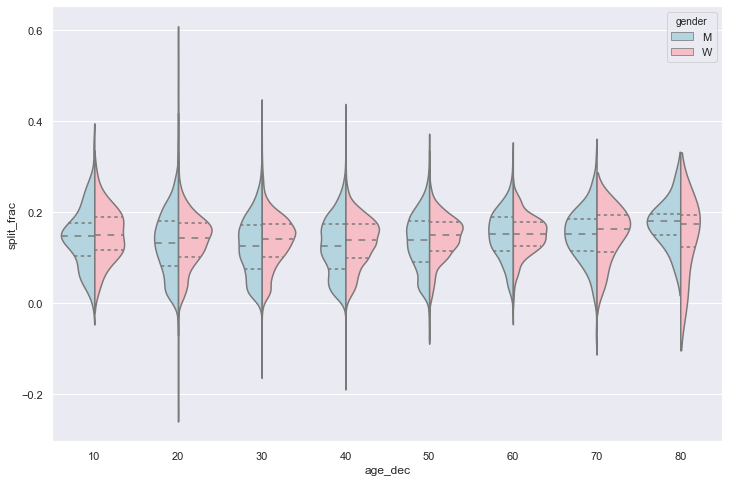

In [14]:
# 12. Tạo violin plot phân tích nhóm tuổi và giới tính của các vận động viên
# Bạn nhận xét gì qua biểu đồ vừa tạo
men = (data.gender == 'M')
women = (data.gender == 'W')

#with sns.axes_style(style=None):
plt.figure(figsize=(12,8))
sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"])

Nhìn vào biểu đồ, chúng ta có thể thấy sự phân bố của VĐV nam và nữ khác nhau: ở độ tuổi từ 20 đến 50, split_frac của VĐV Nam mật độ dàn trải hơn so với VĐV nữ ở cùng độ tuổi.
Một điều ngạc nhiên là VĐV nữ 80 tuổi dường như vượt trội hơn tất cả về split_frac

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfsAAAFhCAYAAAB3dgP3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd0W9eVL/7vRSVIsPdeRYoUSRWqF9rqsmTLckkkl3hs
z++tJOuXeMbJyqS85cwktmfezKS8OG3GEzt2HCuyZBWrWLYoWRLVSFGkKFLsvVeAIAmAJEDgvj9A
QOxEuZcgr/ZnLa8lguDFuQZw9z3n7LMPw7IsC0IIIYQIlsjdDSCEEEIIvyjYE0IIIQJHwZ4QQggR
OAr2hBBCiMBRsCeEEEIEjoI9IYQQInASdzeALz09g+5uAiGEEDJvgoO9Z/wd9ewJIYQQgaNgTwgh
hAgcBXtCCCFE4CjYE0IIIQJHwZ4QQggROAr2hBBCiMBRsCeEEEIEjoI9IYQQInAU7AkhhJB58K//
+jOUl993y2tTsCeEEEIETrDlcgkhhBAuqFS9+Jd/+d8QiUTw8fFFXFw8BgcHUVtbDQD4h3/4PpYs
ScFLLx1EUlIyGhvr8cgj2/B3f/f3KCjIx3/91+/g6+sHrdZSxr2/X4N/+7efY2hoCJ6envjJT/4F
tbXV+OMffwupVIpvf/s1pKdncHoO1LMnhBBCZvHRRx/g2WcP4je/+SPi4xNw8+Z1mEwm/O537+Jf
/uVt/OY3vwQAdHS04/vf/yH++78/wOnTJwEAf/rTf+EXv3gHv/jFb8CyrO14u3btxW9+80fs2vUY
Pv74QwCAXC7H73//P5wHeoB69oQQQsisWlqa8dxzLwIAli3LwOHDf8HIyAhee+1bYFkWAwP9AICQ
kFB4eSkBAAqFAgCg0+ng7+8PAEhJSQUANDU1oKysBKdOfQqTyYTIyCgAQExMLG/nQMGeEEIImUVc
XDwqKsoQGhqGiooyxMTEYt26jfjmN/9/6PU6HD9+dMa/9fDwQG9vDwICAlFXZxn2j4mJxfr1G7Fm
zXpUV1eitbUVAMAw/A22U7AnhBBCZvHCCy/h5z9/A6dOHYdUKsUjj2yDStWL7373m9DpdHjppVcA
AAzDTPnb1177Hn70o+/Dx8cHUqkMAPDii6/g//yfn+PDD9+HyWTCj370BtRqFa/nwLDWSQSBof3s
CSGEcOHWresID49EXFw8PvjgTwgNDcNjjz3u7mZNMdt+9tSzJ4QQQmYRFBSCt9/+Z8hkcvj7++O5
577h7iY5jHr2hBBCiADM1rOnpXeEEEKIwFGwJ4QQQgSOgj0hhBAicBTsCSGEEIGjYE8IIYS40ZYt
a/Dmmz+1/WwymfD44zvwwx++ztlr0NI7QgghZMxfD38AnU7L2fG8vJR48fmXZ32Oh4cCDQ11MBgM
kMlkKCjIR0hIKGdtACjYE0IIITY6nRYrn3yOs+Pd/exvdj1v/fpNuHXrOh55ZBsuXvwSO3bsxr17
dzlrh9uH8XNzc7Fnzx7s3r0b77777rTPyc/Px4EDB/D444/jG99YfMUMCCGEkJkwDIMdO3YhJ+dL
GAwG1NXVIC0tndPXcGvP3mw2480338QHH3yAkJAQPPvss9i+fTsSExNtzxkcHMTPf/5zvP/++wgN
DYVarXZjix9Ow8NDkMnkEIncfm9ICCGClJCQhM7ODly8+CU2bNgMruvdufXqXVJSgtjYWERGRkIq
lWLfvn24dOnShOecOXMGu3btQmioZf4iICDAHU19aBmNRrz77m/x5Zdn3d0UQggRtM2bs/GHP/wG
O3bs5vzYbg32XV1dCA8Pt/0cGhqK7u7uCc9pbGxEf38/vvGNb+CZZ57BqVOn5ruZD7WhIT1MJhMq
K8vc3RRCCBEkay9+3779eOWV/4WEhMQ5/sJxCz5Bz2Qyoby8HB9++CH0ej0OHTqElStXIjY21t1N
I4QQQlxm3Ro3ODgEzzxzkJfXcGuwDw0NRXt7u+3nrq4uhISETHmOv78/5HI55HI5Vq9ejcrKyjmD
vb+/JyQSMS/tfphIJKO2f8+2yQIhhAiBr48Pik8f4fR4c107794tmvLYrl2PYteuRzlrh1uDfUZG
Bpqbm9HW1obg4GCcO3cOv/rVryY8Z/v27XjrrbdgMplgMBhQUlKCV155Zc5j9/Xp+Wr2Q6W//8F6
U9pJkBAidIcOvsT5Mefr2rlg97MXi8V444038Oqrr4JlWTz77LNITEzEkSNHwDAMDh48iMTERGze
vBn79++HSCTC17/+dSQlJbmz2Q8Vge6ATAghDxXaz57MSqPpw5///F8AgNdf/7GbW0MIIWQmtJ89
IYQQ8hCjYE8IIYQIHAV7QgghROAo2BNCCCFu8tvf/grHjj1Y6ve9730X//7vb9t+/t3v/i+OHj3s
8uss+KI6hBBCyHw58vH70Ol0nB3Py8sLh154dcbfZ2Qsx+XLF/G1rx0Cy7Lo79dgaOjB69+/X4LX
Xvuey+2gYE8IIYSM0el0+IdN2zg73m9ufDXr79PTl+Oddyz1ZRoa6pCQkAiVSgWtVgu5XI6mpkYk
Jy91uR0U7AkhhBA3CQoKgkQiQXd3F0pLS5Cenone3h7cv18CLy8vJCYmQSJxPVRTsCezstZsJoQQ
wo+MjEyUlt7D/fslOHToxbHAfw9eXkpkZCzn5DUoQY8QQghxo/T05SgtLUF9vWUYf9myDNy/X4qy
MktPnwsU7MmsqGdPCCH8Sk/PxM2b1+Dj4wOGYeDj4wOtdhD375ciI4OCPSGEELLoJSYmYWCgf0Iv
PjExCd7e3vDx8eXkNWjOnsyKevaEkIeJl5fXnBn0jh5vLiKRCF98cWXCYz/5yT9z1gaAgj0hhBBi
M9ua+MWMhvEJIYQQgaNgTwghhAgcBXtCCCFE4CjYE0IIIQJHwZ4QQggROAr2hBBCiMBRsCeEEEIE
joI9IYQQInAU7AkhhBCBo2BPCCGECBwFe0IIIUTgKNgTQgghAkfBnhBCCBE4CvaEEEKIwFGwJ4QQ
QgSOgj0hhBAicBTsCSGEEIGjYE8IIYQIHAV7MiuWZd3dBEIIIS6iYE8IIYQIHAV7Mivq2RNCyOJH
wZ4QQggROAr2ZFbUsyeEkMWPgj0hhBAicBTsCSGEEIGjYE8IIYQIHAV7QgghROAo2BNCCCECR8Ge
EEIIETgK9uShNjSkx/Hjf0N7e6u7m0IIIbyhYE8eaqWl99Dc3Igvvzzr7qYQQghvKNiTWTEM4+4m
8MpoNAAA+vs1bm4JIYTwh4I9IQLW29uDs2dPYmhI7+6mEELciII9mZXQe/ZC99VXX6KmphJFRQXu
bgohxI0o2BMC4d7UqNUqAMDw8JCbW0IIcScK9oQQQojAUbAnsxJqj/fhQbsWEkIo2BPyUKCbNkIe
bhTsyaxoP/vFjd4+QgiwAIJ9bm4u9uzZg927d+Pdd9+d8XklJSVYtmwZLly4MI+tI3r9w7Fki25q
CCFC5tZgbzab8eabb+K9997D2bNnce7cOdTV1U37vF/+8pfYvHmzG1pJCCGELG5uDfYlJSWIjY1F
ZGQkpFIp9u3bh0uXLk153kcffYTdu3cjICDADa18uNFULyGELH5uDfZdXV0IDw+3/RwaGoru7u4p
z7l48SKef/75+W4eAQBQtCeEkMXO7XP2c/nXf/1X/OAHP7D9THOr84uyuAkhZPGTuPPFQ0ND0d7e
bvu5q6sLISEhE55z//59vP7662BZFn19fcjNzYVEIsH27dtnPba/vyckEjEv7X6YjI5qbf8ODvZ2
Y0v44ekpA2C5qRHi+Vnv1RQKmSDPjxBiH7cG+4yMDDQ3N6OtrQ3BwcE4d+4cfvWrX014zvg5/B//
+MfYunXrnIEeAPr65i+LvKioAGKxGMuXr5q315wv4/8/9vQMurEl/NDpRmz/FuL5WUfChoeNgjw/
QsgDs93QuzXYi8VivPHGG3j11VfBsiyeffZZJCYm4siRI2AYBgcPHnRn8+x29epFABBksBc6azAU
6nQFzXoRQgA3B3sAyM7ORnZ29oTHDh06NO1z/+3f/m0+mkQeIg9yQIQZ7AkhBFgECXoLnfATBh+O
8xOJKNgTQoSLgr2LzGazu5vAK6Hfy1DPnhDyMKBg76LR0VF3N4FXLCv0mxlhz9kTQghAwd5lo6NG
dzeBuICCPSHkYUDB3kVGo7CDvfBzEoRN6PcwLS1NyM39ij6nhMzB7dn4i53wg727W8Cv4eEhAIDZ
bHJzS/gl1GB44sQRmM1mLFuWicDAIHc3h5AFi3r2LhL+ML4wg4SVWq0GIOSbNmF37a0JsiaTsG/W
CHEVBXsXCTdIWJjNwg72Qif0YXyrh+U8hWZgoF/wSc4LBQV7Fwk92APCzsYXOoGO3hMBGBrS4733
/oAvvjjj7qY8FCjYu0jow/gmE0WLxe3heP9oNcXiMzg4AACoqal0c0seDhTsXST0ISiWpbnQxcza
sxd+MBTm+X311Ze4cOGcu5vBC8qzmF8U7F0k9GAv9AqBQmd9/4ReHEmo7t0rQllZibubwQsK9vOL
gr2LhL5ky2SiILGYWaeZent73dwSfgl/5EJ4KNjPLwr2LhJ6z1fo5yf0Oe0H+9kPu7klhEwk9Hyn
hYaCvYuEWqzESvjn5+4WzA+hd3xp18LFR/grmRYWCvYuEnqwEP5cr8DfwDFC/5ySxYeC/fyiYM8h
IX54hT+M/7D0CIUd7fv7Ne5uAnGQEK+X4/X1qXDnTh40mj53NwUA1cbn1MjICKRSqbubwSnhB/uH
g9B79qOjlOy12BiNBnc3gVefffYp+vrUuHbtMh59dCdWrlzt1vZQz55DBsOIu5vAOeEP4xOyMAk9
X8basxfqSoq+PrXt321tLW5siQUFew6NjAgv41n4PXthX1AfFkIMjCaTsGt4WHv2MpnMzS3h3uTP
40KYZqJg76LxPV/rdqlCIvRgL8AY8VAS4udU6AW7rD17iURYU58AoNPpJvys6VO7/YaUgr2Lxl9k
9Hq9G1vCD+EX1Xk4or1AR0pthFjcSugJbNbzE2LPXq2eWMTKYDRAp9O6qTUWFOxdNP4LKcxgL+ze
hbvvtuePsKO9ELdiFnqwt+Y4CTHY9/Z2T3lMpXJvFUsK9i4an5Sn1Q66sSX8EPoFR4g9woeRMIfx
hf3dMxisc/ZyN7eEe93dXbZ/Byu9AQA9PV0zPX1eULB30dDQg3l6IQZ76xdSqIQ/TfGwEGLPXtij
ataEZiHO2Xd2ttv+HebtCwDo7u50V3MAULB32fgAPzDQ78aW8EOIKwzGE/o0xQPCC4ZCJ/SevbWj
JLR8kqEh/YRld/4KTyikUnR2drixVRTsXTZ+SYUQg71e/yCrVIjz20LvPVkJ8K0TPKHfiI6/tghJ
e3sbAMDTL8DyAMMg0tcf/f2aKVn684mCvQuGhvQTPrDDw0OC6wlrtQ8ySGledPESfnEkgXUPIeyq
gEIsQGZlLaBjC/YAosf+7c7iOhTsXTA+CcNqodRB5srAwIORCyEGRiHewExHiOcpxJGm8YT4fbPS
aNxfZIYvra1NYEQiePr62x6LDQiy/c5dKNi7oL29dcpjarXKDS3hh8EwMqGwx8My5C1EQgz2E2ur
Cy/wC3klTF+fcK6T442MDKO7uwvegSEQicS2xyN8/CATS9Dc3Oi2tlGwd0FLy9hd2rgMEyF9iHt7
eyb8LPSNK4TcUxRisB9f10KI6+yFvBKmp+fBOnS1WrUgyslyoa2tBSzLwic0YsLjYpEIsQGB6OtT
u+1cKdg7aXh4CO3trVAGBoMZN1/Y2+vewglcGv+FBIR38ZkcAIV2fuN7hkIM9uNXwgixXoIQy29b
jV+aptH0IT//hhtbw53W1mYAgG9o+JTfLQkKBQA0NNTOa5usKNg7qaGhDizLIiAqFgDgJZPDUypz
e+EELnV1TVwqIrSkmqEh/aSfhZUdPDg4YPu3EIPh+PMzmYR3fkLNVjebzejs7IDUQ2F7bCHsCseF
lpZmMCIRvMcC+3hLgi2P1dXVzHezAFCwd1pNTSUAIDA6AYAlFzjcxxcDA/1TgshiNXld6PCwsFYa
TK5VPb5AkhCMHy4UYjAcf35CnN+2jlwIrcJcd3cXjEYDvIMfBESNpm/RJzePjAyjp8cyXy+WSKb8
3sdDgQgfP7S2Nrtl1IaCvROGh4fQ0FAHT78AePr62R6PGMu+7Ohoc1fTODMyMgyVqgee/g+Wjwjl
JsZqYGBgws9COz+N5kFhDyHuoDY+OAgxn8R6MyO0URlrrpNvSNiEx2tqqtzRHM60tbWOzddPHcK3
WhoaDrPZjNra6nlsmQUFeydUVVXAbDYjOC5pwuMxY4GxtXXxD0lZe/XKgGDbY1rtwExPX5T6+yf2
JIQ2cqFSCSdZdDrjV74Irb7F6OiorUjX6OiooJJHm5sbAAA+wZagGO0XALFIhLKye4v6PG3z9SEz
B/u0scS9qqryeWnTeBTsnVBeXgowDILjl0x4PNovEGKRCI2N9W5qGXesywqVgSG2x/r7hVUhcPIu
VEJL0Jtu5y2hYFl2wjaiQrtR6+tTTQh8Qvlsjo4a0dbWCk+/AEgUljl7D6kUaaER6OtTo7Gxzs0t
dF5LS6Nlvj44bMbn+Ht6IdLXHy0tTfO+5S0Fewep1Sp0drbDLywKck+vCb+TisVICAiGStUzYQh1
MbJORfiMC/ZCWlYITN2FSkhDwWazecpqCiFl5Gs06gnz9EKbgplcsEuvd+9e6Fxpa2uByTQKv/Co
CY9viEsEANy6dX1R9u6HhvSW9fVBodPO14+XHh4JlmVRWTm/vXu7gn1eXh4OHToEAKivr8f27dtR
VFTEa8MWqvLyUgBASMKSaX+fOjZfM99vJJfMZjPaO9qg8PGF2ONBclBvb69gAsboqHFKHQGh9J4A
y03p5ApsQtqVcXLyqJDODQA6Oton/CyUdegNDZZRT/9JwT7U2xdpoRHo6upAZWWZO5rmkoYGy4iE
f0T0nM9dFhYJEcOgYiyWzBe7gv2///u/4+c//zkAICEhAe+++y7efvttXhu2EJnNZpSXl0IslSEw
Om7a5ywNjYBULEbZ/XuLNjB2d3fBaDDAZ9Lck8k0OmHodDHr6GiH2WyGh9LH9piQ1jVbp2Ekcg/b
Y+N34lrsrCNPIrGlFzU52XKxa21tgnjc1q+TR2kWq8bGOogkkinXFgDYtiQVEpEIuVcvLbqRGmvC
nXUp9my8ZHIkBYWip7d7Xre9tSvYj4yMIDk52fZzYmKiILN752KdZwmKTbBdZCaTSyTIDI/CwODA
os0utSbQ+E6qAgUIaT2sJSN4/GqD8RXZFjvr+XkovW2PCeVGDQCam5sgkkggkVtGnljWLJg6EBpN
H/r61BOyuoXwvVOrVejrU8MvPAoisXjK7/09vfBIYgr0Q3pcuvTlohnOt63O8vWfUA9/NisiYwAA
ZWUlfDZtAruCfUJCAv7zP/8T1dXVqK6uxq9//WvExcXx3LSFxzq8FBKfPOvz1sUmggGQn39jUfbu
GxrqAIaZMK8W6KkEYCkaIQRNTQ1gGAZe/kG2x4SyRbHZbEZzcwPknl6QyB8ULpk8bbFY9fdr0Nen
gm9IBMbvdtfTI4zzs9XwiIoDw1gu0c3NTYt+mqm6ugKA5bxmsj4uCdF+AaipqURpafE8tcw1ZWWl
MJtNCEmYPS6MlxQUAi+ZHJWVZfPWcbYr2L/99tvQ6/X4/ve/jx/+8IfQ6/V46623+G7bgjI6Oora
2irIPZUTikFMJ9BLicyIaKhUPbY5/sVicHAA7e2t8AkKhXTcEHCApxf8FZ5oaqxf9KM6Q0N6dHa2
W5Jpxo3QaPrUi6Y3MZv29lYMDw/DPzJmwsavXZPmuRer2lrLiFlAVMyEx7u62qd7+qLCsizKykrA
iMQIGDdVaDKN2oLlYsSyLMrLSyESTzyvyUQMg6cyVkEhleLK5ZwFX7NkdHQURXcLIBJLEJKYYvff
iUUiZEZEYXh4GHV187Pm3q5g7+vri3/+53/GmTNncPLkSfzkJz8R9BaF02lqqofBYEBQbAIYZu69
sx9NWgqpWIzr168sqrngigrL6EXw5AREBkgOCYPBaLAN8y9WtmSayInBwmA0CCIRyhoUAqLjJzze
q+rByMjiH+qurCwDwzAInHR+7e0LOzDYo7GxHn19agTFxE+42WYYBnfvFizam9Gmpnr092sQFJsI
iVQ263N9FZ54OjMLZrMJp08fX9AjbiUld6EdHEDYktQJ75c9rEP59+/f46NpU9gV7D/66COsWrUK
qampSE1NRVpaGl555RW+27agWOffA2MT7Hq+j4cC2QnJGBrS48qVi3w2jTNmsxmlpXchEksQFDP1
PNPDLMP6ZWWLa7RiMmtt6vHJNAqpJRlqsc+NmkwmVFVVQOqhgN+4nItQbx+wLOvW/bS50NXVge7u
LvhFRE+orQ4Aba3NizYYApbeb17edQBARGqm7XGlTI600Aj09vagvt49ddVdwbIs8vNvAgDCU9Lt
+puEwBDsWpoOvV6HU6eOLsgOk06nRV7eNYilMkQtW+Hw3wd5eSPKzx/NzY3zckNjV7D/85//jM8+
+wx79+5FTk4O3n77bSxfvpzvti0YJpMJ9fW1kHl6TagoN5f1sYmI8PFDRcV9t1RMclRtbTUGBvoR
krAEkmnqcYf7+CJE6Y36+hpotYtz3a/BYEBDQx0UPn5Q+DwodRwfaHlf6+vdsyMVV2prqzA8PITg
uCQwogdf76SxjTncUaaTS0VFtwEA4cnLJjyeGBgM/ZB+yuZNi0l1dQU6O9sRGBMPZUDQhN9tSUgG
A+DGjauLLg+ovr4W7e2t8I+MmXJes1kbk4C1MQlQqXrx2WefLqj9D1iWxaVLX2BkZASxy9dMufG0
14oIS+++ouI+l82bll3BPjAwENHR0UhJSUF1dTWefvppNDQs7qFcR7S3t2JkZBgBUbF2DeFbiUQi
HMhYBalYjIs55xf00ieWZXH7tmWbyYilGdM+h2EYrImJh9lsxt27BfPZPM7U1VXDZBpFYMzE6Zgg
TyUCvZRoaKhdkL0Ie929ewcAELYkbcLjkb7+8PXwRHV15aItLdvXp0JVVQU8/QKmFGVJCbHWt1h8
a7QBS0b31auXIBKLEbti3ZTfByu9x/KAeuclMHDFYBjBlSs5YBgR4lZOPa+57EpZhrSwCLS3t+Lc
uZMLZkOn4uJC1NXVwDc0AmHJaXP/wQzSwiIgEYlRXl7K+6iUXcFeoVAgLy8PKSkpuHz5Mnp6egS3
rnU21t5eQOTcaygnC/RSYl/achiMBpw+fXzBLg+qqalCT083guOSJvR4J8sMj4ZSJkfJvaJFtxYW
eLDUZUpRJIbBysgYmEwmlJQsjizgydraWtHR0Qb/iBgofHwn/I5hgFVRsRgdNdpuCBabGzdywbIs
ojNWTbnptmY3l5eVLsrSuVeuXIROp0VU+koovH2mfc4jSUshFolw69a1RZMke/XqJQwM9CMiNdPu
ZWnjMQyDA+mrkBAYjIaGOnz55Rm3j2w0NzciN/cSpB4KLNm41aEO4GRyiRQpIWHQaPrQ2clvgqld
wf6NN97A5cuXsWXLFmg0Gjz22GN48cUXeW3YQtLQUAuRWDLtunN7ZIRHYW1MPNTqXpw/f9rtH9bJ
TCYTbty8CoZhEJ2RNetzJWIxNsYvgcFosM0vLhZqtQotLU3wCQ6Dwtt3yu9XRsZCLpGgsDB/UfZ+
Cwos86KRadNPsa2JiYeXTI47d/Im7AW/GLS2tqCmphLKwJApiXmAZRRtfWwiRgwjuH37phta6LzK
yjJUVNyHMiAYUWkzz/36eiiwOioOg4MDi6J3X1ZWgvv378HLPxAxmbNfV2YjFonwteVrEOXnj6qq
Creuwe/t7cHZsyfAAkjZvGNKyXRnZIyNUvE9KmVXsD979ix+/OMfQyQS4be//S3u3LmDl19+mdeG
LRTWAhd+4ZHTFoKw187kZUgIDEZ9fS1yc7/isIWuKykpgqZPjdAlqVN6hNNZHR0Hf08vlJTcnbKZ
zEJmnXoIXzp9kpCHVIoNcUkYHh7CrVuL60amq6sDDQ118AkJh+8MW2zKJRJsTVoKo9G4IG86Z2I2
m3H58gUAQMLqDTP2pNbExMFP4YmiotsLfsmWVV+fChcvfgGRRILkTdsm5FlMZ0NcEkQMg6Ki2ws6
GbGtrRWXLn0BiUyGlC07Xbp2AoBMIsFzK9cj1NsH9+8X49q1y/N+/hpNH06cOIKRkREkrX9kxu+Z
oxICg6GQylBdXcnrd9KuYH/58vz/j10orNmvk5dpOUokEuGZzNUI8vLG3bsFKCpaGHPew8NDyMu7
DrFUhpg5evVWYpEIu5KXwWw2Iyfn80URNAYHB1BWVgK50nv2oh6xiQjw9EJx8Z1FlZl/48ZVAEB0
xqpZn7ciMgZLQ8LR1taCq1cvLYrvdXHxHfT2diMkIRneQTPXuJCKJXhi2QqwLItzZ09Cr9fNYysd
ZzQacObMSRiNBiStzbbrRtvbwwNpoRFQq1UL9vOpVqtw+vQxmM1mJG/aPuO0hKM8pFK8kLUBgZ5K
FBbmo6Agj5Pj2qO/X4NPPz0MnU6L+KwNCImffm8UZ4hFIiwNCYNer+P1JtWuYO/n54c9e/bge9/7
Hn784x/b/nsY2JZpOTFfP5mHVIrnVq2DUu6Bq1cv2ipluVNe3nUMDw8jKn2lQxmlySFhSAuNQEdH
G4qLF/4c8O3bN2EymRC9bOWsvSepWIz9Y8tozp07tShWHTQ3N6KpqQG+oRHwC4uc9bkMw+CJZSsQ
7OWN4uI7KCi4NU+tdM7AQD9u3MyFRO6BuJXr53x+XEAQtiYtxaB2EKdOHV2wVedYlkVOznmoVD0I
W5KG4Pgku/925diS0flan+2IgYF+HD9xBMPDw0hct8WujWEc4SWT44XVG+DjocCNG1fm5f9Bf78G
x459jMHBAcQuXzNjArMrrAmm1njDh1mDfVOTZU3uU089hW9961vYsmUL1q5da/tP6HQ6HdraWuAd
HAqZwpOTY/opPHFo5TrIxBKcP3/GtmGJO2g0fbh3rwgeSh9E2Ln+dbzdS9PhKZXh+rUrU7bkXEhU
ql6UlhbDgdz8AAAgAElEQVTDw9sHwXaUtIz2D8S2pFTodFqcOvXJgi5EYzKZbEPc9mY7e0ileD5r
/dgF8yry82/w2USnWZc3jRqNiF+1HlIP+4qWbIpfguUR0ejq6sTp059O2f1vISgqKkBVVTm8g0IR
n7XBob+N9Q+Ev6cXqqsrF1SSrFarxafH/wbt4ABiV6xFaOJSXl7H10OBF7I2QCGV4eLF82ho4G+5
rEbTh6NjgT5m+WpEpa/k5XXiA4IgFYt5PZdZg/0//uM/AgBycnLw1FNPTfmPC7m5udizZw92796N
d999d8rvz5w5g/3792P//v147rnnUFU1f5vLVFWVgWVZBMUkcnrccB9fPLN8ta1ClLuqtt26dQ1m
sxkxy9c4NaemlHtgf/pKmMwmfH7u1IJMamNZFlevXgTLsohbtR6iOeZErTbEJWJVVCx6erpx4vjf
FuxyvNu3b0KtViE0aSmUgfbXgPDxUOAbqzfC10OBmzdz3TIHOpeKivtobKyHX1gkgh0YNmUYBvvS
liMlJAwtLU1ja7QXTg+/ubkR1659BamHAilbdjj83WMYBmuj42EyjS6YkRm9Xo/jxw+jX9OHqGUr
nCoy44ggLyUOrVwLMcPg3LlTvOwKqNGocfTYx7abl+j02afIXCERixHnHwS1WsVb8uysVz6RSITn
nnsOeXl5eOmll6b85yqz2Yw333wT7733Hs6ePYtz586hrq5uwnOio6Px8ccf4/Tp0/j2t7+NN954
w+XXtQfLsigtvQdGJEJwHLfBHrAsFdqzNB1DQ3qcPj3/FyOVqheVlWXw8g9EkJ1VAaezJDgUG+IS
0adR4+zZhbMO1qqqqhxNTQ3wC49yaCqGYRg8lpqJzPAodHZ14OjRjxdc2c6Ojjbk59+A3FNp1xD3
ZAGeXvi7NZsQ4OmFO3fy8OWXZxfM+6fVDuLKlRyIJVIkrst2eHmTeCxHJjk4DM3NjTh58pMFsSRv
YKAf586dAhgGS7N3OZ3NvTIqdiwZscDtc/fDw8M4ceJvUKtVCF+ajpjla+bldaP8AvBk+ioYjUac
/uwYp6McGk0fjh07DJ12EHEr1/F+8wJYpqAAoLWVn83GZg32H374Ib73ve8hKCgI3/nOd6b856qS
khLExsYiMjISUqkU+/btw6VLlyY8Z8WKFfD29rb9u6trfoaLm5sboFb3IjAmwenqSHNZHR2PrKg4
9Pb24NKlL3l5jZkUFuYDAKIzslxaJwoA25akYUlwKJqbG/HVVwtna0prqWKRWILENZsdPk8Rw2B/
+kqsiY6HStWDI0c+XDBZ3nq9DmfOngQLYMnGRyGRzV5vfCa+Ck+8vHazrdKjpTSpe4Miy7K4ePG8
pTrZynUTtul1hFgkwrPLVyMtLAJtba04duyv0GoHOW6t/UwmE86ePYnh4SEkrN4Inzk21JqNJbdk
JcCyOH36U/T0uGcazWg04tSpo+jp6UZo0lLEr5p5tQQf0sIikJ2QjIHBAZw/f5qTa49WO4jjx/8G
rXYQsSvXzbiUlWsxY9tt8zW1O2uwVyqVWLNmDY4cOTJhrn78nP03v/lNp1+8q6sL4eEPli+Ehoai
u3vm4Zhjx44hOzvb6dezl6VGtWUeM3JcjWo+7Fq6zHahna/qXzqdFhUVZfDw9p1QH95ZIobB0xlZ
CPP2xf3793Dp0hcLIuBfuXIRQ0N6xGRmwcPJjGCGYbB7aTp2pSyDXqfDsaMfuz0xymw249y5U9Bp
BxG7fI3T9R+svGRyfGP1Rlsv+JNP/gKNpo+j1jqusrIMDQ11lupkS1JdOpZYJMJTGVlYHW25qT58
+AN0dXVy1FLH3Lp1DV1dHQiOS0JokmvnBQCxAYF4fNkKDA8P4+gnf+U1uWs6ZrMZn39+Ch0dbQiK
TUTi2i3zGuitshNTkBQUgqamBhQW3nbpWAbDCE6ePIqBgX5EZ2Qhap4CPQCEePtALBLxVvJZMvdT
gICAgBl/N1897by8PJw4cQKHDx+26/n+/p6QSJxb21laWor29lYERMU6VMvZGRKRGE9lrsK7t67i
6tWLyMrKhKcnN8mAMykrK4TZbEJESjpnX06ZRIIXsjbg48JbKC0thkwmxoEDByB2cX2tsyorK1FZ
WQZlYLDL2bMMw2BdbCKCvLxxorQQOTmfQ6PpwRNPPAGJxK6vEKfOnTuH1tZmBEbHcdbrkEkk+NqK
NbhYXYb8pnp88slf8MILLyA+fmoBGz7p9Xrk5l6CSCJB0nrHh++nI2IY7FmaAV8PT1yqKcexox/h
qaefxooV/A/NWrW1teHOnTzIld6cBsUVkTGQisU4ff8uTp/+FOvXr8fu3bshl0/d24Jr586dQ319
LfzCIrFkw6NuCfSA5fu5P30l/vvmFdy8eRVZWZkICQlx+Dgsy+Ljjz9Db283QpNS51zGyjWJSIwg
LyXUKhUCA73szi+y+/iuHsCVNzg0NBTt7Q9KBHZ1dU37JlVWVuKnP/0p/vSnP8HXd+61qADQ1+fc
/M3w8DBOnz4DRiRyah7UGQGeSmQnpOBSTTk+//xLPPLIDt5ei2VZ3LqVB5FEMnUbWxd5ymR4cfUG
HC7MQ2FhIdRqDfbufRKyaTbV4ZPRaMDJk6fAMCIkrX9kzkIl9koMCsH/ty4bx+4VoKCgAK2t7Xj8
8aehVCo5Ob496upqcOPGDSh8/JDE8QVWxDDYlZKOQE8lvqgsxXvvvYft2/cgPX3+ejeXL1+AXq8f
G77nZn02YLlObYxPQqCXEqdKi3D06FFUV9dhy5ZtvN+wsSyLkyc/A8uySFqXDfHYDotcWRYWiSAv
JU6UFCIvLw/l5RV49NGdSEzk9vs9XmVlmeVz6OvPSdEcV3nJ5NibloljxQX49NMTePbZ5x3+bhQX
30F5eTkYkRhiicT291XXL2KwtxsyTy9k7noSANBeWYr2Ssvunxm79kPuqcRgbxeqrlumoeNWPYgd
+U11MIyOYmeKZfOm4yV30Kbpg4+HAi+v3Wx7Tn5TPfQGA4xmE+rr2+DrO3PZ8pkEB8885cXtrYOD
MjIy0NzcjLa2NhgMBpw7dw7bt2+f8Jz29na89tpr+I//+A/ExLhW2GYuLMvi8uUL0Om0iE5fZVeR
C66sjY2Hj4cC9+7d5XU5TUtLEwYHB+zaV9oZCqkML67eiMTAEDQ01OHo0fmfJ83Pv4nBwQFEpmXC
y2/mUSln+Ht64ZW1m5EeHomOjjYcPvzneZsv1et1uJBzDiKRGClbdvDy/gFAVnQcXsjaALlYjJyc
z3HlSs68FE7q79dYloJ6+zq1FNQeKSFh+Pv12Qjy8kZxcSGOHv0r76thWlqabCOFc9VBcFaoty/+
1/pHsCl+CbSDAzh9+lOcOnUMGg33m29pNGpcvPgFxFIpUh/Z5XS+iFWDqgc5VQ+mMI+X3ME7uTn4
4PaDKpb5TXV4JzcH7+TmYGBsZUyrRm17rLyzHUtDwrEkKBStrc0O7145ODiAa9evAIBliaebRilE
Isvr8pEMPP9jkOOIxWK88cYbePXVV8GyLJ599lkkJibiyJEjYBgGBw8exB/+8Af09/fjZz/7GViW
hUQiwaeffspLe0pLi8eGfkMQ6WD2pc4wgndyc5AaGmHXHRwAvLx2M3w8FGjVqHGipBCG0VGYTKOo
qCjDqlX8ZLRaN4IJTUjh5fiApSzroZVr8UVlKQpbm3D48Ad48smvITQ0jLfXtBoY6EdR0W3IPL0Q
xdNSGalYggPpqxCq9MWlmnIc/eSvePLA1xAVxe/N6PXrVzA8NIS4Ves5v4mZLC4gCK+uy8Ynd/Nx
9+4d9PWpsW/fAV5Hae7cyQPLsojJyOK1pxjkpcTfr9uC8xUlKOloxcd/fR87du5FcjI/68Lv3SsE
AAz2dqOhKA/xY70+e3qMjpCIxdi2JBXp4ZH4oqIUDQ21aG5qQNbqdVi7diOkHIwoWJInv4DRaEDy
xm3T7jHhTtuT01DT24X8/BtISEiyu3d/+/ZNjBqNSFqXjdCkiZ+DlM1TR1ojlmZMmR70DgrF6gPP
235uK7dca9fFJuKRxAfX22cyV0853rrYRKyLTcSdlgacryiFTsd9MS+Xg72riVjZ2dlTku4OHTpk
+/dbb72Ft956y6XXsEdrazMuX74AiUyOpVt2cD5fYg+pWIzhUSPq62t4CfYGgwG1tdXwUPrA24VM
YHuIRCI8lpoJf08vXKwux9GjH+Gxx55EUtLcRW1ckZ9/AyaTCQnL10DM4/CsdVjYV6HAqdIinDp1
FE89dQiRkVFz/7ETurs7UVZWAk+/AN56vZMFeHrh1XVbcPxeIeoa63Hs6Md48sDXeZm2MBgMqKgo
g9xT6dJSUHvJJBI8mbEKcQFBOF9ZinPnTqK9fQ22bNnKaZ6JwTCC+vo6MIxo3oa6Q5Q++Mbqjajo
6sCF6vu4ffsmqqrKsWPHY4iJiXPp2DU1VWhpaYJILIZW3WOr/OfMULe1QxUfGGzrIAGzB8PxovwC
8Fr2zgmPBSu9kRwchuquDnR3d9nVwTAYRlBeXgq50hshdhTd4pNibLSOjxUxdl0Nb9y4gU2bNk14
7MKFC9i1axcOHDjAeaPmm0rVi9Onj4NlgaXZOyH3cvxi5iWTT/ngOfOh/a8bl9HZ2Q6z2cz5DUdd
XTVGR41gRxg03s23q4fhys0cwzDYEJeEAE8vnCwtwpkzx7Fjx2PIyOAnMUqrHUR5eSk8vH0RHGd/
+VFXLAuLhEQkwqf37uD06WN47rmX4efn+Faec7FWuYtbtZ6zHAR7yCVSHFq5FucrS1HU2oTjnx7G
s197AV5eru/2NV5dXTWMRgPEABqLb9vd+2VdnF5YHhmDCF9/fHqvAHfvFqCnuxNP7H8WHnZW65tL
a2szzGYTopatQOyKiVVH7e0xOoNhGKSFRSApKAS5dVXIa6rD8eN/Q1bWWmzevNWpa4sl3+caAEAi
k7ttqHsuyyOjUd3TiZqaSruCfXNzI0ZHR8GOjKDw9BHb4ymbt0/Zi2H8Z8/KOyhk2veypazI4bbL
xJaQzEfdlVmD/eeffw6DwYB33nkHr732mu1xo9GId999F7t27Vr0u98NDg7g5MlPMDIyPLaTkWvL
mFwVrPRGT9cg9HodlE6uL55JVVUFAPDa451OSkg4Xlq9CYeL8nDx4nkYDAZkZXFfbrm4uBBmsxmR
acvnNSCmhIRjb2omzpbfw5kzx/Hccy9zmvTV16dGbW01lIHBvM35zkYkEmFvaibkYgluNdXh+PHD
OHjwG5DLuQmIgKXHCDj/2XwvLxfLwiKdnkJjAUT4+KG1rQVHj36EZ555npMbmvZ2S10GV64rrkwR
dmsHUN7VDq+x6ZfCwtvo7e3BE088DamDOR+trc1Qq3sRHJeE5E3bJvzOmaHuYT0/+04kBASDYRi7
i9NYq++5O8kQsCTJAuAlR2bWb5ZWq8Xdu3eh0+mQn59ve1wsFuP111/nvDHzbWhIj/ff/yPMZjN8
gkMROjav4uiQFMty98Z4yqzDOEOcBvuRkWE0NTXA0y8AK/c9O+F3s31Rh/VaFJ48bEuicfZiCgCb
45cgr6kOubmXIJfLOc3yHh0dxf379yCRyxHiwKYiVo5kzALTn19cQBAae3tw82YusrO3Tf9CTigp
uQvA8p44m31/pqwYmeHRLp3fjuQ0rImOR0FLA3JyzmPfvgOcrAYwmUxobm6Ah7cvsvYfnPC7uYJI
wUn7luLOhYGlRHKzRo2C5gZ89tlRfO1rLzgcECfr7ras6VcG2F/KmA9ikQiPJi1FeWc7apoacO7c
KTz55Nccev8qKu4DAEJdrH3AN5lEgkBPL6jV9m2/bR0yT9v62JxLrR0ZeYletgqNdx3bmc86ksow
3HdWZg32X//61/H1r38dt27dwoYNjm3WsNAZjQacOmXZhlEskUIZ6Pi6TD6Ix3qkXJctbWysh9ls
QmDM/K6bHs/HQ4GX1mzE+/nXcOnSF/D3D+Rsjru+vgZDQ3qIpVI03btj9zBwcBx3y5OWR0Sjf3gI
RUW3kZy8FGFhro8Smc1m3L1r2Q55sLfbNj1h7w3pqIHLTXwY7EpZhq7BftTUWOoYpKa6nj/Q0dEO
o9GIoHjnPwt/vz4b3uNGGpyd900NjYBhdBT32ltw69Y1ZGdvn3wYh6jVKsgUnpC4sO6dqylCwDLt
dORuPuob6lBaWozMTPs2dmFZFg0NdZB6KOATzH+irau8ZHL06rRgWXbOGxrZWAfLxFPJ8vymOtxr
ezDK8HRmFqImJdhab7SNY9d9LpIpJ5s12L/xxht488038Yc//AF//OMfp/z+L3/5C+cNmg9msxnn
z59GZ2c7guOSsGTj1gkfCEeHpG4e/hNnbTONDd+IxdwOtTc0WPYccHarXi6TaJ7JXI2Pi/Jw7txJ
vPrqtzkZ8i4vt/Q6xBLnviSOZMyON/n8fD0U+Mudm7iYcx7Pv/CKy3kXbW0tYFkWIonUpamJJ5at
QPK4i7Qr79+TGavw++uXkHfrOlJS0jg4R8uF0N1TaIBlrntvaiYa1b0ovluI1as3OF3kymQyYXBw
YEEFR7FIhP3pK/G7axdRWJiPjIwVdvXuBwb6odfrEBiT4LbiOY4w2xHkrQICAgEAWnWv2z+DLCw9
ez6KIs16lT140DKk9t3vfpfzF3anmzdzUVdXA9+wSM4Lk7hqeGw7Ti7fbJZl0dhUD6mHAl7+gZwd
11nxgcFYH5uAW411qKi473LCnmWKoh5e/oFYsfeZCb+b68bNujyGK7EBQVgeEY177S0oLb2L5cuz
XDpeS0sjAEuyUEDkg6V99t6QSnhYKuen8MSKyBgUtTahpaUJsbGujRbZhrqDFsbomkQsxsqoWFyp
rURHRysSE53L0NbrdQAAmZOb3fDFW+6BxKAQVHV3QqsdhLcdpaR7e3sAYEFcP+yhGdLDy0tp17U9
OjoOAKBqbuClPPrkjsRMz1kXm4jcuipcrauCJw+fmVmD/dDQEAoKChZUMHRVU1MDCgpuwcPbB0s3
u2eJ3WyGjdwHe7VahSG9HkGxiQvmvVwXk4j8pnrcKy50Odg3NTXCbDYjICqOm8a5aNuSVFR0dSDv
1nUsW5YJiZOjDYBliBvAguodApbdDotam9DW1uJysFerVZDI5JAp+C0T7QjrlMDQkPNbG4+MWKZQ
+LjhcpXf2P9rnU5nV7C3brvq7KZEs2lQ9eCd3Bzbz7MNc48X6ec/7QjV/716AYMjw0iwc4pQqVQi
NjYeTU0NGOzthrcbbzqtBYPseU8cNWuwf+edd2b8HcMwi24Yf3R0FBcvngfDiJCyabtL82h8GRkd
BcMwLicGjWfdRcknJHyOZ84fbw8PhCh9oOagellraxMAwD+CnzXujlLKPbA6Og43G2tRXV2JtDTn
l1INDg5AKvdwuUoZ1wLGeh46nc7lY2m1g5B52tcLmy+9Y1UfXbnoWvNuGPHC6lAA46cL7ctAHx4L
QlIOV2DwxTrvHRdnf72GNWs2oKmpAY3F+Ujf/rjbPovqsdEge8vCO2LWYP/RRx9N+Fmj0UAsFtu2
nF1sSkuLMTDQj4jUTCgD3ZsdOxOjyQTJuLrMXLCWc1UG8rupj6OkYjEMRoNdSTSzsQ4xevotnCHG
5ZHRuNlYi8bGepeC/fDI8IK8KTWMjgIApFLX8y1GR0229cULAcuyqOjugFQqRWRktNPHsX2k3b8B
5BTasVEHe4eLR8febxEPy3bjA4NxaOW6WZ8zXT7JdFiWhZdcDqPZjCUOrBqIjo5FfHwSGhpq0dNQ
45biOizLokc7CF9fP5dGA2di1ztXWVmJf/qnf0JXVxdYlkVCQsK81KrnWlnZPTCMaF63LVwIVCrL
EhRPX35LrDqCZVmo9Fp4OVHAaLKBgX7IPZXzXj9gNoGeSkhEIvT1uVabnAED8wIMFu1jIzJBHAx5
isUisGZuV5+4okHdC82QHmlpGS4lj1ov2F11VVC3Ntoed6RYC/Bgnf14rg51DwwPQSwSO558uAA/
i+NVdHVApdMiLS3D4XPbunUnWlqbUH/nJnxCwnmZspiNdmQEeqMBiUFxvBzfrk/yT37yE7z++uvY
unUrACAnJwc/+tGP7N5udiEwGAzo6emGb2gEpB4Kzo/P1RdSIhLBZDK53Nsdb3BwAFIPxYIKhp2D
/dAbDEhLSnH5PEdGRiBZYElQLCwZwWIXh3BlMhl0PJTOdFW92jKawsV+AHK5B4wuLhF8Ly/XVpAE
cC0YWpdJuZpLYl3SBRdLivNBZxiBp5eX3d8961Kwyms5E4rPuFpljksmsxmXayvAMAzWrnV8qbiv
rx+2ProTOTmfo+jMJ5B5eCIwNsGhvQzG118ZdXApX/uA5Qaarz1E7Lr6syxrC/QAsHPnTvz+97/n
pUF8se68Nqjqxp1TE29SXP3AsqwZXA26K6QymM1mGAwGzpL0dDod5DwkfLiieOyCysU2nGazCSKR
+6tfjdc12A8zyyLQxekiDw8F+gf6Ob35c5XRZEK9qgcB/oGclAb28lKiu6drQZyjyWxGdU8XfH39
EB7uWrVCa4VBn5AwLNu2d9bnzlSs5ebhP027zn469g51A8CQ0QhfB6Zjrefi6l4ofLrVWAe1XocV
K7Lg7+SqgWXLMtHS0ojKynKXb0Ad1dbfBwAIC+Mnt8quYL969Wr8/ve/x8GDByEWi/H5558jMTHR
thd9RIT718fOxVbrmqcPK1dfSOXYl0qrHeQs2I+OGuHp4hwQlxmzw0Yj7rW3wFvpjYQE14O9SCSC
2cVhYEcKX4w30zBpeZfluxHjYhEjuVwO1mwGazaBWSDz2m39fTCaTIiLty+wzEWpVKKrqwOjhhGn
E8AmF9WZjj3BsGuwHwbTKJbGxrt84yGVSiGVSmEcdj6jnw9mloXBNOpQuWNrnlZkaiai5tgRlKv6
/o5Q6bS4Vl8FT4UnNmzY4vRxGIbBjh2Pobe3B729PRN29XO0/kpbeYlDFfRa+lRgGIaTYlzTsevq
cenSJTAMg+PHj9u+ACzL4sUXXwTDMLh06RIvjeOSQuEJpdIbwwYDVj1xcM46yI58YLksbeinsEwx
9PdrEMhBQp3tTly0MHqFAFDc3gyjyYS1y1dxsvRRIpHCzHHFQVeYzGbca2uBXC5HYqJrG/JYRyzM
ZjNcGbw4U1YM6bgDuHIz0zK2R7oryWvjWZPEjMNDbs/27hkbAQzmaFdIpdIbg3rXVyxwSTeWnKdw
YKmjtaesH+t9LiQsy+JsWTFGzWbs2roLHi5O00qlMjzxxDP4298+QH3BDSh8fHkvtmM0mdA2oEFw
cAine06MZ1ew//Wvf43CwkK8+OKL+Na3voWysjL87Gc/w549e3hpFB8YhkFy8lIUFRWgp6Fmyp7F
C4X/2IVPo3EtsWs8hmHAmlyr389VxqyZZVHQ3ACxWMLZ7ndyuRxaF9ZDA44VvphLWWcbdIYRrFq1
xuWsWpPJkgXNR61sZ/XaAiI365GtF7f7F886PB9sGOI2kKrGArO/PzfJrD4+vujrU2PUYFgwyye7
BvsBAAEB9p+jn58/pFIZtKpuvprltNvN9WjWqJGUlILkZG6u635+/nj88adx4sQRVF67iOW7D8CD
x6nQVo0aJrMZ0dHOVTi1h13B/u2338YPfvADXLhwAR4eHjh16hS+853vLKpgDwBZWetw714Rmkvu
IDA6fkEuafJXWIJ9f38/J8djGAYymQxaVY9TuQpcz9HVq3qgGdIjPX25Qz2L2chkMpgGBjg5lqtY
lkVeUx0YhsGKFVOH9x01PDwMkVji8o5ck8vlTsfem5ke3SDEYglnhT/4qAPurI6xJCkuRtUsxwlG
U1MD9Bo1fEIWRmGkiu4OAEBUlP2BRSQSITIyCo2N9RjRaZ3aBpwPvbpBfFVTAYXCE9u37+Y05yM6
Ohbbtu3GxYvnUX71S2TufhISDuufjGdNeLVW8+ODXcHebDZjzZo1+P73v49du3YhPDyc841a5oNS
6Y116zZZyuUWXEfypm1uTwiazHsst0Cn4277Rw8PBUZG+NnkwVHWeXEud7yTyeQwm0bBms3zurXt
dOpVPegaHEBycip8ff1cPp5Op4VUoVgwn1OjyYQe7SBCwyI4qz5pXd6WtP6RCSWBpzN5eq3g5GEY
ONoqVTsyjKY+FYKCgjkrV2pNthro6VwQwV6l06K0oxW+vn4Or6RISFiCxsZ69DbX81JW1lFmlsXp
+5bh+z3b9/BSYjYjYwVUqh7cvXsH1Te+Quoj3N5QWDWoeiASiRAVxc3U2HTsCvYKhQLvv/8+8vPz
8dOf/hQffvghJ3s9u8OaNRtQX1+LzqY6eAeHIiLF9V27uOQxNuxr4DATVKn0Rn+/Bqv2H5rzAj35
Ymrd4pYLw0Yjqno6ERAQyGkSijVY3PnsCMZ/D+0ZuXB0ecxsWJbFtfpqAMCaNetdPp7ZbIZOpwUj
Ek0YlXF0nTaXqro7YGZZTpbcWVk3fTKPTVm4y7X6apjMZmRmruLsmNb/T30dLXMmtvFt1GTCqdIi
mMxmbN78qMM3a0uWpODKlRx011W5tN0yV/Ia69DW34eUlDQsWTL7FJwrsrO3Q6XqRXNzI1pKixCT
6dp+F5PpDCPoGOhHdHQsp5VTJ7Pr3f7FL34BvV6Pd955B76+vuju7sYvf/lL3hrFJ5FIhMcffwoK
hScaC29B09Hq7iZNYB4bNueyZr+PjyWjdEQ3yNkxnVHR1Q6T2YzU1HROLxQPlt25d1lQg7oXLRo1
4uMTEcJBL25oSA9g4czXsyyL280NACxLlLhiXXXC7Xa8jqlXdeNOSyMC/AM5PTcvLyUiIqIw0NWB
Ya1z3z9rDY+cqjLbY8dL7uCd3Bx8cPu67bH8pjq8k5uDd3JzbDXWWzVq22MnSgvRPqBBamo6lixx
fG7b09MLS5Yshb6/z+3XTbVei6t1lfBUeGLr1rlXQblCJBJh794n4e3tg5bSQvS1tzj09/lNdbO+
d4+J64AAACAASURBVA0qyxC+qyt35mJXzz40NBTf+c53bD//4Ac/4K1B88Hb2wdPPPEMPv30MCqv
XUTm7ifh6ev6emEuWL+kXA5JWbdwHOrXTFhKMt+K2y1D+EuXLpvjmY6x3jis2PvMnNnck0cuHF0e
MxMzy+JSdTkAYOPGbJePB1jm6wEgOH4JktbNvpxoptUj5Ze/4KQtAHC/sw1t/X1ISkrhLIENgK2K
osFNWetqvQ4nSgohEomwe88TnGy5PF56+nK0t7eio+o+4rMcL/biKhaA3jCCqu5OREfFYMeOx5y+
2V69ej2qqsrRXHIHfuFRbundsyyL8xWlY9n3OznL/ZmNQuGJJ554GkeOfISam5exYt+znG3cVD8W
7F3dUGouC2PhrhtERkZh9+59OH/+NMovf4Hlew64VFnPevedGhph2/f9eMkdtGn64OOhwMtrNwOY
uLzp5bWb4eOhQKtGjRMlhQBgywjnogyplbWwi7avFwEOJOVwqXOgH62aPsTFJdhGGjjnxo793dYm
dA72IzU1nZNePWAZxge4HeVx1pDRgJyqMojFEmRnb+P02NbCPEMDrm+K5KhhoxFH7uZjyGjEzp17
eSlokpKShps3c9FZU4GI1AzIPR1Lbpuuhsd0tR2mS7BUyj3gKZVhYHgIsTHxeGL/My7dzISEhGLJ
kqWoqalET2MtQuJdr5PhqIquDtSrehAXl4DkZPvr37sqNDQcW7ZsxdWrF1GbdxWpj+6x62Zn8kqf
8e8dy7KoV/VAoVAgJISb5Z4zeWiDPWDpYfb1qZGXdx2V1y5i2ba9Lmc9u8pajMWRHZvmEh5umR8f
7HHfspmbjbUA4PL+7tOxlqRlWdeWFzprcGQYl2oqIJPKsHnzo5wd17oj2UKoIfBVTQV0hhFs2vQI
J4mH4/n4+MLDwwODYxsaOeO9vFwsC4t06EbbW+6BvxXlQaXTYtWqtZwmjY4nkUiwcWM2Llw4h6LT
RyH18EBgjH1lWF35TNf2duNUaRGGjAakp6/Atm277N7lbjZbtmxFfX0tam5eQVPxbQTFJjpVUrby
2kUAlmHsnKoyu987wHID/OijO+d9ZGHlytVoaKhFc3MjJxvm9Oq0GBwZRkpKKu/n8lAHewBYv34z
VKpe1NRUoulege1D6yhX7r6j/ALwWvZOdGsH8N83ryA8PNI29M4FT08v+PsHYKC3E2aTad5vaDoG
NCjrbENISBjiOaq6Np51LbvJaAS43/ZgVizL4lzZPYyMGrFt224oOdw8Q6m09ABHOMo2d1a3dgB3
W5sQEBCIrKzZay04g2EYREbGoK6uGkOD/fM21XStvhqt/X2IjY3Hli1b5/4DF6SlZaC0tBgdHW0w
jfKbiGgym3GlthI3G2shFomxffseZGSs4CyY+Pr6Yf36Tbhx4+q851mMjI5ieNSIrKy1nE4l2Yth
GOzcuRcf/uV/0FCUB//IGJcKQTWo52e+HqBgD4ZhsGvXPvT2dqO9ogR+YZHwj+Bv+cNMWJa1JXGs
XbuR8+PHxsajuLgQg71dvFeDGo9lWVyovA/A0iPg4+7VGhQNQzoo+JoimEFRaxNqersQHR2LzMyV
nB5bJpNDqfSGVt3r1rrxV2orwcLy/nHRM5xOfHwi6uqqoW5tcmpZ1+RyuXPdaLdp+pBbXw1vpTce
e2w/71Ml1iDx17++D4ZhEJX2IDN/tjKsNw//yaHX0QzpcaKkEG39ffD19cO+fQcQGsr91ERW1jpU
V1egp6d7wpJCR0rKZux+EoUnDyM+MNjWqwdmfu9WRMbit9cuQi6T83KNtJePjy82rN+Ca9e+QktJ
IRLWbHL6WI1qy46kfBbTsXL/ZOACIJPJsHfvAYhEIpRf+QIFJw+joehB0lbV9Yu4c+owSi58Znus
vbIUd04dxp1ThzkpPFPc1ox6VQ9iY+N56f3GxVmOqR5X/30+FLY0jlW3SkZMTBwvr+HjYxlWnu85
367BAVyoug8PDw/s3v04L8E4JiYOoyPD0KqcH+J2Rbd2AFXdnQgLi0B8vGulf2eTlJQMhmHQMzbd
wyejaRSn7heBZVns3vPEvCR4AZZCPZs2ZcM4PIS6gutz/4GDqrs78T+3rqKtvw9Ll6bhhRde5SXQ
A5Yppj179kMkEqMuLxeGsZUjfLrT0oAhowFZq9e5XBLXVStXroavnz86ayowNOhcQS+WZdHcp4KP
tw/nU2PToWA/JiQk1DJEybIwcbj22h5dg/34ovI+5DI5du7cy0vQsK7hVLc0OnVzYp1Xs7Jn6Y9a
r8OlmgrI5XJs3bqbk/OYjnXN/kBPl9PHmGt5jPU51vPr1Q7g03sFlozgXY9zVk1uMmv5z67aSl6O
P5drdZa6AWvXbuR1ZEGh8ER8fCJ06l5ox3o7fMmpKodar8OqVWvmpUc13qpVaxEeHglVcz1ULY2c
HJNlWVyprcQnxbdhZFns3LkXe/bs52wjrZkEBQVjy5atMI4Mo+bWFV53xBs1mZDfVA+ZTIYVK7jP
+3GUWCzGpo3ZYFkzWu8XOXWMHt0ghoxGRHJYs2I2FOzHWbNmAzzGNqKJyXjwgUrZvAOrDzxvSzgB
LENTqw88j9UHnnfpIqgzjOCT4gKMmk3YvYe/oCGRSBAfn4hh7QD0HNbdn4nJbMbJkkIYTKPYunWX
baidD4GBQfDwUEDT0QrWPD9Jel9WlUGt1yErax0n2/TOJDY2Ab6+fuhuqMGIC0vTzpQVO3yz1t6v
QXlXO0JDw5GQwF+v3io93TK03VlTzttrlHa0orC1EUFBwdi06RHeXmcmIpEIu3btg0gkQsOdGy7P
35vMZpwsLcK1+mr4+Pji0KGXkJ6+fN6mfFauXI34+ERoOlrRVn6Pt9ex7jeRkbGSt41iHJWcnAp/
/wD0NNQ69d1s1Vg2FXJ1K2V7UbAfRy6XY8XyLJiMBvQ01vD+ekaTCUfv3kb/kB7r129GYqJrmZ1z
SUqyLP/oHSuM4ojp5tVey95py5YFLPNqr2XvxGvZO1HY2mQr4JGaym+VQoZhsGRJCozDQ+gfq/vt
qHWxiXafX1Z0HOpVPYiKiuE0+346IpEIa9duBGs2Od2DcMao2YTTZXcB8JdrMVl8fCJ8ff3Q01AD
41iNAS41qXtxpqzYNm3n6iZFzrImOo7odeiYVPXQESazGceKC1DW2Ybw8Eg8//zLvC/fmsyS8/Q4
vLyUaL53B4O9zo+uzeZOS+PYfhPu79VbMQyDrKx1YFkzOqsdv0G17l8fEUHB3i2sO7H1Ttrqk2tm
lsXJ0kK0js2vrV+/ee4/clF8fCLEYglUzfW8DrnV9HThVmMt/Hz9sW3bLt5eZzxroR6+h7ub+1S4
XFMBpVJpy/PgW1paBvz8A9BVWwm9k3kJTyxb4dDN2p3mRvRoB5GZuXLehrpFIhFWrlwNs8mEwtNH
7MqbsXfXu5Y+Ff52Nx8sgMcff5qzjW6ctWbNenh4KNBWUeJUyWaWZXGmrBg1vV2IjYnHM8889//a
u/PoqMr7f+DvO1v2fWayJ0BCQggQZJFV9sWCCIh6Wtvj1qM97VEUtaigtOer1dNy6sFj66H409rf
r1g8KvRXi63+jAW0yCqIsmbf98kymcxklnt/f8zcySQkk0kyM/fOM5/XXzAM4T7M8rnP83yezydo
uQdDRUdH4wc/uBOCwOP6V1/4PUO/1diDxp6uwNboGKdp04oRERGBlopr7roYvmrq6YJKpXLXQQk0
CvZDxMbGITU1HT2tTc6jXAHgzLz/Htdbm5GVmY21azcGZeak0WgweXIezD1dAetL3WMx4/9+fwFK
pRIb79gCjSY4nQUzM7ORkqJFR21VwJKFLDYbDn93HuA4bNiwNWj9IRQKBW5bugKCIKDmwpmA/3vf
N9XjdG0lkpNScNtt/i2gMxrxrLvDZvXblkyNoR0HvzkFhyBg48YtAa9U5ouIiEjMmTMfdmv/uG5Q
z9VV47umeqSlZWDTndsk7xyYnZ2LBQuWoN9kRMWZL/06mfiu2Vmad/r0mytESk2tVqOoaAZsFjO6
xlBG1847G0rpdPqgFc2iYD+M7OxcCIIAY4B6N5+prcSZ2iqkpGix6c67/V6e0xsx4SsQKxe8ILiL
eCxfvtpvleR8wXEcSkrmQhD4gM3u/9+NyzBaLFi4cCkyM7MC8m+MJC+vAOnpmTDUVwfsfQk4Txh8
fPlbaNQabLpzGzRB7sGuVmuwYIHzKJPnefuR8mY0Ud5vuKoN7Xjvm9PuQC9uZclBSckcqFQqNF2/
PKYbG6PFgtKyK4iIiMSmTXdJHuhFCxcuRXp6JtprKtFW5Z9tUEEQcLW5EWq1Oih5I+MhblOO5SRJ
e28veEGAVhu8bRcK9sMQ971MnR1+/9llbS347PplxMTEYMuWexEZGdxkkylT8qFSqVF/+QLO/X30
I4ZjCZz/rSpDTWcH8vML/do5zFdFRcVQqzVoLr/q90S9ui4DLjbUQqfTY/784Nc35zjOnVBW//3F
gPwbVrvddcLAmSzqz8JOYzF79lwolUpnBbkJvI4NXZ04dOE0eAjYtOkuWQV6wNl6etq0Geg3GcfU
XOW/1WWwORy47baVfi3iNFEKhQI/+MGdUGs0qDz333E3/vHUbupFp7kPkyblSZZjMZrU1HQkJibB
0FDjc8Jlm6spmVYbvO0kCvbDEPdQzD3dfv25HaZeHPnuPJRKFe688x5J9p/Uao3zDlkQxrzH5E2L
sQcnKq4jNjYOa9eOv9HGRGg0ESgsLIK1zzShY3hDeRY8WrVqfcAKy4wmKysHqalpMDTUoN/k/6p6
Jyquu46k3SppYIyOjkFR0QxYentgaBxfXYgeixnvXzwDO8/jjju2YsqU4Ndw98Xs2c6bYl9PINgc
dnzbUIfY2DhZLmsnJCRi5Yq1cNhsKD99YsLL+RWuVaxA1B7xF2eC8DTwdju6mny7aWt3fX6TkynY
S0oscGDpHV+xhOHYHA588O1Z9NvtWLcuMA03fCUu5adOKRhUHni4pdLU/NFbYQqCgH9evgheELB6
9e2SFrwQx3b12L99SvCquzx6hntFe6ur21sBMjKCu3zvieM45/E0QcDFTz7yaXzdLQ0+/ex2Uy9O
1VYiISERS5b4p2vfRNxyi7OK2niynJ3vx29hsvZj2bJVAT/lMhE6XSrS0jLQ2Vjn00y4oqMNVocd
RUUzJLvpHM306TMxeXIeupsb0FpxfUI/q7rDWXMhUAW5/EW8Oe7w8aSTwVUCO5glfynYD0OtViMm
JhaWcVZGGk7pjSvu7GZ/t3gdK3FJbDxH8IZzubkBjT1dKCwsknxfLcvV1c+fzWPEJj7BODExGnGG
wzv8W1/9dE0FBEHA0qUrZLFcqtXqkZmZha6m+jF/DsvbW1HR0YrcnMm45Zb5AbpC/xHLLLf4EBgr
250zXak/Z95wHIfVq2+HWqNB9YVTsLrado+VIAio6zYgPj4hYPVH/CU1NQ2xsXHobKzzacW0q68P
SoUyqNswFOxHkJiYhH6T0S9fqjWGDpytq0JyshbLl6/2w9VNjFqtxqRJU2Axdk94q4LneRyvuA6F
QoHFi4NfpGQopVLpSrDkkT1joFb9SAle2cXecwtajN2o6exATs4k6HTBPcM8nLi4eGg0EYiMSxh1
VSZj2kwkpI5+htdqt+NSYz3i4xNkta9dXOzMzB9rCd1TNRUAgGXLV0nWT2AsCgqmQa3RoK3y+qjL
3tWGDqjVanfVSLmKi4vHksXLYbdaUXPh9Lh+RkefCRabTdLVNF9xHIe8vKmwW/vR09o86vO7LH2I
i48P6vuTgv0IxHO4fd0Tq7fu4Hn86+olAMC6dRtkMWsCBlrojiUxaDjl7a0w9Jkwffosd19yqYn1
wE2dE68UeMHVSyAQrXnHKzo6GrZxzpaGc72tGXbegenTZwbtGJAv8vMLoVAoYGio8fnv9Fn7UW1o
R3p6JrRafQCvzn/Uag0KC4rQ32dCj5eiUD0WMzr6epGVlSOr12kkJSVzoNXq0Vp5Y1wlkBtdx4MD
Vd/f38RKmoaGaq/Pszsc6LNaERek7o4i+b9jJCLO4noneMzpYkMt2kxGzJgxO2hlEX0h7oH1tI1+
F+rNpSbnGdhZs2aP8szgGbhRm1iw5wUBl5sbEBUZJasEIZ7nwfnxy/6G6z0wdero+RnBFBERgbS0
DPQa2n2ueVHjOkEj52Xu4RQUFAHwfiS23LWEH4x2qP6gUCiwbJmzTsN4ZvfNRueqY6gE+8zMHKg1
GnTW13hdoTH2O6tDBrKE+HAo2I8gM9PZ5ra7ZXzlVwHnHdyXlTegUqmwePFt/ro0v4iPT0BkVNSE
bmYcPI+ythYkJSUH9Uz9aMSkl4nmXNR3GdBntSJ/aqGskqGsNiuUfloh4gUBlR1tiIuLl7yq3HB0
Oj0gCDAbfdtuauoJrQAhysrKQUREBDob60YMFNdds/5QupHJzZ2MnJxJ6GpuGHMp62bXa6nThcYK
jUqlQm7OZFh6jV47cJpcFQZjYijYy0JycgpiY+PQ1eRbwsVwvmuqh7HfgpKSuUF/YUfDcRz0ulT0
m3rHXSmwtbcHdt6BzMwcWe2Niqcp+k0TO+db7k6Gks+xLUEQ0G+xQO2nZiAtxm5YbDbk5EyS1Wso
EhOYfN226HAdaQpWCVJ/EXNN+k3GYd+3ZpsVlR1t0On0stku89WiRc6JTsNl3+tDCIKAZmM3kpKS
g17YaSLEG7FOL63Ee13BPjo6OBU4RRTsR8BxHPLzC2G3WsdUBlEkCAJO11ZCoVBgzhx5ZgSLXxrj
PWIo3nlLeYxwOFFR0eA4bsLNVKoN7VAoFMgKUgtKX/T390MQBKj81L60zpXXIK5kyY1S6awu6evp
ik6zCSqVOmiljP0pI8P5Ghjbb15tu97aDF4QUFAwPdiXNWEZGVnIyMhCZ2OdzzlQhj4T+u12Wa0Y
+mLSJOd2n7dcqD6rsxdCVFRwjyhTsPdCLFrRXH51zH+3vrsTbb1G5OcXyqrKlScxQWS8rVN7XLMt
cSYtFxzHITIqCrb+8SexOXgezcZuaLV6Wc0sbK6mKQo/LeM39AS389ZYOVynYXxNSOsy9yE+PkGW
qxSjSU11BrbhktmutjQCGKgjEWpmz3bWTWjx8bu00bUMLreJxGhiYmKg16ehp615xJNcA8E+uI2L
KNh7ode7Cl401I75iNol152d2NhDjqKjnW82e//4ZsA97kQT+d3MRGgiJtTIqNNsgoPnZbtf6K9Q
1tjdhYiICCQmBq+4x1jYXeVHFT70jzDbrOi325GQIK/OaL4S32tDy3TbHA5UGdqh04beEr4oP78A
kZFRaKsu96kEcn2Xc8VJTknNvsrNnQyB52HqGj5B2Gyjmb3siP2KAaDe1dvbFw6ex5WWRsTExAat
Peh4iJXubOMM9qZ+aRJNfKHRRMBuHXvrUFGPawtAbi01xaZJDvvEOzJabDYY+kxITU2X7UzY4Vq+
9+X0QWefs9uh3FaafBUREYn4+AT0dXYMStLrd9jh4Hnkuo7LhiKlUomCgmmwWcw+JerVGDqgUqlD
bhkfGDjpZOoc/rihGOwj/JR34ysK9qOYOrUQyclatFWVec2w9FTZ0QaLzYaCgiJZn4eNcO37OsbR
TxtwHiFRqVSyWuYWRUREgnfYx11Jz+JaFYjw0964v0RGRkGpVI5768VTbZdzBinn2ZN4CsKX2WCH
uwSpNA18/EGnS4Wt3wKr+ebXV655Fb7Kz3eWLR6tbkJvvwVtJiMyMjJldQrGVxkZmVAoFCOeBrK4
btSD3QRNvpFIJjiOw+LFtzl7iX97zqe/c8115yr3/TUxkNld2aFjIQgCDH0mJCQkyXJWKC6Rjbf4
DO+aWSkU8vqy4TgOWq0efZ0GnztsjaSyvQ0AZL36JK4a+dL4R2wuEsx64/4m7lEPl6QXirNcT5mZ
OVCp1Ohu8t6vocI19tzc0FzJGG1FwuyeSFCwl538/EKkpqajo7Zy2A+hJ14QcKO1GdHRMbKeMQED
X6RW1/LnWHRbzLA67JK1QR2NuLdp9mN/A7nIysqBIPA+d9gaDi8IuNLSiMjIKFmXIxWP0I32uQOA
NtepEjnWC/CV+FoMLbkaoYkIyRMGnlQqFTIzs9DX3en1JvyGq2NlKNUTGCo9feRyxhabFRGaiKCv
+lKw9wHHce5KUNXfnPJaHam+y4A+mxV5eVNlOeP1FBUV7VxuGsd59DpX8olcs2XFL/ze9vG1unXw
zuV/lQ+JYcE2ffoMAEBz2bVx/4xrLU0wWftRWFgk66XSjIxMREREwlBfPeqWTGuvEZGRkbLMIfFV
WloGVCo1ulyVKUXxCYmy/z7xhftmZoQW1Fa7HRUdrUhKSpbtRMIX3vpomG02RAR5CR+gYO+zrKwc
TJkyFT1tzV73nELprlShUECvTxvXknBVh7gEPCkAVzZxubmTwXEcDF6KW3gjlrQMdsasL5wd4bLR
1VTnU9ONoQRBwNeu5jLikSi5UigUKC6eCau5D61VZSM+z+awo7PPBK1WH9JBUaVSIScnF+aeLpiN
PRDgnFgEu7RqoIgz3l7X98dQ5e2tsDkcsivdPFbe+jKYbTZJ2oBTsB+DpUtXgOM41F48O2LCUFlb
i+sDOym4FzdOGRlZEATeawOOoXieR1l7C6KjomV7NC0qKhrZ2bkwtreMOIvwRiy7mpwszyXh225b
CQCoPPffMSch3mhrRmNPF/LzC0Ni9jR37gKoVCrUfnt2xPySVqNzdUqu78exECs2GuqqANcqYrCr
rQWKWMa41zB8sP++2bmiIfYKCFXJycPnjdgcDth5hySTCAr2Y5CSokVR0Qz0dXeivfbmhhVd5j60
m4zIzs6VTXe70YhJhC3lvi8J13R2uGvGy/m0gdh/vubimVFbh3rqt9tR2dGGhIRE2R7jSk/PxIwZ
JTB1dqD227M+/z2e5/FF2VVX4umyAF6h/8TGxmHBgiWwWcyoOv/1sM8Rm6bIoQ3xROXlFYDjOHTU
VbsfC3YBlkCJjIxCfHyCs3DQkI+kxWZDeXsrkpO10GpDq9zxUGr18CeUxGN3NLMPAQsXLgXHcaj/
/sJNAUTMIhVLJoaCtLQMaLU6GOprfC6b+32zM5tW7kttmZnZyMubip7WJjS42gz74mJDLawOO4qL
Z8l6SXj58jVISExCw9VLaKuu8OnvfFNfg3ZTL2bMKAmpRLa5cxdAr09Fa+WNQUFQ1OQ6FhvqGeuA
s9hVRkYWjB75JnLcThovvT4N9n4LbEOOj15rbYKD51FUVCzrz91EmCSqngfIINifOHECt99+O9av
X48DBw4M+5yXX34Z69atw+bNm3H16thL1/pTQkIipk0rRl935031jytd+1CTJoVGC0rAmXx4662L
IQg8qi+cGfX5NocdV5obERcXL+sjW6I1azYgOjoGtRfP+lTMw2q3479VZVCr1Zg585YgXOH4aTQa
3LlpG9RqDcpPHRt1u6LfbsPxyutQq9VYtCg0ZvUipVKJ22+/E0qlEhWnT8BqHnyCpLG7CyqVKqRu
YLwRe6OLpJgJBoq7LPCQSoHfu5ISCwtDr/7/cIarntrnboITZsGe53m89NJLePvtt/HPf/4TR48e
RUXF4BnK8ePHUVtbi88++wz/8z//g1/96lcSXe2AOXNuBQA0Xb/sfoyHgOrOdsTHJ8i29OhICgqK
kJaWgY7aSnS7anCP5EpzI6wOO6ZPnxESd9/R0dHYsGEzOA64dvyzUQsjfVVVBpO1H3PnLpDkAzlW
Wq0OGzdugcDzuHrs3+jr7hzxuV9XV6DPasW8eQtD8hhXSooWS5eugK3fctNyfp/NCr0+TdbbSmMx
9Iw5S8FeXH3xLAvc229BtaEd6WkZst06G6tp04pveqzXlfgrRQ6GpJ+MS5cuITc3F5mZmVCr1di4
cSNKS0sHPae0tBRbtmwBAJSUlMBoNKK9ffgyhMGi16ciPT0TXU117mIffVYrLDZbSMx2h+I4DitX
rgXHcSg//aXXzPzz9c6TCDNmzA7W5U1YdnYu1qz5AezWflz5z79H7IbX2WfCqZoKxMXGYd68hUG+
yvGbPDkPa9ducI7vi0+Gra5nsdlwprYSUVHRmDv3Vgmu0j9mz56HtLQMtNdU3HQ8LS1t5LPNoSYl
RTsowAe72logiTN7z3Ky11qbIAAoKAztxLzR9Lp72YdZsG9paUF6+sA57dTUVLS2Di6e0drairS0
tEHPaWkZ39lpfyoungUAaHMdYRKFaknLtLQM3HLLfFiM3ai7NHylwKaebjR0d2LSpCmyqxk/muLi
WViwYDEsvT24euLTYTtSlZZdhYPncduyVVCrQyPBUlRcPAtLlixHf58JV4/9+6YmQOfrqtFvt2Pe
vAUjJg+FAoVCgdWr1wMAqi+egWeWl1xrPowHx3HuoAiwNbOPiooeSNJzue46QpqfXyjVZQWFeKQ3
Jib4zcPYWPOSQH5+ARQKBTrqqgY9Lveqed4sXrwMCQmJaLj23bDnYM+5xlpSMjfYl+YXixYtQ2Fh
EYxtLag8d3LQn7UYu3G1pRGpqekhe+xn/vxF7gz98jNfDkogre/udOUhhM6KzEj0+jRMnToNJkP7
oFUalmb2wOCz2nLr0TBRqanp7mOFVrsd1YZ26HWpITeJGCujRbpOoZKWB0tNTUVj48AecUtLC/T6
wedk9Xo9mpsHCoc0NzcjNXX04zVJSdFQqQJZGSwOubm5qKoaCPYajQZTp+aE9L7h3Xdvw9tvv43y
0ydQcvtW9+PiBzIpMRHz55eE7Bjvu++H2L9/P5rKryExfaBMrDizWL9+LfT6eKkub8LuvXcbursN
qKsuR+KQ4FdSUoKsrNA+0iRatWo5ysquQeAHagzk5WWFRB6Jr7Kz03H+vPPXGRkpTC3lT5mSizJX
Bcga19799OIi6HTya5c9Xj09N6/G9FjMUCqVyMnRB/07VNJgP3PmTNTW1qKhoQE6nQ5Hjx7FFqbs
tAAAE+JJREFUa6+9Nug5q1evxsGDB7FhwwZcvHgR8fHx0GpHz7jt7Bx7vfexysjIGRTsU1K06OiY
eDcyKcXH61FcPAuXL19CS8V1JLq2JcQP5LSimSE/xrVr78B77/0ZFWe+QnrhDPfj8fEJSE7OQFvb
2MsHy8m6dZvwv//P/0L1N6cRnThQNCc7Oy/kxyaKikpCXFw8jK7eB4mJyWhvH71ZTmgZ2G7p7u6H
0TjxtsZyER19cxJeSko6M+9PAOjuvrn+f7fFjNjYuIB9h3q7WZJ0eqZUKvHiiy/i4Ycfxh133IGN
GzciLy8Phw4dwvvvvw8AWL58ObKysrB27Vrs2bNHFtn4oszMnEG/l2u1tbFasmQ5VGo1ai+dA28b
vLddVDRjhL8VOlJStJg/fxHs/RZnlTKXgoIiJmaG8fEJWLRwKezWfvS0DqycZWWFZj7JcDiOG1TP
IpQ73Y3EM2M7VFfSRjK0nKxCoQjpLVBf2BwOmKz9km1VSN7lY9myZVi2bPCZ3x/+8IeDfr9nz55g
XpLPUlNTwXGce2+UlSMjMTGxmDd3AU6d+gptHvXIdVo9M2OcM2c+Llw4N+j4T6iUOPbF7NnzcO7c
afR5ZOaHSlVHX6WnZ+C77y4AAJN7vSwt2w81NBtdm6ILuaTYsepy1YaQ6juUrdvFIFOp1EhKGlgm
jYsL3b3eoWbPngulUoWmsivux3InhWZ/6eFoNBGYNm1w8Q7P7OdQp1QqMXNmyaDfs8azrj8rjWI8
sZaU54njOCQlJbl/r9OHfpnj0VCwD3GeFbukyLAMlKioaEybNh0Oj8YjLB1tAoCpUwdn3bN0vAkY
aKgCsDc2AIiPH/jSZHF8rK3EDOX5+rGyBepNp2uVjYJ9iPJ84UKh4tpYTJ06+MxrSgobmdwi1m5e
hvKsE6/RhO7Z+pF4ft5CuXbASFhcjfHkmZOQmJjk5ZlsMJjFYC/NWCnYT5DnXiFrwXBor3rW9kVV
KslTVgLKM6lLqWRvrJ7JlCy+liwki3rjebMWH8/OFuhIDCZnsPfcvggmCvYT5Ll0z9qHU6VSDXpj
sviFyvpSqYixt+ZNFAq2Z8Es8uz8xuJpiqEMfb2IiopGRIQ0iZcU7CeItaX7oZKT2VqtGIrljGdP
Q9sxs0ahYPxuhkGeW0ssbsN4cvA8uixmSbcrKNhPEIuJQZ5YX15jcbViOIzHehKCWNxaGkmnuQ+C
IEi6gkHBfoJYPh4DSNOwIZhYT4IaQNGeyAtr257eGFzdUT2PagcbBfsJYjHL2RPrNzPhs9fL9hcr
69sUJLR19InBnpbxQxbrS1Gs38yEy+yC9WHyPC/1JZAxCqfXzNAnZuLTMn7IYj1YsJ6tLhZFCpe9
e1aFU+BgBe/RsZB14rE7qc7YAzKojc+ClSvXMhsUA9smWHri8R/Wb9pYX8ZnNdjfffd9zAZFh4PN
cQ2no68XsbFxktb/p2DvB7Nnz5P6EgKG9QQ2McjzPNt7vszfy4DNYJ+dnSv1JQSM3W4f/UkMsDsc
MPZbkKXTj/7kAKJlfOIV6wlsAzN6toM96wlsrN+ssShcZvZiAxypSwJTsCdecRzbbxEx2LMeDFlH
r1/oEYO9Z1lnFnVKXBNfxPb/Mpkw1iuThUuwZ3x4zL9+LBLzLFgP9lK3thWx/b9M/IDtYE/YwH6C
JXvEGzTWXzuzzQYASEiQtpEYBXviFeOfQ+bHN4BmvkSuwuNDGBdHwZ7IWExMrNSXEBSsLwMzPjzm
Z4csEl8y1j97AKBUKCVvmkbBnnjF/pco6+NzYv5lDJPXkSVi8q8gsHls0lNsXJzk36UU7IlXYXDT
HRZYfx3Zv5lhj1jDIxyO4MXGSt9QjII9GQXjUSJssP06SlmZjIwP6wW7PMXGSr8dSsGeEBLy4uOl
PdZExo7VEuPDkUPuEwV7QsIC2+vcrJ/VZlE4NZ+KjpY+2IfP/zYhYY3NZfy77vohqqrK3d0LSegI
r2AvbSY+QMGejCIcjsWQ0JWbOxm5uZOlvgwyDuGUZxEVFSX1JdAyPiEsE4/7sN7jgISecJrZR0ZS
sCeEBJBGEwEA0Ol0El8JIYOFU4KeHIJ9+NxaERKGxONNanWExFdCyGCsH72Li4uHQqGAWqVGXJz0
5+wp2BNCCAk61oN9YmISfvGLHeA4hSy2LKS/AkIIIWGH9WAPAGq1RupLcKNgTwghJOiSklKg0+lR
VDRD6ksJCxTsCSGEBJ1KpcJPfvJTqS8jbFA2PglzVEeAEMI+CvaEIBxa+RJCwhkFexLWqEAgISQc
ULAnhBBCGEfBnhBCCGEcBXtCQHv2hBC2UbAnhBBCGEfBnhBCCGEcBXtCwgIdOyAknFGwJyQM0BFD
QsIbBXtCAAiMRsOBxEM2x0cI8Q0Fe0IIIYRxFOwJYZg4s2d15YIQ4hsK9iSsRUREAACSk7USX0lg
ULAnhADU4paEuRkzZqOxsQG33rpY6kshhJCAoWBPwlpkZCTuvHOb1JdBCCEBRcv4hBBCCOMo2BPC
MHGvnmr/ExLeKNgTQgghjJNsz767uxs7duxAQ0MDsrKysG/fPsTFxQ16TnNzM3bu3ImOjg4oFArc
c889uP/++yW6YkJCD83sCSGAhDP7AwcOYNGiRfj000+xYMEC/OlPf7rpOUqlEs8//zyOHj2KQ4cO
4eDBg6ioqJDgagkJTQNH7ijYExLOJAv2paWl2Lp1KwBg69at+Pzzz296jk6nQ1FREQAgJiYGeXl5
aG1tDep1EhLKpkyZCgDQ6/USXwkhREqSLeMbDAZotc5CJjqdDgaDwevz6+vrce3aNcyaNSsYl0cI
E267bQXS0tIxffpMqS+FECKhgAb7hx56CO3t7Tc9/uSTT970mLc9RZPJhO3bt2PXrl2IiYnx6zUS
wrLIyCjMnDlb6ssghEgsoMH+z3/+84h/lpKSgvb2dmi1WrS1tSE5OXnY59ntdmzfvh2bN2/GmjVr
fP63k5KioVIpx3zNZDCNhnf/WqeL8/JMQgghciXZMv6qVatw+PBhPProozhy5AhWr1497PN27dqF
/Px8PPDAA2P6+Z2dff64zLBnNPa6f93WZpTwSgghhHjjbUImWYLeI488gpMnT2L9+vU4deoUHn30
UQBAa2srfvaznwEAzp8/j48//hinTp3Cli1bsHXrVpw4cUKqSyaEEEJCEicw2g6LZqH+0dtrxFtv
/QEAsGPH8xJfDSGEkJHIcmZPCCGEkOCgYE8IIYQwjoI9GQVVXiOEkFBHwZ54RSXVCSEk9FGwJ15R
AxVCCAl9FOzJKCjYE0JIqKNgT7yiiT0hhIQ+CvbEK1rGJ4SQ0EfBnnjFaM0lQggJKxTsCSGEEMZR
sCde0cSeEEJCHwV7MgqK9oQQEuoo2BOvaM+eEEJCHwV74hXFekIICX0U7MkoKNoTQkioU0l9AUTe
IiOjoNFokJ9fKPWlEEIIGSdOYHRTtq3NKPUlMMNq7YdaraECO4QQImM6XdyIf0YzezIqjSZC6ksg
hBAyAbRnTwghhDCOgj0hhBDCOAr2hBBCCOMo2BNCCCGMo2BPCCGEMI6CPSGEEMI4CvaEEEII4yjY
E0IIIYyjYE8IIYQwjtlyuYQQQghxopk9IYQQwjgK9oQQQgjjKNgTQgghjKNgTwghhDCOgj0hhBDC
OAr2hBBCCONUUl9AqNm1axeOHTuGlJQUfPzxxwCA7u5u7NixAw0NDcjKysK+ffsQFxcn8ZWOT3Nz
M3bu3ImOjg4oFArcc889uP/++5kYo9VqxY9//GPYbDY4HA6sX78ejz32GBNj88TzPLZt24bU1FTs
37+fqfGtWrUKsbGxUCgUUKlU+PDDD5kan9FoxO7du1FWVgaFQoFXXnkFkyZNYmJ8VVVV2LFjBziO
gyAIqKurwxNPPIHNmzczMb53330XH374ITiOQ0FBAV599VWYzWbZjI3O2Y/RuXPnEBMTg507d7qD
/d69e5GYmIhHHnkEBw4cQE9PD5555hmJr3R82tra0N7ejqKiIphMJtx111148803cfjwYSbGaDab
ERUVBYfDgR/96Ed44YUX8OmnnzIxNtG7776L77//Hr29vdi/fz9T78/Vq1fj8OHDSEhIcD/G0vie
e+45zJ8/H9u2bYPdbofZbMb+/fuZGZ+I53ksW7YMH3zwAf7617+G/PhaWlpw33334V//+hc0Gg2e
fPJJLF++HOXl5bIZGy3jj9G8efMQHx8/6LHS0lJs3boVALB161Z8/vnnUlyaX+h0OhQVFQEAYmJi
kJeXh5aWFmbGGBUVBcA5y7fb7QDYev2am5tx/Phx3HPPPe7HWBqfIAjgeX7QY6yMr7e3F+fOncO2
bdsAACqVCnFxccyMz9PJkyeRk5OD9PR0ZsbH8zzMZjPsdjssFgtSU1NlNTYK9n5gMBig1WoBOIOl
wWCQ+Ir8o76+HteuXUNJSQk6OjqYGCPP89iyZQuWLFmCJUuWYNasWcyMDQBeeeUV7Ny5ExzHuR9j
aXwcx+Hhhx/Gtm3b8MEHHwBgZ3z19fVISkrC888/j61bt+LFF1+E2WxmZnyePvnkE9xxxx0A2Hj9
UlNT8dBDD2HFihVYtmwZ4uLisHjxYlmNjYJ9AHh+0YYqk8mE7du3Y9euXYiJiblpTKE6RoVCgb//
/e84ceIELl26hLKyMmbGduzYMWi1WhQVFcHb7lyojg8A/va3v+HIkSN46623cPDgQZw7d46Z189u
t+PKlSu47777cOTIEURFReHAgQPMjE9ks9nwxRdf4Pbbbwdw83hCcXw9PT0oLS3Ff/7zH3z55Zcw
m834xz/+IauxUbD3g5SUFLS3twNw7nknJydLfEUTY7fbsX37dmzevBlr1qwBwN4YY2Njceutt+LL
L79kZmzffPMNvvjiC6xevRpPP/00Tp8+jV/+8pfQarVMjA8A9Ho9ACA5ORlr1qzBpUuXmHn90tLS
kJaWhpkzZwIA1q1bhytXrjAzPtGJEydQXFzsHgcL4zt58iSys7ORmJgIpVKJNWvW4MKFC7IaGwX7
cRg6a1q1ahUOHz4MADhy5AhWr14txWX5za5du5Cfn48HHnjA/RgLYzQYDDAajQAAi8WCkydPIi8v
j4mxAcBTTz2FY8eOobS0FK+99hoWLFiAvXv3YuXKlUyMz2w2w2QyAQD6+vrw1VdfoaCggJnXT6vV
Ij09HVVVVQCAU6dOIT8/n5nxiY4ePepewgfY+G7JyMjAt99+i/7+fgiCIMvXjrLxx0icMXV1dUGr
1eLxxx/HmjVr8MQTT6CpqQmZmZnYt2/fTUl8oeL8+fP4yU9+goKCAnAcB47jsGPHDsyaNQtPPvlk
SI/x+vXreO6558DzPHiex4YNG/Dzn/8cXV1dIT+2oc6cOYN33nkH+/fvZ2Z8dXV1eOyxx8BxHBwO
BzZt2oRHH32UmfEBwLVr17B7927Y7XZkZ2fj1VdfhcPhYGZ8ZrMZK1euxOeff47Y2FgAYOb1+8Mf
/oCjR49CpVJh+vTpePnll2EymWQzNgr2hBBCCONoGZ8QQghhHAV7QgghhHEU7AkhhBDGUbAnhBBC
GEfBnhBCCGEcBXtCCCGEcRTsCSFB0dDQgFWrVkl9GYSEJQr2hJCgEAQhJOueE8ICldQXQAiRjsPh
wK9//WuUlZWho6MDkydPxhtvvIH3338fBw8eRHx8PCZPnoycnBw89thjOHHiBN544w04HA5kZWXh
pZdeGtRbfqgrV67ghRdeAAAUFha6H+/o6MCePXvQ3NwMhUKBp556CosWLUJ3dzd2796NyspKRERE
4Nlnn8XChQsD/v9ACOtoZk9IGLtw4QI0Gg0OHTqEzz77DGazGW+99Za7u9zBgwdRU1MDwNlb4LXX
XsM777yDw4cPY8mSJdi7d6/Xn//ss89i586dOHz4MLKzs92P/+Y3v8Hdd9+Njz76CG+++Sb27NmD
vr4+vP7668jNzcUnn3yC3/72t9i3b19Ax09IuKCZPSFhbN68eUhMTMTBgwdRVVWF2tpaLFy4ECtW
rEB0dDQAYOPGjejp6cGlS5fQ1NSE+++/H4IggOd5JCYmjvizOzs70dbW5p6Z33XXXfjoo48AOLuE
VVVV4fXXXwfgXGGora3F2bNn8fvf/x4AUFBQgEOHDgVy+ISEDQr2hISx0tJSvPHGG3jwwQexbds2
dHZ2Ij4+Hj09PTc91+FwYO7cuXjzzTcBAFar1d2Fbjgcxw3qEKlUKt2/5nkef/nLX9xNQdra2pCS
kgKVavBXUmVlJaZMmTKhMRJCaBmfkLD29ddfY8OGDdiyZQuSk5Nx9uxZCIKAEydOoLe3F1arFZ99
9hk4jkNJSQkuXryI6upqAMAf//hH/O53vxvxZycmJiIzMxPHjx8HAHz88cfuP1u4cCEOHjwIACgv
L8emTZtgsVgwb948HD16FABQUVGBRx55JEAjJyS8UNc7QsLYjRs38PTTT0OtVkOj0UCv1yMvLw86
nQ7vvfceYmJikJSUhPnz5+OnP/0pjh07hn379oHneaSlpWHv3r1eE/TKy8vx/PPPw+FwYPbs2Th+
/DhKS0vR2tqKPXv2oLGxEQCwc+dOLF26FEajES+88AKqq6uhUqmwe/duzJkzJ1j/HYQwi4I9IWSQ
6upqHDt2DA8++CAA4Be/+AXuvfderFixQtLrIoSMH+3ZE0IGycjIwHfffYdNmzaB4zgsXbrUa6B/
5plnUFFR4f69eJ5+1apVePzxx4NwxYSQ0dDMnhBCCGEcJegRQgghjKNgTwghhDCOgj0hhBDCOAr2
hBBCCOMo2BNCCCGMo2BPCCGEMO7/A2wATbzbo2s4AAAAAElFTkSuQmCC
"></details>

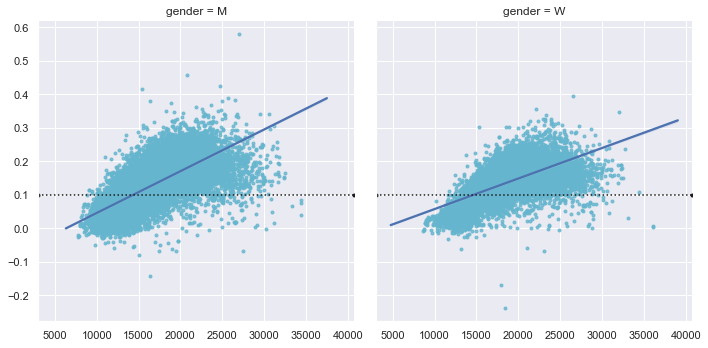

In [15]:
# 13. Bây giờ chúng ta sẽ xem tương quan giữa 'final_sec' và 'split_frac', 'gender' của các vận động viên 
# bằng cách sử dụng regplot
# Bạn nhận xét gì qua biểu đồ vừa tạo

g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")

Có thể thấy negative-split là những VĐV ưu tú hoàn thành trong vòng ~ 15.000 giây, hoặc khoảng 4 giờ và VĐV Nam chiếm ưu thế hơn. 

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsQAAAFeCAYAAACCQAk7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzs3XmUXPV16PvvqVNj19izepBaUmsCLDMbjGVhm0WEQuww
yIH7Yq9gO8srw2IltoMdHLC9DMG5z8+yr/VunmMTR8Ek5oKNsB3wBDjIIMQgAZoQktDQ6nmoruqa
T53h/VGDqnpSt7pb3a3an7VYdHdVnfPratWvdu2zf/unWJZlIYQQQgghRIWyzfcAhBBCCCGEmE8S
EAshhBBCiIomAbEQQgghhKhoEhALIYQQQoiKJgGxEEIIIYSoaBIQCyGEEEKIiiYBsbigvfrqq3zy
k5+c03Ps2LGDdevW8cwzz5T9fPv27axbt47u7u45Pb8QQpxvcz236rrOFVdcwcjISPFnt99+O5/5
zGeK3584cYKPfOQjczYGUVkkIBYXPEVR5vwcTU1N/OpXvyr72bPPPkswGJzzcwshxHyYy7nVbrdz
5ZVX8sYbbwAQDoexLIsTJ06QyWQAeP3119mwYcOcjUFUFvt8D0CIgm9961v85je/obq6mvr6em64
4QZuueUWnnrqKR555BEsy+KSSy7hK1/5Ck6nkw0bNnDTTTexZ88e7HY73/nOd2hpaeHFF1/kn/7p
n3C5XKxYsaJ4/I6ODr72ta8RiUTweDzcf//9rFu3jnvvvZfh4WFOnz7NPffcw4c+9CEATNPktttu
GzPpf/vb32b58uVlP7vqqqvYs2cP6XQat9tNd3c3Xq8Xn88310+bEEJMarHOrddccw179+7l+uuv
Z9euXVx33XX09PTw6quv8sEPfpA9e/YUjynETEmGWCwIv/vd73jjjTd45pln+P73v8+hQ4cAOHbs
GE888QSPPfYYO3bsoKamhh/+8IcADA4Oct1117Fjxw6uuuoqHn30UTRN4+///u/Ztm0bP/3pT3G7
3cVzfOlLX+KLX/wiTz75JF//+tf527/92+Jt1dXVPP3002WTq81m46mnnmLHjh1l/40OhiGXzdiw
YQMvvPACAL/85S/ZvHnzHDxTQggxdYt5bn3/+9/P3r17AXjxxRfZsGEDH/jAB3jxxRcB2Lt3L9dd
d91cPG2iAkmGWCwIL730Eps3b0ZVVQKBADfeeCMAr7zyCqdOneKOO+7Asix0XeeSSy4pPq5wuWz1
6tW8/vrrHDlyhMbGxmL24pZbbuG73/0uyWSS/fv3c++991LYrTydThONRgG49NJLx4ypNItReIyi
KONmiAE2b97M448/zqZNm3j22Wf5wQ9+wHe/+93Ze5KEEGKaFvPcevHFF9PR0UE2m2XPnj088MAD
rFixgh/96Ef09fURCoUIBAKz/6SJiiQBsVgQVFXFNM3i94VJ0jAMNm/ezD/8wz8AkEqlMAwDyE2g
Tqez+LVlWSiKUnYcuz33T9w0TdxuNzt27Cje1tfXV6zxLc12FBSyGFN1zTXXcN9993H06FFqamqk
XEIIMe8W89yqKAqXXnopP/vZz1ixYgUOh4PGxkYMw2Dnzp2SHRazSkomxIJw3XXX8Zvf/IZsNks8
Hue///u/AXjf+97Hs88+W1xQ8dWvfpXt27cDZyb2UmvXriUcDvPOO+8A8F//9V8A+Hw+2tra+PnP
fw7ksiaf+MQnZvV3sNlsfOADH+D+++/n5ptvntVjCyHEuVjsc+s111zD9u3b+cAHPlD2s0ceeaTs
Z0LMlGSIxYJw/fXX88Ybb3DbbbcRDAZpaGjA7Xazbt06/vqv/5o/+7M/w7IsLrroIj772c8C469w
ttvtfOtb3+Kee+7BbreXXQL85je/yVe/+lUefvhhnE4n3/nOd2b999i8eTO/+MUviq2AzkeHCyGE
mMhin1uvvfZaHnzwwbJuEhs2bOCnP/0pl19++aydRwjFGu+j4DTt3LmThx56CMuyuP3224svqoJ4
PM7f/d3f0dPTg2mafOpTn+K2226b6WnFBeTNN9/k5MmT3HLLLei6zh133ME3vvEN1qxZM99DE0KI
RUvmViGmZsYBsWmabNq0ie3bt9PQ0MCWLVvYunUr7e3txfv8y7/8C/F4nC984QuEw2E2b97MSy+9
VKxBEiIajfKFL3yBgYEBLMvitttu46677prvYQkhxKImc6sQUzPjiHTfvn20tbXR0tICwM0338xz
zz1XFhArikIikQAgkUgQCoUkGBZlgsEgDz/88HwPQwghLigytwoxNTNeVNfX10dTU1Px+8bGRvr7
+8vu86d/+qccO3aMDRs28Md//Md8+ctfnulphRBCCCGEmBXnpcvEiy++yMUXX8yLL77IU089xde/
/vVixlgIIYQQQoj5NOOAuLGxke7u7uL3fX19NDQ0lN3nySefLDYDX7ZsGa2trRw/fvysx56F9X5C
CCHGIfOrEEKcMeNC3vXr19PR0UFXVxf19fU8/fTTbN26tew+zc3NvPzyy1x55ZUMDg5y8uRJli5d
etZjK4rCwEBspkM8L+rr/TLWOSBjnTuLabyLbayLgcyvc0PGOncW03hlrHNjLufXGQfEqqpy//33
8+lPfxrLstiyZQvt7e089thjKIrCHXfcwV/+5V9y77338tGPfhSAe+65h1AoNOPBCyGEEEIIMVOz
0uph48aNbNy4sexnd955Z/HrhoYG/vVf/3U2TiWEEEIIIcSskq2bhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJ
iIUQQgghREWTgFgIIYQQQlQ0CYiFEEIIIURFk4BYCCGEEEJUtFkJiHfu3MlNN93Epk2b+P73vz/u
fV555RVuueUW/uiP/ohPfvKTs3FaIYQQQgghZsw+0wOYpskDDzzA9u3baWhoYMuWLdxwww20t7cX
7xOLxfj617/OD3/4QxobGwmHwzM9rRBCCCGEELNixhniffv20dbWRktLCw6Hg5tvvpnnnnuu7D6/
+MUv+IM/+AMaGxsBqKmpmelphRBCCCGEmBUzDoj7+vpoamoqft/Y2Eh/f3/ZfU6ePEk0GuWTn/wk
t99+O0899dRMTyuEEEIIIcSsmHHJxFQYhsGhQ4f493//d5LJJHfeeSeXX345bW1t5+P0QgghhBBC
TGjGAXFjYyPd3d3F7/v6+mhoaBhzn+rqalwuFy6Xi6uuuorDhw9PKSCur/fPdIjnjYx1bshY585i
Gu9iGutisZieUxnr3FhMY4XFNV4Z6+Iy44B4/fr1dHR00NXVRX19PU8//TRbt24tu88NN9zAgw8+
iGEYaJrGvn37+NSnPjWl4w8MxGY6xPOivt4vY50DMta5s5jGu9jGulgspudUxjr7FtNYYXGNV8Y6
N+Zyfp1xQKyqKvfffz+f/vSnsSyLLVu20N7ezmOPPYaiKNxxxx20t7ezYcMGPvaxj2Gz2fiTP/kT
Vq1aNRvjF0IIIYQQYkZmpYZ448aNbNy4sexnd955Z9n3n/nMZ/jMZz4zG6cTQgghhBBi1shOdUIs
EJ2axrbBXjo1bb6HIoQQQlQUCYiFWCB2jIT5eXSYHSOycY0QQghxPp2XtmtCiLO7NVBT9n8hhBBC
nB8SEAuxQLQ6ndxdt2S+hyGEEEJUHCmZEEIIIYQQFU0CYiGEEEIIUdEkIBZCCCGEEBVNAmIhhBBC
CFHRJCAWQgghhBAVTQJiIYQQQghR0SQgFkIIIYQQFU0CYiGEEEIIUdEkIBZCCCGEEBVNAmIhhBBC
CFHRJCAWQgghhBAVTQJiIYQQQghR0SQgFkIIIYQQFU0CYiGEEEIIUdEkIBZCCCGEEBVNAmIhhBBC
CFHRJCAWQgghhBAVTQJiIYQQQghR0SQgFkIIIYQQFU0CYiGEEEIIUdEkIBZCCCGEEBVNAmIhhBBC
CFHRJCAWQgghhBAVTQJiIYQQQghR0SQgFkIIIYQQFU0CYiGEEEIIUdEkIBZCCCGEEBVNAmKxKHVq
GtsGe+nUtPkeihBCCCEWOQmIxaK0YyTMz6PD7BgJz/dQhBBCCLHI2ed7AEKci1sDNWX/F0IIIYQ4
VxIQi0Wp1enk7rol8z0MIYQQQlwApGRCCCGEEEJUNAmIhRBCCCFERZOAWAghhBBCVDQJiIUQQggh
REWTgFgIIYQQQlQ0CYiFmAHZIEQU9A0n+eXuU2QymfkeihBCiGmStmtCzEBhgxCAy1tq53k04nxL
prO8erifF9/q5nhPDIAbr2mmqcE1zyMTQggxHbOSId65cyc33XQTmzZt4vvf//6E99u3bx+XXHIJ
v/nNb2bjtGIWSIZzZm4N1PCxYLVsEFJBdMPkrWOD/L9P7uNvt73II796pxgMA9hscuFNCCEWmxln
iE3T5IEHHmD79u00NDSwZcsWbrjhBtrb28fc71vf+hYbNmyY6SnFLCrNcMpGF9MnG4RUBsuy6OiL
89L+HnYf6iWe0stut6sKF7VV896VIVRlngYphBDinM04IN63bx9tbW20tLQAcPPNN/Pcc8+NCYh/
9KMfsWnTJvbv3z/TU4pZJFsgCzGx4ViGVw718ft9XfQMpcbc3tbo59L2ai5pC1ATcOL3VlFXG5qH
kQohhJiJGQfEfX19NDU1Fb9vbGwcE/T29fXx7LPP8qMf/Yh77713pqcUs0gynEKUy2QN3jg6wItv
dfN2RwTLKr+92u/islW1rF8eoKXOg9fjpqrKMz+DFUIIMSvOy6K6hx56iHvuuaf4vTX6HUYIIeaR
aVkcPR3hpf09vHa4n0zWLLvd5VBZv7KG964IsKrFT5Xbid/nRVGkPkIIIS4EMw6IGxsb6e7uLn7f
19dHQ0ND2X0OHDjA5z73OSzLYnh4mJ07d2K327nhhhvOevz6ev9Mh3jeyFjnhox17iym8c7FWLsH
4jz/+mmee72DwUi67DZFgYtX1HLVujquWF1DdcBNMOC7oBbNVfrff67IWOfOVMfbkU7zWH8/dzY0
sMztnuNRjW8xPbeLaaxzZcYB8fr16+no6KCrq4v6+nqefvpptm7dWnaf5557rvj1vffey4c//OEp
BcMAAwOxs99pAaiv98tY54CMde4spvHO5lgT6Syvvd3Pi/u6y7pDFCypqeLS9houXRmgIeTB76vC
4XCgZ2FoKDGlsS4Wlfj3n2sy1rkznfE+PNjLz6PDxBOZeSkLXEzP7WIb61yZcUCsqir3338/n/70
p7Esiy1bttDe3s5jjz2GoijccccdszFOIRalTk1jx0iYWwM1tDqd8z2ciqUbJgdOhHlpfw9vHh3E
MMvLtnweB+9tr+HSFQGWL/Hj87rxzFNWSQgxc7JgXEzXrNQQb9y4kY0bN5b97M477xz3vt/4xjdm
45RCLApna2snAfPcKbZKO9DD7oMTt0pbvzzAxctD+Kuc+H2+eRqtEGI2yYJxMV2yU52YkARrU9ep
afxbRwc3qt6y5+psWQrpAz37hmMZdh/s5aX9PXQPJcfc3tbo570rg1zaHqI24MHv815QdcFCCCGm
TwJiMSEJ1qZux0iYZxJR4t5g2XN1tiyFXNabHRnNYO/RAXbt7+HQqeFxW6VdurKay1eFaKnzEvB7
sdtl+hNCCJEj7whiQnMZrF1o2edbAzX4vC5uVL3Tepxc1jt3pmVxpCPCrgO9vHa4b9JWaWuWBgj4
qnC7XPM0WiGEEAuZBMRiQnMZrC307PN0A/ZWp5Mv1tcumpW6i1lfOMmuA728dKCH8Eim7DabAqta
Q7x3RYBL26sJ+tz4vNP7kCKEEKLySEAs5sX5KBWYSRZ6oQfslSaW1PjdG13s2t/Du90jY25vqq1i
/YoQV6yuprG6ioDfJ5tmCCGEmDIJiMW8OB+lAjMJaqW2d/7phsn+40PsOtDLW8cG0Y1xWqXl64JX
NPkJ+n2oqjpPoxVCCLGYSUAsLlgTBbVTyRxLbe/8sCyLU30xdu3vZfeh8VulrVsW4rL2EJcsDxHy
V+GSumAh5tWFtiZEVCYJiMUFa6KgdrbLIQpvBn/ud+CZ8dEq09lapbW3Brl4qY8r19RSG6jC662a
h1EKIcYjJWbiQiABsZhzZ8senO/sQiFjfK3Hx7bB3nM6b+mYC28Gvn4Xn/JUz8WQL0gZzWDvkQF2
Hejh0MlhRnVKo8bvYv3KEFevqeHSi5rQMpbUBQuxAEmJ2eyTrPv5JwGxmHNnyx5MJbswm5NDIXO8
Lb/X/WTnnUjpmAtvAnc2NEAsO6OxXehMy+Kdjgi7DvTw+uEBMlmj7HaXQ+U9+cVxa1oDhAJ+VFUl
FPRLBw8hFigpMZt9knU//yQgFnPubNmDqWQX5mJyuDVQQ9TQieoGnZpWPM9Ugu7SMRfeDOrdbt4Y
Skw7cJ/rTMBUjj/XY+gNJ9l1oIddB3rHb5XWEuSy9hCXtldTG/LhlIyIEKKCSdb9/JOAWMy5s2UP
ppJdmKvJYU8ywdFMGhSLoGqfctB9tvrkqKETVO1nDTA7NY17ek7Rnc1O6bznYiofJubiA0c8leW1
t/vYdaB33FZpS2qqeO/KIO9bW8uSWj9VVVKBLcSFTMoApk6y7uefBMRiQetIp3k4X+c725PD9uF+
3kwlQQEsZUzGuDBhT2cSLwTsUd2YUoC5YyRMd1aj2eGcUU3zVMY02YeJ2frAMZVWaetXhLh6bQ0r
m4P4fV6pCxaiQkgZgJiurG7ybleUfe8O8PapYb766Supr5ubtToSEIsF7bH+/nOeQM8ayFoKXpuN
1S43d9XU0+p0FrPEQbtaPN90JvFWp5NbAzVsH+7nem/grAFmaSA6V28WU8k0zCQbUd4qrY94qryO
OtcqLcgVq2p4b3s1oYAfm812TucSQiwupfPweB+8JWssSlmWRddAggMnhtj37iDvdsfI6mbx9kzJ
17NNAmKxIBQmxWs9Pnan4sXJ8c6GBuKJzDllLs8WYN5VU0/QrpZNxONN2FPJnnZqGv/W0cGNqpcd
I2FeiMf4WLD6rBN8aSC62GrGhmMZXj7Yy64DvXQPJsbc3tbo47L2EFeuqaWxNoDD4ZiHUQoh5tPZ
ysgkayyGYxkOnQyz790BDp+KEBvVf77A45rbjZckIBbz4rVEnK2DPXy+romrvb7ipLgrEWNQz70Y
7q5bwjK3+5wnyWs9PnYlYqx0uMYtRRgvK3qumdIdI2GeSUSJe4PnHNguhpqxqbRKe+/KEO9bV0db
UxCP2z0v4xRCzK5zbZ9ZmAc7MxpPRPqJGjr3NbYWby/M09d6fHP/S4gFIaMZvHN6mP3Hhzh4fIje
4fS491NtCm1L/KxqCdLW6KGlxo3bMXdBsQTEYlpm6/LW1sEediXiQA/fdLQRNXSu9wbY5A8WM8Qz
Pe/uVJxBXefhcD/HtQxRQ+eu6obicWDirhKlGeutgz3FRW+F0obxJn2f18WNqndRBLbTUdYq7Z0B
Mlp5qzS3U+WStiBXr6vlorZq/D55YxPiQnOu7TML8+GDvV25H1jlawYK8/TuVJyrvTJ3XIhM0+Jk
b4yDJ4bY/+4gJ3rjGObodErOkpoqVrUEWdFYxbIGD74qB26nireqCrvdTl2tf87GKQGxmJbZurz1
+bomIJchLi0xuNrrK06KnZrG1uPHSSZyLdFeSIxMuXsDlGQmtAzHtQxYStn4gbLfpTTo3j7cz2PD
QzxiG8ChKLQ5XZPW+bY6nXyxvnZavXIXeu1cz1CClw/28vKBXobGaZXW3hLgyjU1XLGqlpqQ1AUL
cSEqTQ7AubfPLC1RK3Wtx8fzsSidWmZM+8vSrxfiHCkm1h9JcehEmP3vDnL4dIRUxhj3foEqB6ta
g6xo8rO8wU1twIXToeL1uHG5XOd1zBIQi3PqojDTOtervT5+7F0NQJOjvH63YMdImB8ND2CaFh8P
1XC9z8+eZIKwkXthTXWhWK5jhGvcuuCoodOZ0YrZixcS+fZglkLKMjEMi8uqvHyzqa24YG42fv/C
7zedDxfnI4COp7K8mm+VdnzcVmkerlhVzdVr62hpDGG3yxQixIVsqvPUubbX3J2KczyftGh15gKg
iZIWpV2HJEBeWOKpLIdPDXPg+BAHTobH9JsvcNptrGgO0N7kZ3mjh+ZaDy6nisftosozv6035d1M
TLuLwmyVA5TWEReOOXpFctalkkxo3FVdz46RMGFDp0a1j2mNdrYxl5Y6lJ7rYDrF/lQSVVH4eKiG
jwWrzwS7igWWUuxAMVu//1QzLqPN1eIT3TDZ/+4QL+VbpY2+lKW6VNavDPHhSxpYvbQG93n+1C6E
mD+zkQSY7MN8od1lTDeJ6gab/MEx5yt8PZOuQ1Mdj5iaQju0gydzWeDT/Ykxa0oAFAVa6320NwdY
3uhh+RIvVS47bpcDb1XVgmq7KQFxhevUtGL97q2BmlmZKEYfY6Jjbh3s4cV4jFNahsfb1tDqdJat
SAbwVrmKAWlpj98XEiPF1mhTGfP24X6eiITLFnQUegCvdrm50uPjrur6svHeVd0wpeegcP8/9zuY
yufbcw1sZzM7bVkWRzqGeeb3x3nl7YlbpUWa7bwUzPLe5kbWX0B10ULMtfMddE3UqedcjlH62LMl
Aabye04257U6ndzX2Mq2wd4xLS9H338mXYemOh4xvkI7tIMnwxw4PsTRzijaBC3QagNu2ltyAfCq
Zh9BrwuX047PW7WgS+skIK5wo1uEbRvs5SeRIXYlYsUygXM5Zulks2MkPO4xP1/XxCktQ9ayuKfn
FN9saitmCwo7yDlGbNirDe6uW1KcmF9LxDmYSXKtxzdmp7dC/e/ozG5xIUfJgo7R2y8XbA8P8Fhk
kOdjUba1rCj+ThNN+IXfN9ut4sgYZ30jms8uFOGRdLFVWs9Qcsztnlon719Txx+8Zwn1NUG6slnq
S+r5hBBTc76Drok69UyktFVkYb46lzFP5TGj57zxguipzIsz6To02XjOplIzyoV2aIdOhjl4IsxI
Mjvu/TwuO+0tAVYs8bKqyUtjjQeXIxcAq+rctkqbTRIQV7jRE8OtgRp2JWJ0Z7PsGAmf0+Qz+pjX
enw8Eh7gzVSS7eEB7lvSAuTqiB9vW8M9Pac4pWWKQXFQtRM2dFa73Gysq+FWV7Ds+IVVyb+ORziY
TnEsk8ahKFzrybVveyISRjNNnokN87+al3O11zfugo7SGuOytmyKRcoyOaql2T7cz8F0qmxr5dGT
Y+GYQ7rOjqEBorpR/B1HGy97Pm4AP4XHTlVa0/Ot0np5e4JWaZetquZUk8Lv3AbrakI01IbKniMh
xPSc777ipfPteJ16RittFTlRL/SJ5pzSbHTpFcaJjJ5HJupNPJ25ZiZB6nTPVSkZ5UI7tIMnhjlw
YpCeodS49yu0Q1u5xMfKpiraGn14XCpVHg/ORfyBQQLiCjM6KzB6Ymh1OvlmU1vZKt/pGl2zuzsV
J2WaaJaZq8sddd9vNrUVs7yFx0QNHSyFv2huxhMr/1RaWjrRndVwKAoOxcbuVJyVDhdORcGyKXRm
NR7q7+Ij/mBZ7fDo56MQkBcy2HdVNwAQ0032JBP06dlil4nxMtKFMT+eieYOqozfTgbGz54/EQkD
jLlUeLbHTsa0LN45NcyuA725VmnZsa3SrlxXx6XLg6xvr8flctGpaQQkGyzErDjfHyZLzzeV9mWl
rSLHOwZMPOeMzkYXrjBOFqSWrhkpvRI4epH0VAPdyebD2c7oLrZNk6aq0A7t+be6efVAD+92jUza
Dm1ls5/2JVW0t/jxeRzz0gliLklAXGHGywqMNpOJvDARFep84cyiiR4ty654jC8Zp7i7rqmsRq00
CG91OsFSeCwyyGuHkqyzufCr6pgM6iZ/EBSLWL6OqTOj8Uh4gN6sRp3dwXtcHjKWyY+HB9mViPH5
uiZ+HY8U7+9XVWKmzv5UEo/NVpalLtS07U7FaHO6iu3hOrUM+1NJVrvcY9qw/eWKpcWSiYmem9HZ
lNLg/2yTbeljSid8OFPSocay7DrQy8sHe8es8rUpsKrFz9Vra7lqbSOr2peUtYmTbLAQlWOyVpGF
+WWlw0Wd3T5m04yJstGTBakP9XfxajJB2jTZsWJt8Upgs8NZNvdtDw/wRHRozJW20mQOMGlmerxx
nM+M8kLWP5zk4MlhDp4I8/ap8MTt0LxO2psDrGj0sHZpgJqAC4/LhcfjXlAL4WaTBMQVZryswEyV
9e/NT2YbqvxlE2lQtbNHT/BmOsU7WrrYBm3CRSCKRdw0eHVkhDcUBUf+BbjJH+Rvuk8CuQnxYDrF
KS0X+I0YBoZl4bHZSJgGA8aZx3VnszzU38W+dBLdtDAUCKkqy+xOUpbJ9Z4AYVMvKxUJKir9epbP
VDewOxXn59FhfDYbqqJwZZV3TBu2s9W3jbelc2FByVSUTsqFBSgAelpn58Fe3uk8TnJg7I4/S2rc
XLmmlmsvaqC5IXTBTmZCiNlRCCjr7PZxN82YKBtdGigXytAgt6h5xDBwKgprnJ6y+44JUAtX2EZd
aStN5gD8Nhal2TF+YDte6Ufplb0LJbidikI7tMJiuNE95QucDhsrmgKsWFLFmhY/LXVVuF0OfF5v
xbxnSEC8iJ3LJ95CVuCNrqFxtzM+l/OW1oPtSSUwLItuXSNumuxOxemMZvhJNMxGr59rqryEVJXn
Y1EOp1MRM1eSAAAgAElEQVS8EB/hEdsAVbZc4X1horqruoH/DA+StAwcloVTsbEnFWdPKk6HlsGv
qrybzrA7ESOk2vHYbCxzOHHZbIRsdn6biIJhcInbU5yA96cTOFHwqjaGDR0HCitcLo6kU/x8JMyV
bh81qspKh4sH+zp5JDxI1DT4XriPx9vWALDS4eLRyCCbfKFpPWcwu5fdPuoNETk5QvqNPo4cD1Nt
WpQukfN57FzWXs37L6lnbVvDgl7ZK4Q4f0rn7/oJbiskMqZaj1x6zLvrlvBgX2exq09QtfNEJIxh
WVzr9XF3/ZKy84x+D7uruqFYV1xqdDJnsrUu45V+dGe1MdnomVioC+1K26EdPBHmVG9s0nZoK5u8
XL62jnqfHa/Hic/rrdj3CwmIF7GZFPrP5mNLa3oLi+HWOD341dwitru7TpAyTQ6kU/xzywr+qusE
XVmNRrsjt/mFadHqcNKZ0fjUqWO8mU6y1uUmauYu5eiAQ1E4mE6x1OGg3u4gbZm8noqTtCx8lsUf
+quJGQZPx4ZxKAp+xcY6t4crPT5+G4+QtXJTwjq3h4xpEjUMIqaBz6aSUSBjwa50HK+icF/vaSKG
gYpFjapyR7CWe3pO8fm6pjHbjJY+F5e31AITT5TjXXabyqRauM8t/mr0cIZd+3vHbZWmqgoXLwty
zUV1XLF2CW7XwpmkhRALw3hz1ni3lWaAOzWNB/s6yxb/li4Ijpk6T49EznTmsRQMy2JPMsGXG1qI
hvSyxxaucD0fi3JcyxTLI0rrjAvzYekc+cVly4olHoUyu9Js9ERz6ITZ6BLTDXAXykK7Qju0QyfD
HDw5zDsdw5O2Q1vZ5KO9ycuapQGq/S68VVU0NVVPa5fVC5UExIvYTDKOE9WjTrSS+NfxCFgKm/zB
MbVbo9uhLXM42ZtK8LFgNW+lEpzUMtTZ7TgUha2DPcQNAwsY1rMsdbm4rsqP32bniegQ/XoWA+jS
zwR7BjBo6JjAu5pFu8vFSS1DSLUzYOiM5ANnv6qSMA1MCy7JB8OXe6r4aXSIQT2byyQrCt3ZLDV2
O1nLwm+z02J3cDyr4QJMC/r0LA5F4SKXh/VuL49GBunLj+fzdU3sSsRY6XCxbbB33M01Rk+UhTeO
mG6OqYUutKR7PhbN9UIep9PE/+np46UDvbx9+hjpiDbmb+mpdXJ6iY0PvqeJz61YMe1/C0KIhW86
HWkmM9n7xkRdJqK6wRPR3OJfFItgfnOkws9a7A6GDZ03Ukm2D/dzV00DBzNJurNZdqfi3NfYWvZ+
0qll8NlsNDscHNcyxEydbYO9PB+LsjeVJG3mFkNf6/GxdbCnWOpQW+st26nu1kDNlEohplIDPN0A
dz4X2pW1Qzs5zEhi7PsCQJXLzsomPyubqli3LEhjtQdv1eLuBDGXJCBexGZS6D9RPWrp8bYN9PKT
kSHWOj106bkX3J5UnMPpFG6bjZiply2O+3UsypvJBIdtKa7z+ojqBl8Ld9KlZwkoCu1ON5t9IdKm
yVvpJHHT5N1MBsOCv6hppMXuwAH06lkUwAIanU5SugEKxAwDzTLpyGRIWCbD6NiBtGVxIJ2gzenC
b1OJGAansxqPRQb5XcJBt57FAvoMnYihYykKH6kKss7j4VqPj/+KhVGAKz25WqnD6RTNDgensxpv
pZO48mUWnwjV8et4hP2pJF/LdOJQlHH7NRcWyhV20yt0kojnM9KF9m+FN4ddiRhvphK8mUrwu3gE
l2LjPXY3G4cdvP32AG+fGiYElFYHZz0KS5b7+aurVmCv8/FUbPiCWwEthDhjKh1pzpbcONscMVGX
iet9fj4eqsn1cbcY87OYqfN2Jk1u4lbGLJQureHdlYhxKJ3CyF+1+3gwl6X+eXSYNS4XfbqDZoez
2MWiUOpwrcfHXxw5wtF4ojjv7hgJcyyTJm4arHTMrNvBdAPc87nQLq3pvNMR4eDJMIdOhOkep4c8
5NuhNfpY0eRl7dIAyxt9eKvceNzu8zLOxU4C4kVqNuuXJpoI9qcTxE2T09kMG70BunWNZoeD11IJ
hnWDxyND7E8lcdlsfLmhhZipM2waYBrsSsTJWjGqVZUqRSFmWexNJYBcBlY3c5d07Cic1DL8PwPd
hE0Dy7LIAiq5zHCnpmFHwZtfWJe1LEYsEwsYMQ3sioJlWexNJXk7kyZqGGhY9Bs6KrmFd6X1Uxrg
suBwJoXPpvJQrItTmoYFHE6nuMhTxceC1RzJpDmQSWMBHkVBReGNdIKYbhI2dDCg0e4oaxW39fhx
+kZS+e4VBr+K5dqw3VVTX9yatFBGUlp3fYnbQ1TXeTudor8rTtNpjb6eLE+OWvyrOBQCrVW8f109
PUtc3F59Jkt0t6tyFokIUYmm0pFmoixnaeeGoF0t3md0xrVUoSvOFW7vmFKJwof60rIGv6oWryIW
ShgKc12hRWazw1ns9lNouVY4VtCuEtUNjtgyNDkcrHN7ijXM13p8PNTfxYF0koxloVtWcd798fAg
CdPk0cggNwerz/n5PV8B7lTeu03T4kTvCIdO5DLA73ZFJ2mH5mHFEh9rWv2sbg0Q9LqpqvJUzEK4
2SQB8SI10/ql0S/K8VrTrPdUsS+TQgfCpk7cNGlyOPnTUC2vJ+P0ZrPsTec+qT7U38WVHh8uFLJY
GJZFIh/0OhWFpGWRsixOZDIMGlkKF3g8NoW4aRExdEorYguxoAVksYhYVjFr7CIX2DbbnYBFn6Fz
g9fP6+kky1xOjmUymORqj/VRv7ctf7wDmRTHtDR+m4oHhQQWGrA3lcRts/HnNQ2c1DLU2O0ss7vY
mRwhZhj4VTsKCgYWTXYH1/n87E3E2TbQi82mkDFMwCKk2nMZkPxK6aBq567qsbsyRXWDl3qGuKjb
oOXdOEayfMSWAu4GF7Urfdjb/LxkZFgZrOJv5qFmbaEuIhGiEkzUkaa0lOJyT1VZd5/CazaW7/WL
YpUlQB7r7y/uIlpYI1G4vZDRbXY4GEzrxaz06D7zhX729zW28loizl91nSBqGMUysBcSI1zv87Ml
VFu8f6EueXTW+nJPFXtScWKGwV3VDcX7bhvs5WgmTbyQSFFyHwp6shoeRaFWtfOJUN24z81Cm7PG
e++2LIv+SIpDJ4c5dCLM26eGSWZGv3vl+KscrGzysbrFz7qlQepCngW/JfJiIQHxIjXT+qWzNVzP
/byp+Kn/ck8Vj0YG8SsqP42FMbCIWSYmuatkzQ4Hd9XUEzN1no/n+g+35lviZEyDSL41WrdRvhAs
ZZpkgcISADcw/t44uWBYyd/XCQwaWZKWhQ14JhYpPm6iacEF1NrtdOe3NU1bFh/x+PiwL8C2oV7a
nS5GDINlDidvpJIEVJUGu4MGuwOPYuNIJl3MhBe+3p2K89vECJplUa2oXORy83YmTdoyuczj5a7q
hnFrip/o72dZl07/oX6a+uJERo21qcbDmlUh+pY5+b+WLS1mZuzD/cVSjIkuic7VxL9QFpEIIc4o
LaU4mEmOu+j3Ck8VF7s9bPKFyhIgH3Ta+UFnF6e0DF/tPc07WppOLUOr0zUmo1uYd95KJfhc90ks
izHb2z8fi9KZzaU7DmdyM3IhwzzeIuNCYN2Z0fhVPMJKp4uD6RS7k3Hipsn/bs0du5AdH7ZZHI8n
+XJDrj/x33Sf5KSWwWOzcTybKVuUN3rR83i7jM6Hwnv2Joef1w/3c+BErhZ4MDq2ZSbk2qEtb/Sx
qtnHumVBljZ48Xm9i2pL5MVCAuJFaqaXd8YLqEs3jljpcHF31wnWuNzcnd+UYlDX+V64j6F8tqHO
puLEwrBMno4O8/tEjCvdPuJGrpSh09QYMU3S1vgrXuFMXaxBLtidKBguVQyp8zVo5qjHlZ7NTi6b
kLYsMkCPfuZTtwW8lBwhYuqkTJO3UkkMLI5paVY53diBXfEY/S6N1S43fXqWrYM9ZTXDTQ4ne5Nx
XkrE+aeVK7kadzFbs8kfLNveNJLR+T/7OnhmXxe2rhT7R10B83nsXLGqhuvWN7Jm2ZmGSKVbSwdV
Oz+PDo+pIZxKsDrTN4MLdbcmIRaqqbxmS0spNvmDxSxvp6YVF6/1Z3VeTcbZPtxf1vP999Fo8TgZ
LNKmxf5U7qqfnVzJ2dvpFM+M5D+yKxaPhAeJ5DO1B9Mp7uk5xSWuKn4bj+BVbFzurmKFy0V3NkvY
MOjQMwym9eJivNLfpTBv+fLZzTVOD/tTSQzglyPDPNjrLJZq3NfYSn29v9gNYdtgLwAtDicf8QWK
C+x2JeJADz/2rh4zZ83lh/qz/a2yusmxriiHToYZPhHmf07SDq2lzkt7k5e1y4KsafET8Puw2yVc
m2vyDFeI0hW+B1LD3Kh6x0wIhY0jrvf5+cf+Lk5oGV5LxtmfSrLe7eV6bwC/zcb/PdCNDiiKQrWq
cjqrYQJJXefpeHmuUwWCio1oPps8mYk3PM6xwVmPMZoO6NaZI1vkstAuRcFQFHQLdifjuXGqdiKG
gQm8lU4RVG2ksTiSSVNndwBwSsuU9b1sdTppd7nZm0pyIpPhVn+geFlz22AvP4+ESfSnGDkWoe9Y
hBOaRenneruqcMnyENdeVM9VFzXTY+jsGAlTVZIBLp3EJwpKC4vzRu8oVarQ0aKwIGV0D9LRRk/w
F9JuTULMl4l2mRwviJpKAFcIFkvn+O3D/exJJjicTqFh4UIhbpr8Ph7jSCaTC6AB3akSstk5oaXx
OBy8r8pLs8PB45EwKcvEBhzLdBEzDfw2NVd6kZ9PC6M9lkmTNk1qVDthw2BLKNeL+OnoMP/Y38Vm
X4ioZdCZ0XhsuK8sq1xIwBSuQG4J1dBvaDwdi5K2LB6LDpYF0qVz1nit1D5f1wT08IlQXTGJUPq8
jbdxyHSSA5MFvaP/VpZlcbo/nu8EEebI6QhadqJ2aC5WNvlY2+pn7bIgdSHfBbUl8mIhAXEFGL3C
N4JZtnXz6Gbsh9NJurRMvh4YDuR3l9sSrOFgRisubhs2dCzUSYNUBYjng+HpBLSFeuFSox9rz98v
y/Ro5MolXPm6ZCP/30h+IZ4d0LBIGiYOckF1r57FrSisc/vH7ML0u/gIQ4bOkWSSbZncz4+EY+x8
/TRNp5IcieUy6qWBcDak8sGL6omv9HF7Y+7v8M/5cojClteFS3ylbe4mCkpH90cuVagx7NGyJE2z
GNSP7kE6mpRICDH7Sl9XwKSvsUL2tzOj8aWuDoAxrRtLW6O9kBhhVyLG/lSSmKHjsNlwKjbAwgIM
LK73BsCCJ6JD2GwKTTY7I6ZBImNyZZUdn03FtEwUoFa1E1JV4ppB2jTZn0pyoz/ECS1NBotuLVce
ETYMrq3yciSTK7no1DQejQzSlV90/BF/EBSLhGnwZr41W1C1F3fufCOd4FA6xU+iQ0QMgyol18fY
Qa6TT8Qw2JWI8cNaL0Oj3q96smeC1Ku9Pn7sXT1h56TC/DnR7QUTBb6TzYm3BmrIJrIsP53l+y8f
5HBHhEhs/F3hqlx2VjR5Wd0a4OJlQZrr/VR5POP/gxHnjQTEF5jxXsilu/R8vq6J35spOkdSPNjb
xV019WM32jjxDjoKNapK3DRQgRHT5MlIGLuisMSea0lmAUnzTJhaqN0tDVxLlwVMJ7t7tmxx4XjT
zRiXjmP0VDX6ewMLt81G3DTxKTY2BYI02V38JDrEr2JRoroBisXhdAoDeCsyQk+nxtGuk8S6k/hH
Ha824GRtezXPNhr0+Oz8zuFgUEvgGMnV/xVaGV3v89OZ0XiwtwuAFxLl2z3D2L/zZH2lS9u+eRQb
qzxVUyp7mKgn6UJaoCLEYjPeVZ7JXo8H0yn2p5IkTIMsuS3nS0umSuuEfTYbNarKMoeLt00TmwXV
dpW1Lje/jY+QtXJ1xpt9IZyKwkVeL/tjcWz5xdCHM2murPJyRZWPo5k0Sx1OOvKbKEUMg46shstm
44SWIWtZ2BQI2Gy4FIXXUwnezaR5M50EK/f+UaOqDOk6/zzQywqni5VON8ezGXrydcaFD/rbBnsY
MXSeGYmQMU38NjVf6mbSoWkEVJXubJb/r7ub18IRurPZ4qYezzujxcV2hefkbOVdZ7uiNlHgO/q4
Ze3QTg7TPZjgwDjHs9kUXDVOLmsNsmJpgDd9On+ypIWl55AFlnl47khAvMDNxu45oy8tHUhl+fd8
aUPQrpZNDp1arrVag92O36aiWxbh/MYXUcvEq9jwcSYrW6PYSFq5203Am+/YcD6cSzBsZ2znidGc
KJhY2G022hwuTmYz3B6opdWV643pAOKmQczU8aHSPGjQeFqjqTeGoZvEyWWuAXQ7dNfb8LR7+dcP
XIWiKNxUkuEoXdVdqAME+FX+7/PxUA0fC1aPmdhH/51LM8cP9nYVWyzdt6SlmGUab2OQiUz0wUoy
xkLMzOirPJO9lrYN9rA7EWOl04VLcXFCS7Pa6R4TTHdqGZ6PjxA3DY5m0qx2ufmTYC1HtBQntQy/
j4+wwunEqdjYn0pyIJWkz9DpHM6VuxWutnkVhZ9Fh7m7dglRy2BvMs6+TIobvQHa3W5iusnLyViu
RSbgtuBAJo1LUVDy6zScFvwmHiGs62hYdJPFjsKJbAa3YsM0LXYl4gRUO1tC+fnFyl2NjJq5krVU
vuvQaqeLTf7qYm20Tq5sDSCkOombBiGbittmm7RcbLTJrqjBxAFzs93BH2oe3niti0fP0g6tua6K
FY1e1i4N8rJf49dmhnXVtbwN/DqawBUbPqd2mTIPzx0JiBe42dg9Z3RbtWFd5yZfqNgTd/twf/Fy
VUdW481kgphlEjN0NMsqC2/TpkkKs1jSMGQaZaUQ5ysYPhcKuWxG2Jw4lFYAjwJum52NvgDXeHx8
L9zHJW4PBzNJHEDMMnBEs+w71EVzV5b1ydwHgkKrOJsCVUvcHF9io6PFRa9issRu5/Vkgp9Eh4od
Kq72+oqTcaemcTCdojub5UZ/oNjw/q7q8YPXSTMg+VZvhf9P1K5pMmf7YCWEOHdT3bL9+fgIGcsi
oNrZ1rJiwi3hj2TSdGQ1HECN3U5nViOTn+eihk7cskhrGld7vAwqOla+DrgwZ2XJzX39hk7Gsvhe
uI9dq9/DDccOkrUsOrIZ/qpuCX/VdYKO/NVByCUXLHLrNNyKgt2ycNqUfDbbKh5fIVeeNqhnyQIJ
02Sd21EsPwOoQsEE3uP28EoqgQlEDIODmSSb/LkSv5Tfwav5DHHEyF3xej2V65f/E3u4OJ+ON3+V
tqfb5A8CE9cSFwLml5Mxlmk2Xjo2wO+P9ZPqTaJlRjWIzwtUOWhv9rF2aYCL26p578WthMO5BYrL
NQ33qBZz5zqPyjw8dyQgXmAmuxQ+U4UekUks/keglvuW5FrXFLKSRzJp+vQsWctCsSxS5CbK0oDX
APrNMznWQneIxcAChicJhgv3iVoWUUPnd7EoP4uGyQLfHuxByZhUnU7R2KGxOmoU71+QDahEmu1c
f1krdzbnOnMcTqV4aiTMiGHyUH8Xb6YSpCyLh/q72LFibfGxO0bCxczHJl9o3KxFqckWuN1V3VBc
hHKuzvbBSghx7qaS6NgxEsahKCx3uvjzmobiVaXC+0NPVuOh/i7WuNyEbLm38iy5HT19DpW3M2k0
y8Jvs6FYBkvtjmKryJUOF3d3Hidecj4LMC2LgGJDVeBL3adImrlNkI5k0txx6ijxUR2DbOTmfxWI
54NszTSpV1VWOd2c0NKY5NZthPMLlgFSlslmX4jdqXix3EO1KaRMk3e0NDbAQa7jwovxEU5pGR5v
W0MtDi5xe6ix2TmcSaIAQ4aOCRzRcr2GRq+7KPzsnp5T7E8lURWlWHIyXi1xPJVlda/JZUdTnOwJ
c+/I+HXATruN5Uu8rGkNcHFbkBXN1WUL4Urbok3nqsDZyDw8dyQgXmAmuxQ+laxCYUeizoxGq+tM
QF3aI1IltwVzoZft5Z4qnokN8yFvgEcjg2j5T/bjfw4ea+HmhMeazlgHTQObYdHYr9PWmaS6L1tM
vhZknJBqdnB0qZ1sXRU1NpWLqgNnVpEHoFvXOJpJs8blJmOZvJ3/upCxiOkmcdMga1k4FKV4GW/0
33ui76/1+Ph1PFK2m9RMJ0yZdIWYutLX5tm6t8DU6vNLOyJsHezhlJbhkfAAKdMkaujsSSbYlYzz
airBOqcLNxBQ7fxhIESz3cn/GuimSrGRyJc3dGY1/r7nFMucLp7ShnCrKoZpUq/a6daz6OQC16xl
MpLJ8G4mU1wXkgEy47TP1ICQzVZsw1YwZBjYUPL/5TZDUsnNvxaQsSzu6+3go8FqrnB7c63WTIs6
1c5al5t3MrlNkzq0NFkgbppsH+7n6FCWo/EEg7pOJF/KZwN8Nhsf8ga49cQ7ZCyTiGHQ5jwTnG4f
7md/Kskyh5PrSgLlWwM1RDSN3tMx/m3fCKc7opyaoB2aBcT8Ckqdg89ctJQPttfj9VZN4a8tFgsJ
iBeYyTLCkzUZL9xe2JHoiJZibzpRnDiPZtJcXeWl1eGk1uWkT8tyd9cJmu1Ofh2LELdM/vdQH6qS
2zWnkBW2OLda3UXNsghFDFo7szR3ZXFmy6dH0waDdQqnW+2MNHvQFRs2LDRdJ6uYfK2vkyqbSqeW
oSOrcWughl/GI2z0BvCrKtdVBYqLGQuL3YCyBW+FjMYpLVNskza6bVrh38PzsSj70kk8im1Mf+Kz
kQUaQkxuKq+R0rn5bN1bYOwHztFz+2uJOF/tPQ0KdGoZTmkZBnWdhGmgA++mM6xxenglGceyLHr0
LCgKIVVlfyrJT7VwLvtbEsRmgP35LekLljqdGKaFG4rZ4tJyiKkYHQwXAt8+Qy+W1tmAqz1e3tUy
JA2dRH48PxuJcLXHS0c2g6FAk8PBa6kEpgVhPVvsLx8xdGKGwfFUkn49W9wFtTBeA3g0MkhnVkMB
fDa1+LzeXbeEHi1LxDS43unmHxqb6RpI8OuTvRw8GeZUxzCmbtEzzu9W43eyqsXPRcuCfFsd5lXV
5Bqvj5tWtE3x2RGLyawExDt37uShhx7Csixuv/12PvvZz5bd/otf/IIf/OAHAHi9Xr72ta+xdu3a
8Q5V8SbLzI0Olsfbn/56n58/r23gWo+Pn0SH+GkkzJChoyoKfdksmmVxTSDAvsgIe5MJXiZ+phzC
MnEpKgZTnwwvJO6kSWuXRuvpLL7E2I8BQ0GFzmYb8eVehu2lhSJnAua4ZaLqOg5HbtX14XSaY5k0
VTYb/9if6xrR5nTRk81d1rvJFyJuGuxL5+rgPhGqo9XpZNtgL935ldjd+dZF13p8PBIeyLUtCg9w
V00uF9WZ0YoLacb7IDWd3pkTkcBZVKqpvEZmWto2+vFbB3vYk05iAac1DbuikMp3mQA4kEnytVAr
P40OkrAshg0DAziSL7sqtI8cbx638rcFbCoZy6JPn27jysn5UIjm58TCzGiSa9+ZsMyyK4+6ZfFq
Mo7fprLe5WFPKkGGXO/6kN3BKT2LQq5v/OvJOL16lriZa+PpBhQUgqpK2jRJmyZBm0rENLCwaLQ7
irvrHRweoaE7Q99QN58LdzGS0MYde9YO8WobFy0L8tlLltHWVIOi5Ob6qkRdcRc8cWGacUBsmiYP
PPAA27dvp6GhgS1btnDDDTfQ3t5evM/SpUv5j//4D/x+Pzt37uT+++/n8ccfn+mpF43ZCiZG7yFf
uniqdEIt1JYdy6TpN3RsgFux0Wh30qVnCdntrHG5eSV5JhhWgSqbStgwKioYVnWLpp4srZ0atYPG
mHrohAc6l9joXO4h5Zv45VJ4XLViw1OoHbNyFwjdioJXUTmmpXJFceTe8AZ1nY8Fq4FcV4m0afFo
ZJCb810lCp0hAKK6wa9jUVKmSdo02JOKsymbWxiyJVRTLI+ZbnP/qb6Rj94cRIJjUSmm8ho5lxKj
0e8Lhat+X+o+RX9WI5Df0GjI0HEqSnG9hkqu3eWDfZ2MWOVXrwrb259tDtch1z3InGph3NRNtLB6
ZJySi0LrzLBp8FoqUQz4Y5ZJJj/3eVEIqXaOahnSJb9vULXzh/7c/Pl8Ikpfvle8AtRYKhcNwlsd
p3lg4AQrI2cC4JGS86s2hbZGL01NPo7WGOj1Xta6XGzyB/lFKs6t2Wxxjiv0OBYXrhkHxPv27aOt
rY2WltwCrZtvvpnnnnuuLCC+7LLLyr7u6+ub6WkXlckCkpm0VdvkC3EwnWKZ/cw2yz1Zrbi/O+QW
JthRGDENjmkpLnZ7+GhtLd+O5ILhwiUtBXDZFLLGYqoIPkeWRd2gTuvpLEt6s9hHvSdk7dDdYON0
m5NIrRMUBSe5N6Izq6bL65EtIGizETVNRnSTi1weXIoNO0q+j6ZBwrLwKgptThefCNXxcLifw/me
nfWqnUF0NvtCQK7Z/M+iw8RNk3UuN3HT5Hqfn5sDIZ6PjxS3kR7Mb0U92ZvxRG/oHen0lP/tlR5D
2v6ISjKb9fSvJeLFLOPuVJwfDw/ySHiAj/gC3F3XxPbwAP8RGcK0rNxlfyvfycGyCNpUYvks8YCh
MzBBLDufM3iLaqfHmH5KRQVqVDsxQ8cAbIqCzbLwoeCz5zLAZkkw7ABipsHr6Vw3iIvsLhjM8L6I
ylB3Em9Yp9e08DN246aMT0Gpc/I/1jYTXBrkW7EB1rjc3F3XVJwHC60rS9fiTDZHyhW0C8OMA+K+
vj6ams5cQmhsbGT//v0T3v+JJ55g48aNMz3tojKduuDpHGvHSJhBXWfbUC+nsxpvppN0ZDWyloXP
ZuMDXj/tTg+/i0c5mEkxZOh0JjQ+e/gwx9PpstpgA+jIzu6ls4XGFzNoPa3R2pXFnR5VF6zAQE2u
Lri/xYOplueKnYqNTb4AO2IRLHJZi/iot564eeZy4Aktg0tRqLHbGdSz9Od3wVvqcHKJq4o3UkmO
axn2pXNtedL5xz4WGSRqGfwyOsypfD2cS1Fw2+0ss7v43kgfen7x3SdCdRzPZs6a3Z3oDf2x/v4p
/yID1R0AACAASURBVNsrPYa0/RFifJ2axr91dHCj6h03MNo62MOuRJy02cWVVV6ylkVnVuPfhwfZ
n07SaHdgWhbVNpX1nipeSMSKC5zDc5DNnW3dhn7OAflGn5+kYfJsfISUlVuEV2Oz0avrxbpkhVyC
p1a1kRrJYp2Ksaxfwzmosz6b64xURfmHAq/HTmfQ4nQ1NCwLEKzx0Z3NcjzkYVdiiFeSCfalk7Q6
XWfmwfzV19K1OIXOPdO9CjdZsCyB9MJyXhfV7d69myeffJL//M//PJ+nnXfTqQuezrEKj3kpPkJH
VqNKsfGJUB2PRgY5lb+8tMzhJGzorHa5iOi5LOWBVGrMcS/UvLAzY9LclaW1M0soOvYNJeqD080q
3W0eNLc6zhFykpbJW5kUNnIZm9HBMJC7XGdBCou0ZWJh42P+IM/n/z42RSGgqryQGOF6n5+Ph2qK
JRGvp+Ic1zKAwiPhgeJOThbwajKBpcC+ZIJB08BvsxFQ7RzPZmaUubqzoYF4ojygnsoELR0ohBjf
jpEwzySixL3BcV8jufrTHpY5nLwQj/ERX4Ad0TBR0+RgOsUxJXdlr0pVeSuV+7A8lc2EFopzfR8x
gN/HY/SVBNQORSlmd03Ar5n4Bw1aBw1ahky0+PgJHEMFV62TqiVurCYPdUuCmEaWvdEwhl3lr0sS
Cdd6fKRNk2aHo7g9tl9V2eQPEVTtxc2Torpx1i22S/9farJyM7natrDMOCBubGyku7u7+H1fXx8N
DQ1j7nf48GG+8pWv8PDDDxMMBqd8/Pr60RvgLlznMtZ6prYqebLHfvjNN1HIBWL9TnhgdTufOHSI
fekke1KJXANz04bfZis+Nre7/YUZCNsMi4Y+ndZOjYZ+HduoXzLtLNQFu4kHHZMeywX4VBWXqnJP
2zK+1/3/s/fmUZKd5Znn77tr7JEZuVdmLSohUUISkhDCBW0kDIhisQVqJCj10HaZke2eccse6xj3
jMFtsIXbY86hT1tjutuWG4HxIFuy1U2PQQIjkMGFBBQCSqWtpFpzq8zIyNgj7vrNHzfuzYjIyKws
qZYsiOecOlmx5I2bETfe+97ne97nmeWHtd4qubqUZFSVDAGTsT0e5znPZkc8RtH3eGM6zc5EYNOT
1DT+zZYtbIvFgEC+8MDCApfF43zo2WexW9swhaAu/UCO3Pr8UqrK+8ZGuHPLFkZav9++jTdns3yr
VGLv6CjbYjG+Uyrxh8eP83vbt/PGru/eH1zRqYn77IkTfLlWIpU0+Z2R1cdl+Brhts8nLqZacLHg
YnpPN/u+nmg2cSoq7zBz3LllCw1Y9V25Kq3zDsXp+I7+imVx94svMmtZNH0f1Q9WrIq+F+mG273g
f9KgEkgkXLFyPlKAMVXHm68zvugyvOiSLa3MeLSPxEkBtbRgbCpFbkeGuSGdr1fKNH0fDQu9lOeW
oSHimsa86/CH+Vn+3dat3DH9IndPTfHm4RyPLy9zsB6oi7OqymQ2EdXGdwPfKZX48ZEGx6TDf6ws
dtRuWPs8PjKS5s60TmrBZO/oKA8sLHTU1/bHRs5zPe21rz/tEFLKV9QTeZ7HO9/5Tu6//35GRka4
/fbb+fSnP92hIZ6dnWXfvn38yZ/8SYeeeCNYXKy8kt07bxgZSZ/XfW1n8sIhui26zoQWeC9+fnmB
su8TB2qt32lnGro1sBc9Qqu0kw5bZldbpXkKzI8ITm4zyY8Z0XDbRqABQgjekcxwwrE4bDVprvFc
E4grCq8yYsy5TmCHxIpXZrDuF0xGv8qM8amJwL7n4XKBnbrJJxdmqHgelvTZapjM2nbkt3lTMs2J
FnN8x+BwB6MQ2rTNOg45VeWIbXF7NghfueP4YfbXqrwpmeKL21ca4F7H7OkY4nvz8zxUXGKLbvCp
ie3nbZnvfH+/XgkuphPLxfSebvZ9vefUNA8WC7xvdATd9jhQr1HwPG4byEUDc+F3NLwvtFcL68Sy
51J/Zafkiw5pBL4Axfeh4gcNcN4lt+Qh1phpacTBGtI4noNT4zF8U+XaeIJPjG3lF0++yFLLfjSj
KOgIYooSpeQNqhogWfI8YkKgIvClRBFwhRnnTclMR7z9tG1z18xRflCv4Ypgm9fGk1H962V/emsm
x3WTQzw1s7Sul/xGcD5kFRfD9yvEuayvr5ghVlWV3/u93+PDH/4wUkpuu+02Lr30Uh544AGEEHzw
gx/kM5/5DKVSiU984hNIKdE0jYceeuhs7P9PPHp9GdoLKwRLLfdOXsJH5o6zv7ZEpZUD77PSDMNK
M6wTfKmXTpPadjEgXveZnLaZml5tlSaRLA0oTE+qzG1L4Gkbb4Lb4RMkOD1WC7RtvZAVClldo+i6
wXNEoAtWgLRQ8FrsR1X6IMGXPk+4Lvfm55gyTL5UWqboucw4NmOazgcHRrkunuC+wgJlz+WU67Ld
MLkqngApVi3NPVwuMOvYbNENtmlmIL9o6eDCZdq17IJ6TbuvhVszOfbXKpEVXH+Zr4+fFpyuMal4
HlXf44eVCi/VG9R8j2vjySgeuOR60Xf01kyO79Wq/C8nXowueDWCC+f24d2fdMQaPgP5gAEeyrvE
rN711dZgaVCwmFNY3GLSSOkkhMCSMlrp/HGjzh0nDuP6PgawVTd5XSLBrONwqFHHB640Y+wyEzxZ
r7CMhyclQsCrTJOMqnFnbpQjTmcy3f0tq0sHiY4gpagd9a9d9gB0+FGvF7S1HtqPtfuXF3iwWKDk
uXxsbOrlvM19bBBnRUN84403rhqU27t3b/T/e+65h3vuuedsvNRPBbonkbv1R2FhTQqFxyoldupm
pBveCMPgwEXdDEdWaSdthpdWnzpqcTg5oTJ9SZxmYm1d8EYRvlNSSgw6l+s0Wmy7gI9u386nj5/g
edvicLPJuK4T84OkKMf3yaga44ZOWg38P59rNnnBanJXq1F9rlnnkYrLhGbweK3MIatO1ff5uXQg
c2hnnNpPyGFU6e54uqV/y3akFK5lF3Si2eS+1on68VqwXLiR4bowFKQ/VNfHTxNOp/dMqyopReXa
dBrFkxy2mlyfSPJEo8pDxSVyqsbNqYHIP/w3Z49RahuUu1h0wq8EqisZWnIZackg0tXe5yFfwHJW
sJATLI4ZVIYMZNuqngCSikLD86KVTpsgNloBBlUVIeCpRj2wqZM+AjhhWTxjNaMLDgnkFBVTUTjl
OnxyYQZdBNK08Hxb8TySisIVeoyrY8loH0KP41764VszOU40m6sipDeKjiZbis6ffZwz9JPqNiHC
SWSYi5bU2+2ubkqluTmd5e+KBU65Di9aTcqeS07TuT2T4wulpZ88hqHNKm1izkHtqqORVdqOGMWc
dkaSiI1ihxFDSp/nW7KFdr9Px/f57RdfJCQ4StKnZlvkVI2YUKjgU25FqE61bNe+UMzzoYHhFelL
PEXB8yL3iHCgI/zsC54bsUvtCBmEnYZJ1fc70urWWs6bMozIZeKmVJpbWt7HG0F/qK6Pn0acbgB6
3+AoWVXjzm1bWUrWojCdh0pL1H0fRzogZERqOFJiwpryq58ECF+SLXkMLwZN8OCyt2qmI0Q5Cfmc
wsKISmEsjq+JSDudIGh4XcAA3pvNkUDw+dJS8DqsSAB1At/9BcdBEYJKS4sNYLeeFfo5SwILO8uS
DGtBO7RF11edb39teCy676HiEo6UQeMcZgG0mtX2rADXKvF4tcIt2cEzljqsOtaEBBnU874bxblD
vyE+TzgTHdDdwxM0/Rm26SuZ9mFxDcMaXrCDJTmAZc/DBuZdhy+WCj9RzfD6VmmSxZzCyW0GCxPm
Kqu0V4rA4icomqZQqPoeM22pTqENkEpQtBtAu+mQBmzTDU46QRmWUlL0XL5fr7FNM3lTMs0/1co8
UilFaYN51+1wj7ghmYoY4JBdWnX8tIrx5Ua8gxkG1lzOu2t4vMNlol9k++hjfZzuQjB8fCQWY4ka
07bFhxbnKPo+KaHw2niC/dUKJxybGxJJSi0rRpMgxvgnAlKSqPsRAzycd9HXoL6bBuRzgoURjfy4
Gbn8hM2tTpBEZyOpt/2eJhRSisLnl/NRtZVAUghqUqIKQd51sIEMCrHW/QqBXrkpYG8mxyGrwaFm
g0YrPOk/bdkRERBhYwtExASsSMaO2xY5VeVAvcZhq4kqRERE3L+8wAPLS+xMJiJ2ODz/t5Mcc44d
rQTfkEx1vDftx9q0bXOo2WDWcTrIjj7OPvoN8XnCmdir3JBM8dZ0li+Vlnm4XACCRmbatvhWrcKy
54IMknqSimSxldDjSBldAV/MOJ1VWjEF01MaM9viOKbSYwtnByGXMKyqzHsuTdfv+e76wIiqMRmP
4TguJc/nhGsjhOAZq4lBsIRX9gJTfcf3OGjV+EGzFgzaAQjJ7niK/bUKu+OdxfHhcoGvVUps0Vc3
rdO2TcV32WmY3DaQiwprWIB36ibDWmAfNNF2gQWwLRbrF9c++jjLONFsctfMUZ6sV6MVpJoMVohe
spo0peQfKqULuo9nE7rtM5xfkUEkGr3PQa7S0gEPKeQnYlTTas+VvK2aznRrAK579NsABtSgGe4+
MzSlZFLTWWw1wwADmsZVZpxHqyUGVZXthknR8/hmvULedXGQCGBE03i0WgQpmHNWyKu7hse5Z36G
B4p5HquUuHfykkgyVnI9vlYtcpkZ4/p4aoWIkIKG9DnWbHJzPM2UYXBvfp4vlZbZX6tEYUr7a5Vo
JXi9BLz2+ZC+TO3cot8Qnyf0Wm7rddUYTqJO2xYpRWGnbvJUs8ZNyQwHGlVO2BYxIYgrKsuugyEU
RjSdtyczfKG1fHQxYkNWaVtUpnfEg0J6jmAQXJ3P2jZNYEBR8Fqa7PYCnBGChpS4tIYXpc90s0nZ
dZnUTTRoDeBJBjWde8a38uXKMo9WSoF1kISbkhn2pLMdsojZkDVgIirQ18UT1H2fA/Uad80c5XdH
Jzt+55HWyfWJRjVilMOhyy26Tt51eaJR5a7k+CtqgPsm8n30cXr859lZnmrUOmzSfOD5ZiOqFxcz
FE8yuOxFDXC7HVo7fKCUESzmBIvjJsUhHamsv4qnALOus+Z7pAjBnNsZ/hG6J5lCMKHrLLRW8TJC
4VLD5PFa4J5Q8XwONuoIITCFwJXB8F1G09gVS/D5Qp6K7/FodZmy5zNtW0wZJhXPoyF9DtvNaJAu
HHbrtWq3J51lf62MrqsRudHNNoceyOsNO4do7x36dffcot8QnyeESyDfq1X5yNxx7h6e4NFKiQeK
eT6vLJJQ1CgNp+R6UZNzX2GBI7bFO1MDbNF1EoqKKyV5z8UHpPTQfZ+/uRilEqexSnMVyfyowsnt
MZZG9HOiC26HIQTvzQzyVKOGIgRISbEVlaoCKQQlZGAThCAmgiW9hvRp+D5138cHXnIsYgRFWgMc
KTniWPzZ1M6oWX2u2eCvi4tcF090BK3sr1V40WryiydfBEBF8OWKStXzqLeK8u/Pn+R5u8m0bXHX
8AQlz+1wnggb65wapNtdaSbOCrNwf2GRB0tLlFyPj41Prnq83zD38dOGbo3+782f4GvVMq4MmMc4
giaBE0LIWuqsjhPe1JCSdNlnJHSDWHJXzXCEqMUJnCDGDZZGDFw9qNkGG7P59Anen5BZ7/Zf9qUk
LQTlFklhCoFoERO2lJy0bXYaJmlV5epYgr9azuMSyDAGVCWwY5OBRGJQ0zjlutiuy3PNOo2W1njO
cYgJhceqZRKKys3pDLdlc7xgNckKlTuOH2abbvCDRp1bsoNAYEcZHgOfzs9xwrHRfSUiKdolEOEq
3pRhrMsMh+jPbJw/9Bvi84z2gbkrY3FqvkfF93hd3AAp+FJpmctNE0MIrorFOWFbFF2Xr1aLOFKC
DFLQ2ptfB3lRFdiNWKWd3KYzPxl72VZpLweulK3C6EdOHeH76gE/m85wwrY5ZDXwW9Gi/zI7AMD+
WhVFEZy07SjNTgBjms47UgNMWzb3zM+wJ51lm27wz7UKlpR8cmGG92QHoxPrhwaG+a3Z45R8j7RQ
uCQWLPHtisW53IiTVlX218s0fckLVpMpw1hlxRMW5tA9IhzqmLZt7l9eACnYlxthZIPvS7hvlZa3
ZzRI0oV+6lIfFws2evF2uud1a/S/XClFjZ8KNAm0q7CywnQx1OpYo1MGYdpr26HlBwWLoxqL4zGa
id4SNrvHfSmhUJf+Kja4XU+dRFBDRiywTdD4DioKtoRrzDjfa9YQBMl2C55LwXO5JhbYUw6oKnnP
Y0zTGFF18l4DA1CFQlZRWWhNfTxrNREEaaO/ODDMI9USjpRs0XX2DY7ycLnADxp1/kvhFDOOQ8mM
RVK0dqIgq6kcty3iisJ7hoe5NdmbiOg+rk53u4/zg35DfJ7R7gk7oRscqNd4rhlEKe9JZ8lqKl8p
FSOP4ZLn0kRS9T226QbPWU1cVga5wsGuza4c1pyWVdq0zVAPq7RqHE5Oasxsj69ZVM81fOA5y2KX
GYRqdBfqb9YqDChqxGLoQiGlqEwZJo9VylRcjzFVw/J9TEVhq2Hw60PjfKGY52ArhvXLlWWWXRcp
JVlF5aOjAdManliHNS1IbgJ0ReFNyTRZVetgf8Nthktt3cUzZBSmbZuspnb87oPFQJOe1dQNJyS2
T1vfOTQa+ap2F+szjSHvo48LhY1cvPXye+9+vOS5vC6WpOR67ElnGVRUCq1h581ek9sR2qGFbhBr
2aF5LTu0xRGVxfEY5azyslfu1JZ+d71o6gqSGAJNCGy5sk+W7zOo6Txl1aMLDLflSewAB5p1Djbr
DKgar24xxmOazhG7SVwo1DyPJSSmECQVhULLvi2B4JFqsDr7KjPG3cMT3Juf4/v1Kqai8MHsEH9T
WuISM8YLVpMnGlUqvkvV96j4LvsyI5FP+/ZYbM3mNjz+2leF260v++TChUG/IT4PaP9CdHvC3jt5
CXfNHOWw1eShYgGE5JgdGPFcqpt8t6WXKvs+hy0r+vKvTOH2vvreFJCSkUWXqWmH8R5WabYGs+MK
0zviFAd6D1icb3hItukGZd9j2rGjiw6AtKJwbSxJoVpEFQJNEDS6MkhCCg32k6oaOIBI+LP8PEdt
i0sMExC8aDXwBaRUjVvSgxxxrA4vy526SdP3o9TBfYMr+rRwMOOW7GCUOBemKD3XbPCV0jJv6tIl
txfTWzO5yKWk5HqcaDaJb+A96dawhfsBK8W63Tu7z2j0sdmxkYu30w0ztdsdTjs2n19eICFWYjVU
ghrdZPPphkM7tJABXs8OrZSC/JDK4rhJYUg7a24+pdYqXFpRqKzji28ogkbrcUEgv7Cgw/FHpbOp
lq3n5D0XF8kJxwETJnSDecehgaTpecSFwpCqkW+tfoVWv9sNk7uHJ/ijhRm+W6/hIUkqClm1SlJR
mdB1dsXi3JrJ8R8WZrClpOr7TBkGdw9P8On8HG/OZsHuffHVvorXy/qyTy5cGPQb4vOA9a72pgyD
6xNJDltNHquVyLsudRmYi5elh9O6KpYEy28hfDZvI5yqeGw9aTM57axKHvKFZGFIYXp7jFPjpx+y
ONdo16iFTMW36hX+/egUD5cLPNtsRIxPyfMY1XQmDZPjtkVTSp5uNjhkNXiVYaKqCnk7+FQsKTnQ
rAfaOSG4OpYkrSkcbNawJKQUqEqvgyUIh+Sqvs+uWCK63W0DFP4MGaxDzToV3+cZq8mM63DIqkeT
zO3H25RhsG9wNGC9Gg6TCwv8cnzwtO9Rt4atV7FulwJtRBfXRx8XEhvRZa43zDRt2xyo1/CkZItm
cKBRoyklxbbW12392xRMsZQkaysyiKHT2KEtDCnkxwzyozr2OXDyCVfBHFjVDLfX5ED7q0bPSSgK
H8jmeGB5iUbrnY0jeGMyxXfrtSAJtA1JReHf5Ma4f3mRadfGFApaa0lVEsyNiLaRwAldZ09qkH25
ER4uFzjUqOMiGVZU3pLOgBQ0FZ89qYFICzzr2Hgy+AnBcHPedflWqcSr4qubXKDnKl77MdZtu9Zr
+L6Ps49+Q3weEDJzYbIN0KHl3JMa4MvlIg3fR2st+wC81Az8DfXWfZs5yciwfCZnHCanbQZKq6/2
l9Mws9VgZso8p1ZpZ4o4AZPgsSI/qfk+f1E4xUnHJilUYkLQlJKmlOyvl4kLQVxRqPk+FhIhYdZ1
uTqdomy3pBYC6jLQditS8v1mlV8aGIl0hFXfZ3+two7WFPPj1WASuv1Yub+wGC2jhVPN7WlF9xcW
+WG9hi8DluVVRmwVQ9yNh8sFjtsWjpQcbzaZVs/c6L1XM3G6eOg++tjMWE/DCXRIhMIL0VOuw9Xx
BBO6QawtRjjEhW6EN2yHpsLSgGBxTGdx1KCWOnMZxJnGTcdb+uF2ZIXCNtPklwZGuHdpnlnHxgFO
Ok70Xvq+z/frVa6LJ/hOoxYRRU9bDSZ1neftFQWyBuxJDfBEo0rR87Ckz6RucHNqgOesOouuiwPo
IniuB5y0g/CUkID4fGGRqmNzeSzOhG7wl0sLIASPVotRQ/y7o5PR6hisNL57R0eh4qx78bWRC7OQ
UGu3bOvLKM4N+g3xecCUYZBVtYAlFpJDzQYHG3VUIaLbTmtYLhzJ8IDlVsEYUlV2J1KbzrtS8SRj
p1wm17BKaxgwPakxsz12Tq3SzgTdemsHgSCIZB7TdUqOiyPgJdvCBerSZZuuU3CDgvq8baECrzFj
lH2fuFBYdB12mTH+6JJLuP3g08y5DlOaTt5z8aTEAp5tNvjYqZNAYMQ/qGk0pc8R2+L6RLJjuSw0
Yb85neGW7CC74ynumjnKDxt1kqqyYs4uAt9pQxFcG0/yqYntUXM7oRs9T/Ch1/HBRp2/W1zk+XI1
+r31Uu1Oh7Xiofvo42JA+yrerZlch3a45Ln8dSHP5wuLfGbyEp5oVKOLypyqUvE8bk4NsL9e6VjG
b8f5mPPYuB2apJgR5Ec0FsdMioPqK16pW68Z7v7bU4DbY5iuLH0WHIdv1EpkFIWZ1v3tv9sADlrN
KGUufLzkulTEyl4owM8kUqRUhcdrdXYaBqZQQMDTVoOb01kO1GscatRZcF2GVI2S7yEEVFyfe05N
gxR8fGyK+woLXG7GmHNsbCnRER3ERHftaw9oWay88hHKXpZtfZwb9Bvi84SQ+TtQrzHt2MQVhbem
giWYcKkFuTq1SAC25/OtWmVzDM9JycCyx9Zph4lZG6Pr++4qkrnRwC94aXhz6ILbMapoLPgrPpYZ
RcFUFPKuG+jMCEwU2vf6hOOgQ2TFJoERTedUs8GIrvHGVoH6wqlTWH4Q3mFLyXYj8CM+btvUpY8t
JRlF4dZsjtuyQzxaLVJxfSquDzIo5u26xX2Do5Fm91CzTkP67NTMqCDuGxwNdlAK9qSzHQ1st0yn
fYjjylicbZrJMRxmG1bkrbleql2I/vRzHz+JaG86PjJ3nOO2xXYj+K7dX1ik7Hss+x6/P3+SN6XS
xIXCcafJ/ywXES2LtcY62z8ndVtK0pWVVLj17NCqccgPqyyOGSwN65Ed2vlA999e7fGcUCZxynNX
ET8agbTBlTKSCXp0stIWgFx5pcuNGPdOXsK9+Tka0mdXLE7B83jRaqILQcXzKHgutJwpVODaWII3
JTMAPFgMPP2zmhqFZOmt/bjCjLMvN3JOa2H3trst2/o4N+g3xOcY7Qd2VtUoeC66EOhCIa2qVDyX
nKqx01D5ZrVMXFGw2jRVkmDSFn8lgz28/3wiXveZalmlJdeyStthMj9hnFertPXQa3q50GqGVSCt
qAxoGnEhOpidOJBQVQqeh09QrGNCoCFwkSgIXrItGtLnqGNR9D3Knke97EfDH68xE/yLdDpKM9KA
BddFCPhWrcKUYfKxsSnumZ/hLwunAEHFd0mrKrvjadKqGiUm7Y6n+LyqUfVtMkrAtIdLuKHlWveg
21rDGdOWzSPVIrcP5Lj/Vbu47+jJdQc5utmI/vRzHxc71mtkHq2UmHVsthtmtHKyLzfCo5Vlnrct
nrWaHLMtlnwvcjQ4n0RFux3aUN5dNaMRwtYkizmV/JhOftSgcZ6de7r9g3vdlxECFUFV+pFcrX2I
OcQVsTh3D0/wy9NHOu736azxAhhUVCq+hxSS/3Bqhv31CkLCV0pF7JYftCYEVc/ntoEhflCv8uVK
CQ+wkOxJZ3m0WuSdqQHSqtpR/6ZtixnX4U3JIH3u16eP8qXyMj+oV3ldIvWKLfza0a+zFwb9hvgs
o/ug716Kg5Wlj3DCtOR7GATFtSnXL63nsxHekFXaNoOZrSbN+IXVBfc6KXU3w2HBpfXT8T3mXcmY
qqEQfBlymoYjJVJCSlGo+z4aAlUoVFqf06Rh8NHRSZ5q1jhQr3HKdbjMjNFQ4KlqFQkcsupcFU+w
J50FITlQr3HEtrGkj6krK3py0ToVCHjBalL1fVKKwhHb4kCjSsFzeaxS4ioz8IO4MzfKvfk5HioV
mLYt/u8t24HVzWy3Ni28fc98ayFSilXRze2DHmsV7v70cx8XO7prchjD+3itzE2pNLcNDK3SDg9r
gT61Jn1qXYXmXNbk0A4tZIHXtkOTFAYU8qOBDviV2KGdDYS2oO2304pKqXUhoQBXx5Mcsy2W3dV/
kyBw6IgrCiaCP8vPr3pOTAgGVZXZlq52UFFRRVD3X7IsXrSCtVZTCOptn5IrJbOuzb74CP9taQEI
PsNDzQa/f+okjoSbUmmyakA+tNfFqdaqwT+Ulnm4VMAl8J7+USNYH1iveT2TJrdfZy8M+g3xWUb3
Qd99YJc8l4eKBdKqyp50lv9RLrDke1HzFiew6blg0ojTWqVJZiYCXfBmsUqDlfdLEEwW11rSBYWV
Zjm8HQ7Q1QB8n6TwGVSDBMCS65LTdHKayqzjMKbpOFJyUyrNrONwuRnjrpa1WBioEQ67uabCs9Uq
FsHk9IOlJSq+y7dqFRwpucKMRTv5tWopCrj4QHYoOh6eaFR5rtHgx806A6rKtGNz3K5FzMZT0PRP
uQAAIABJREFUzRoHG3VqreGS9mGfXkW2O4xjX26kw5u4F07nitJnLPq4mNFek9s9tkMdf6inD+0M
H6uUeEsyw/frVRzOrYWa8CXZohelwq1rh5Yk0AGPGxRyZ88O7ZUglPx1K2d1YKuuU7c8bIIm9fp4
igFVZaZSQgXGVJ2i52ABOoLthsEp1+U5q7lqAE8Bfj4z0HK2CVDyA820QtCAh9v58OAID5eXI2/5
MU2LBuHm3LaBPYKUuvdnh0CulozNOTb7axV2x1N8cmEmOmdLoOA5p21ez6TJ7dfZC4N+Q3yWsR5T
d29+nr8u5Fn2PWJCoeK7vDWV4W+X80FzRvAlDps2CD6gtFCiAbtzhXTZY2p6bau0U8MKM9vjnBrT
LrhV2npQgUt0g5rvM+vYJBSVa+MJvt+oUfV9sopK3fdosHLwpxQFIQSOlOSlS1giK9JndyzF65Kp
jkGzdoQM6oOlJd43OsKvDI8FmmAgraocaFQ5YVskWprxqu/z5fIyV8TiIEXESoVsRMlzec5q4Es4
5QSG766U5FQtOBFLwdXxBM+3vKrvW1qg5Lmr0upCdIdx3DU83mcn+vipRjvjV/JcbkpmOvy+u+0M
DzUbHGo2cIGcolJsIzBeMc7ADq1hwOKwQn7MJD+inRM7tDNFGhFI+giIh7SiYvmrVxObrWe82ozx
rNVkW+u9HtV0dAQOkoLvYrQkgw6S446N09Jnh9I1Qwg8KdllxpjQTH5rOM1H509gAXEhMIVCSlWZ
ac3luEietZv8z0t2RX7/H8gOM6EbbNMNJjSdJc/Fb71O1fM40Kjyu6OTHcTBtG3zm7PHmG5t96Oj
k/z23HGkL2ki+YOxrR3Hz8PlAnem9Q6f936Tu/nRb4g3gNNpf6Ztm8+eOMFVvt7TJzBk6SquT0xR
8H2PpvT5/0rL1KVsFYsA3W2vC+esGQ6t0qZO2mTLva3SpreZzE4ZOMb5L77dA4a90K0TdoEjts2A
qtIEmr7HN2oVTFa8nD84ONxKlyvxZL3GvOuwO5nm7uEJ7l9eYH+tyrwbFMmi73Vc0HT7Bk8ZRjRx
PKBp/NbgxEpIxcAEe9JZfnP2GMueyyOVEr6U1KXE8v2IrQ2lM49VSvy4WceTElUIro4lMBXBYavJ
uzID0XIdwJRhMm1bPFIpdUw8d2N3PMVjRonLzdiGG9x+4e7jpwEPlws8Xq1E0eaw0gwfty1iQqGM
H0mlABKKSr5Hw3cm2LgdmiQ/qJAfNVgc1V+WHdrZROgT1P7XN7rWMrOqStn3SCgKxS5/4UJrXsYD
ZmyHB4p53pMeZJdp8rTVpCklBiLavi4laUVFBxwkr4snedG1qbkeGVXja9UiOVXjlkyOWdfmztwo
RxyLnbrJ/zV3glOteZ0gWXMOy/e5KZUGAsvKJ+pVdhgm7zAGONis8YzVoCZ9ftio82i12EEyhETI
lB4Eb9yQTHFNPNnhDxxIKlZkkqkFc0M+731sHvQb4g0gTCQqeW6Ua94dw/jfK8s0XA9dBI1je0Px
cLnAA8tL1HyPnYaJJX2WPC8qrBOqRt4L2rpzHbYRWqVNTduM9LRKk0xvNZjeZlJLXTirNIO1rXza
9cLhzzjBexdHUJM+cX/lxBE0wgHqrSJ91/A4O3WTaWeaNyRS7Bsc4YlGlVnH4ZTroiPZYZj8bita
GTrThR4qLrG/VuFTE9ujxvbOLVuYXqp1MAlf3H4Zf7v9cu7Nz3GwUedI6JMpxCpz9mnb4nCLPXlT
MsO+3AjQ2/6sW9O2Fp5oVFsJSuaqi7TPnjjBzWqy7xbRx08legXd3DVzlEONOklVRbJCUIQrSqfc
M6/QZ2KHVsoIFkc0FsdNigOv3A7tbKJXPW4nIxQCf3VdKKhCkBKCqpTkhEJa02j6Pi9YDRSgIX0s
X1L1PUwlOGcK4PWJJD9s1Cm0WPhA/uahtnyeg4ZFcmsmx1eqxaim3jk0GknYfnX6JZY9F6N18fA3
pSVOuQ5NPyA4XlAsXhdP4EjJKdfhreksAM9aDQYVlbqU0Spfu10lrBwroVTtruHxNQea35zNcu/s
/MuysezjwqDfEG8EIQMnxZoxjN93Ghyu1sipajQwFWrRpm0rsE+TklnXJaWoUVSkAuwy4/zIqrPk
vTLmYe39Dwry1HpWaWMtq7ShzaELXuu0o9M7oMQCTETEWHgC3ppM81itEj0nXNIDuOfUNPurVaqe
x1Grye/PT3PCsbgpmeEK06XgeXx0dJIJPbA9C1mA3fEUD5WWKHseC26d+wuLfGx8MvKdvK8ceA2H
TAIEjOuUYfJIpRSErwAmSnSMhI3x92pVTjh2xECE6GZru3XB6xXY7lCY9ou4L9dKVJPZPhvcx08k
zmSqP2SGDzbqVKSP5UkSQiEllCj9LEyeOy0uEju0M0HoENE9kxHF2reCNvKey7Cq8e7MAN+pVXne
bjJpmnxu66u4+cgzrTrdsk2T8K1aOSKDBEHC507DpNCs4wIVz8NFIluraghBzfd5oJjHVBRuSqWZ
0Ex2x1P8u9njPFYtc8qxsQFDSrYaJh8dneSfamVesJoRi1xyV861O/VgtTCpqIxpOsccK5rv6HW+
P52jT1jPP1taPq2N5flG3zZzfagf//jHP36hd2ItPPnkk+h6HOMCf3A7jRgJVeGOgWEGFJUfNevc
nh1isrVfzzcbPFotYQCvicV5ol5FCpjUDO6aOcrXq2Us6aMJwWVGjJ2GyYstplACS667annpbCBe
97nkqMU1P2py6RGbgZIXFWZJsBz3wq4YP742ydyUGVjzbIJmeL096H6XJJASAlMIPGQ0zJFWVH57
ZAvfr1ep+D4qsEXTeW08QVZV+X+LS8w5NnUpWXQdTroOrvQxhGDRcznlOiy4DhaSL5WW+VGzzlON
Oj9q1vlOvcqy69CQPg4+NyWzZFSVZNJkwIaa9LjMiPPmVIZMSxs8qRk4+AwoKrOuQ9H3kBJuTGWi
v+XvywWearFTk5rB55YXmdSMaBshPre8yBeW8zxjNUioCj+TWNubMqMGx+tXKyWkIHrupGYQTxi8
J55dtf3NiGTSpF7frGHlK6hWq7zwwjNMTfXWdG8mbJb6uhG8nM//c8uLfKm03HHchwgb4CfrNRQB
z1kNnqxXqfk+jpSMaDofHBjmxmSap+qV00Ywxxo+4/MOl75kcfXBoN6OLLok637HKpytwfyw4OhO
k6evTvDiq+MsjBvU0uoFH4ozCBIvm1KSRqDRORxnAG+IpfCQICUxRCRpE63aKwFH+lR9jyMtIuj6
eJKS7/H2ZJbnrQYDqkpd+gxpGsueiw0MKyrXxpPcmRulKX1mbAtHwnbDxAMGVA0HyYhhMCxU5lyH
l2yLtKJyRTzOE7UqXygG8zkDisqgqvH29AB/OnkJr0+mGFA0vteo8fZUllsHcuw0Yny3UaXuS446
Fguuw6vMGFeYCU44NtclktyYyjCpGUgRNLsZVWXatnmyXmGHHuOOgWEyqkpGVfmZRGpVHd2Vy1Br
2NyayXGFGe/YzoXCWt+Jfn0NcOFV+etg9+7d7NnzFqrVYJL0+uuv6nj8XN++5nVXcm/L7uWu4XHe
+8bXRTnlTzSq0fM/nZ/j+5UK33/vLSAFN6UC/9mb3vBaDluBZ8RrzDjyjn/FnOvwj9VWHt3evUCQ
0EPb7Qgv47bmSLaesHnjP1fhjr28+nmLZD3Y/tfv+xUqcXj21QZff3uGJ/+fX2Vmq7niG3wWXv9s
3JaneVwHdupGdHtSN7ghmabZ9vyS7/G/3bg7ev6IqpP/wO18amI7aVXFQGDfcQdpRUW0LgKsvXs5
6lgUXBdFCJ5633speS6viyXZppkcef+tfGhgmJ2GyXYjhrN3L0dbV9wAO3bsiFIJH6+V+bk3XBPt
z5Rh8OC79vC83aTm+9R8n8++820df95973hbNOn+cLnAH7/1Jh4uF5i2be7Nz3PN664EgqJ6+0CO
6gc/0CGXWOt4vjWT45bsIPe9Y+X1pgyDz9x4Y7SK0b79022vf7v37euuew179ryF3bt3czHgQtfX
c337v978VoY1jZ262XF8h83w47/wHrboOrvjKUqey/Rt7+c/btnO7kSKd6SzPPCum/kvhVNUaV2k
t9UX1ZUot+/lyqcb3PSNCm//xwpL//ZDTM44mHZQwb5+36/gCcnioODZyzX+4a9+ja++M8NTP5Ph
5I4YzQ//q479PZf1VQHEGo+H7Zm9dy913+etyTS/PDRGvfW4RlCT7b17ecauU3FdLAmlvR+MNmW3
bc8DDtsWzt69+EDRC2YkPvG2N/MqM0bR89CEoPSBD3CZGUNH8HOpLCduez9HHIsn6lUMRcHd+0F0
Ae9JD/LWZJYT738/xywLEDR9H2fvXizp81CxwAt2A2fvXhRgwjAY1nS++vPvjljQT+fneOzn38On
83PRPn/3vb/Azaksdw9PcNvAEM/c+j7uGhnnzqFR9g2Ocv31V0Vs75RhcP31V3F/YTEaUn7vG1/X
8XZ2H3837toV/e6UYXD/nrd3sLIX4vsRngtuzeQu+PdzM9bXTS+ZOHz4BZ5//lmuv/6G8/7add/v
KY8If97fet7dwxMcdSyOCUFaU1ZimoG9g0NRktgt0me2zeblbEH4kuG8S8mWvO2r5d5WaVs0mqbC
42/LbAoWeC2EmfLhe9SeRhQiIRSOtzS6gmDyeJtuoImA1UgoKm9LZ3lMUWlKHwGkVAWhaoHR/uAo
h5oNHgeuTyR5V2qAexamKSG4RDe5Op0krap8VsDXKiXq/krgxlMtzdqkpqMIQUwIpm2L79WqlD2P
79Wq0eT6QksbF0ocCp6L4vukFYWb0wN8W+lkCjQhouNsdzyFKoKf4bJdqH+eMgw+NjbFw62/Zy24
UkZat1szOf7U9ztkEyG6t9/Hy4PjOBw+/MKF3o0zwoWsr+calpTkXZcvFPPkXZd66/gP7dRUIfjU
xPZouM6Tko+fmkYDftCoYXkuKc/HRGBISdWHV73QjOzQvmH7XHJ0NatWTsLisIplKjz6ruwK86tw
wWqvT5C02X7uCaUP7fXVBp6oV/nXgyMIgvqbURQKrdrQ9GUUcNGOS3SDE0KQUBQyioohBEeA3fEk
WzSDWddGSph1bC4xTACeA16fSDHrOOyvVyi5bjAEXClx1LKQwKzrcsK1yLdCjYKKKTEUBa0ln9ii
G3xoYJgnhGBAVXl9PMmUYXKfokQSgQ8NDPPPiohkbA+XCzR9SVZTmdCNKGbwtAPFLSlF9LOFadum
7Hk96+tmwsU8MH0+6quQ8jRJEBcQQgguu+xyHn30m6RS5z+ycCN6m/A579oyygMnZ0EKrosn+EIx
z4cGhjniWBHjd+/CHKVWKs/ZQLrsMXXSZnJmbau06R1xFkY3v1WaShCHrLVOGG9IJEEKvlEvB8WQ
lQLebks3oKjcmh3kkUqJqu+RUlTuHBrlruFx/t3scR5YzpPTdP58ameHLrf7s71nfoYHS0vcnh3i
Y+OTLdZ0jseq5ZY8QnJNPMHVZpJHqkXemc5ywrH5Yb2GjeS1sQRl/Giw8raBXIfm7L/mT1HzPYY1
nYSicttALjoueh1f7fuzLzfysnRfodbtlmww6Rz+P9yvkZE0i4uVi0JXFu7rZka1WmXPnrdw+PAL
bOKyGuFC19czwcv5/NsHokL3n4fLBT6Tn6fq+9ySGWBXLMFO3eS+wgIHm3XK4UWhlKRqPhNLHlvz
PvqCta4dWj4nWBw3yI8aF9wOrVdKXHh/qPtNCIVxTeNIi1hQCJLjilIyqelM6DpPNeqowKvNGAuu
y5LnoiG4zDQxhcK0a3PKdVGAf5kdZFcsEc1YPFYtowvBdsPkmWbQbYY1c5tuBO44rfu+VF6m6AXO
FP/HyAQlz+Uv8qdwgGvjCT4xtjWa33hacSI3p/bP9f7CIg8U81xmBpHNYR1rr4FrRdCHhED3c3ph
rVrZ/TrTts3XvNpFM7Tcr68BNjVD/MQTTzA6uu2CFeuNXE2FXybHVDlQr3HYanKgEeOU6/Bbs8cB
eKxS4s7cKElVpey+sobYsHwmp4P0uM1olfZy4BEU5D+f2tlx4rpvaYFya9BQA8zWgItOkEo0YQSD
a/9UKzOp6VxipkAKHquU2B1P8YLVxEWwwzC5IZlaMx8eWBVY8XC5wCOVEp6UpFWNhuvyomVhCiVq
UoGIbbJ8H10VvGjbXBlLrIo/fqxS4rDV5K3JLFOm0VGIocegRRsTsdHQjY2kyvVypLiYWYPNhFQq
xaOPfpOFhRMXelc2hAtdX88XJnSDu5IrK3zhd/GoZfHtWpWdhslhq4nfcNmRdxnJe2QXXWKN3ism
rgpLAytuEBfaDq0dMeiw8WzHv84O8T8qRcq+x4imobftswYUW03GrOswoensTqSwpE/Nl2gisEMb
0zQ+t+0ypgyD79Wq/O8zR6n6HrOOw9PNJR6rlJh2bOYdm3HdYJtmsi1lkm7pZvNunW26wU7D5HIz
RlrRGFQ1UorKW1OZqD4dqNd4rtkAGcRph/Xt3a3GLSQ3IpJDBFaV1yeSkQyslztEiPaadzYCM7q3
0R9aPvs4H/V1Uw/VTU1N4Z41B/Szg2nb7hh2yjsOX6+W0ITgnyuVwC8xluTpZp2i72NJySnH5ivl
ZZb9l9cMK55kfN7himeaXH2wydhiZ4Z9w4Bj2zV+fG2Cly6PUxrcHKlFZ4KYEHxgYIi/LS1xdSzB
DYkUDj6XphIYnuTmdJbthsGLtoUgGKDbbpgIBF8qL1PxfV4Ti/NItcgxx2bGtfmdkS3Mtn5Kgub1
q5USLrJjmA1YNRgRDsHFhcJhu4nGypLj65MprjDjPFwucMfAMEcdK0iUsyzsll3brw6PdWz7Z5MZ
kqrKL+VGuDmdpex5q4Yz2tE+yLnWEMbphuva/6Zegx9rDVJ0H+PnE2u99sUy9GEYBpdfvvNC78aG
sBnr61o4G0N1YZN0x8Aw44ZBTML8TJXBIw22HKpx6aEmY3MuqZKH5q7UVwkUM4KTWxSee02cQ1fH
mdkWozik45gXrhnW6WSCwwCL9nPMsFBoInl3Osu+3CiPVoq4En4hPRgMDnsuKsHAXDhAZwrBH4xv
ZUDTeH0sxXcbVS41TBZchy26Tsnz2WnEuCIe57pYkmetBlt0HVfCYauJ5fuM6QZvSWX4QbPODckU
Hxndwk4jhhQgpeCw3eSGZIq3JDM8azW4Z3wrvzQ0StnzOurqYavJs231LTwOwjqhyGAY+S3JDKO6
HtXLzy0v8lBxiaetBr/RShZdC2sNxZ0Jep0/moZC1XLZacQ2/eByv74G2NQM8WZEN6t3X2GB47aN
Xa0SE4KUqpJSQ3OalQjJM0ZolXbSYcusvWq5bjNapb1cCOAKI8btx1+gISULjsMfT2zjULPBH152
KbGsy8PlAjt1k+eaDY7aNh6Sw1aT6xNJbh/IgRQcaFSptJbetukGE7rBF7dfFukGn2rUggG6dYIs
2lnkj41N8abDT1P2fRJCMKZpbG/5/rYfB5+a2M6tx56nKSWmENyZG121rW5moTsUoPu5G2FtQ0s1
pDirqXLrMtfnGBfytfvY3DhTG7VQy39rJhcM0s0eY36xxneXfHYWJEszFXZ5vSmKWhwWcwqL4wal
EYPmJrRD645HDuUQobzs/dkcE5rBg6UlLjXi/NHCDKfcII4+rarsisU46ljsMuJY+BxsNjCF4JNj
W/lCMc+s41Bvsb8DisruZJqDjTp/vbzI35WWmNB1ro4lOGJbHLEtbh/IcX1L6rYnneXRarHj/Q8/
OyBajXu4XIiG1G9IplbV1XAFLNxGGID16fwcx22LLy7ne3r/hysBBxsr1phw/mzHpgyDQU/jK7V8
lBDajYtBqvbThk3NEAOb7qql3Yal7Hn891KBZc/jzdksS45DyfOo+R4e0PD9M474TNR8dhw7jVXa
q2P8+LrNZZW2EeQUFau1LKcQXI1pQpBSVKZdO7pw0EXAIOyvVTlhWZRdly+VljnQqHKw2cBBskU3
uC07xL7cKD+fHeTGVIZLjRizrsPuRIofNOoRM/Sni/N8pVJEAtfFk/zu2GTHFXs7KxkW5PB3xzWd
Q806HxnZwmWxeMQ2tB8HU4bBd2oVDtsWmhBM6iY3pjI9GarwdUIbnt3xFH9fLvBkrbrKGq0dvZjT
jKqy0whOaleY8TNmIdZiBbqths4XelkanW5fNyOSSfNC78KGcTG9p/95ZmZNG7VufG55ka9WSlwh
dVIzFn/+7cPY311i6HADdd6iXLI6qFRbg8UhwUs7NJ5+bTKwQ5swqaU13NZqW1hl1wsNutBQgQlN
583JNIuuy+5EipLv8fp4kkcqRRwZrD4dcSyuiif4+bFRPpgcpOi5aMDuZIrvNWoca9mCXqLHOOna
7E6m+IPxbbhIjtoWM67DnOuQUBTens5ypZnoqMV/Xy7w1UqJaxIJrjDjHRZ3N6ezEZvaXWu66+qN
qQw3pjKUPY+PzB3nO9UKP27UmHXsiB3fahj8xvBER73IqCov2k2etZpcGY9HK4LrWfGthe/Vqvz2
3HG262ZktboRtNuu9aqjL2dfzhX69TVAnyHuQvdVW6+ruGnb4ldPvgQCir7H7mSKXckk3ygsU5I+
Vcsjq6gMqCsBHOtBcyQTc0GE8lBh9fMrCZie0pnZFqMZvzh0we0Ip5VdKVEJmI24EFxqxni22SCl
Bozu81aDmKJwz/hWRjUdmOP3tm8nVg0uK75SWsYnWNL7+NgU78muxGJO2zZPNKp8amI7QAcbgZAk
FSUauICVpKH2qE1YrQV7T3aw43VCdDO4xdbn7LVer9e2utnP9pSjm1LpyA6n/W/qHvwIfzfEuWBU
L5SmuFeUbh99hNiI1rNhuTx/soj50jI7jyxxqDTHodZjetvzPAHLWcHisMLiuEl5QDstsRD2z5ux
bcgpCpO6AUJw0rL4x2oZV0pesprUpM9zzQZ512WrYfCJ8aloVuO6ySH+/bOH+UGjzrCm8e1aFdv3
QcCgqmHhM6RqTOhG5G6zJzXA/zl3nILncWdutGd93B1Psb9WiVxyZh2bnKqtCq3qPrdOGSvzFe3n
4DBO+7JUkn+bCVJFd+omXyjmuXsNScS+wVGyqtZzhiKIc57fEDv76fwc+2tVYI5P6ds3zOpui8Wi
Abter3Um2uU+zg/6DHEX/nRxns8VFnmyXuVnkxnuLwQ6TUfKiPX7b4VFjjs2867DJXqMO3OjPFRc
YtaycQgawGFNR0dQWsPKSviSkQWXVz9vcc2PGkzMd2ba2xqcmFJ5+rVJnr8ixvKwccFTjNZ79e7H
TEBry6UPbH9AR5BQVH5/bIrnmg2WPY9bMjl+Y2ScI7bFm5NpbsnmuCIe57aBIV6dy/BUocTflpa4
NZPjeauBJyXTjs3PJgPm4HPLix0MazsDAQEjklRV7h7ZwpRhdFyZT2pGxEq+JZnhH2ulDS/JtjO2
lxoxZqTLTfEUvzY03lO324t5De+7Y2A40hZ/bnmRvOPwG7PHeLpZR1OCJcNerO16bO7ptMCbjRVY
72/ZbPu6HvoM8dlHMmmiWd4qrafn+xyZLfPtH8/xxcdf4otfe4EnnznF9HwV3+okF8pJWBhXeP5y
g4PXJjm5I8byiIEVv7gkZyFDHa6yXdbyRf/14XG+U6sEIUOtx00hKPo+nu9zmRnjjck0b0sPcHN6
JUyoUbP5UbPOhwaGyWkajpR4BKEYvzOyhVFd5y3JgPWd1AyuiMcp+z4nHZtRXe/JboYhQy4SS/pc
asTZohs8XitHjOhaDGn3/Z9bDs7HWw2Tv7hiF9ulxs8kUjxaLUVBRr32oZc2OLzv77tWAqdtmz/N
z/FP1Qo7jVhUhyc1g6tjCabdIEH0H2uljnPHRurrWn/n2dAuny3062uAPkPchmnb5kAjSCt6zmrw
kbnjbNNab34b6zdtWzxYLFBvBWr8WX6e7zfrkXbLFIJ5x+6pHd6IVdrJHTEWR/VNZ5XWrbYTbfd1
P5ZUVFw/8AC2Wo83pCQuBB/ODVOSHjXpc208QVpVebRSirRoU2063TvTetsVOrw3k+OzywsctppR
IMZDxSVyqhbp1brRzXi2X5m3s5JPNKqr2Na1dF7dzOwNyRTf2HHdutY1vZjXXtriL5WWqfkeJ22b
rS3G5Ey2udY+XmicTjPXd7vo43SQUrKw3ODQsQKHjhZ47kSRhtVbmNY0IT8oyA+r2FsSLJoiGjy7
GDCsqFR8LzqPKICKIKUoLPseI6rGu9ODfLVa5KV6lWnHZsEJfO4TwGviCQypkG9WsQjq7w8adR4u
Fzq+Z2HY1BHH4mNjU6u+pzckAzb1oeIS+2uVYGaiLRL+H0rLq2xGw5pVcj0er5Wj1a92J5/2n6Fj
TsUNPp32Wt7+c1ssxmLFWXV/L6xXb7p/9/7lBf5yaREfyYFGlevjKR6vlSl5LllV41MT25kygrmU
8Pc2Wl/7TPDFg35D3IaHywUKnsu18QQAs47DlbE4dw6NdnxpkYJLDIMXrCZzrk1aCe3CgyaxITuN
yzdilXZym8HclHnRWKX1wgpzIai1CnnofRlCAntSA1FhCQvmTak0tw/kqLg+Jdfj/sIiX6sW+f4L
DT40MAwEASgTukHFd3nBarI7nmJCN9hfq3DctoKhukWPtKpGtmi9CuLpLHfa/x8WvZLXOum2LM7O
VZELt9e9HBhKK2Djze1mK8SbrUHv4+JApW7z3FMzfOfHMzxzbJmlcm9jMV1TqOdUlodUpnYOcNBw
iSsqtucyqKos2NZZD0U6V9AI5Hghx60Al+gmS66DLQP3mxuTGU64FjXfRxWCNySSHLUtDjbqKELh
qG2jtGY24kLho6OTUcMKRENq3dZkvS5Mb83k2F+rMOs4UUMdBlB9ubLMjOPwotXElpKS6/Gx8cnA
H3h5IWpuu7fbfvve/DwPFgsdXvIA95yaXtNW8nQX0OvVm1W/KwN6x5Vw2A6GtW/JDlKixV+qAAAg
AElEQVRyvY5tvBy7tv6F/sWDfkPchl6az/ZmKvzSBt64kriisuA6LOCgQUfeveJJxuYdpqYdRhbd
jjx7gIYJJydVZrbHqaUu/JLJRtFu+n6VYWIqKj9u1rEJtHU6cE0szpzrMOs6gVSClcZ4WA1M1e9K
jncUzH2DIx2N302pNFt0g2nL4ohu8cXtl0X7MGWY/KBRj7bzqYntfGTuOAcbdX7crJNSVLJa8J6e
rgHrLla9TgQQNO4PlpYAoqnhc1Hk2venXZv3cprbzVaIN1uD3sfmhON6HJ4ucehYgWeOLXNivtKz
kRUCto4kefXWDNdcOkxyIs1flfORi8yz1SIaEFcU3E3WCScQxBQRJcD1gk9QT2Ot/S96LghBw/eZ
0nUmdIOnq3WujMW53IgHRMDgKL85e4yjtoXtS3KKigLsisWiejJt29xzapoD9RplIXlfamDdkCAI
akmY6heSQ6GLRxhElVNVvl2rRqupZzITEDLOFdcnrapR2MZnlxeJC2VNp4bTbbP953rYlxsBIaPX
D89H07bdwWp3vyebqb728crRb4jbsF5zNG3bTNsWw6qK4/tUfZ8xLVjSipRqUjJY8Ng6bTMx6/Sw
SoPZMcHM9jhLw6cf4thMEEASQUZTmXddJGCqKp8Y28r/evIl5r0gTW6XGWfvwDB/vDCDRtAEhxcK
WUXl1bHYig3S3HFmHYfbBlaKcLuV2N3DE1EyUftQQnehC4t1uOQWFtQQr6QBC1/v/uUF3pkaWLXt
c4FeCVs/CcX3J+Fv6OPsw5eS6YUqzxxb5tCxAi+cLOK4vRvFoYzJ5VMZrtwxwMiOHH/TWOYlKXhz
Lsu9+Tn+trjETsPk9fE0SaHyw2YNl86BurONLIIK8rRSDAEkhCCmqNySHqQqXb5SKlJv/W5o1tmu
fE4oKv8imeKb1TJb9EC+d8S2eGsyy550lgONaivgQuXxWpmspvKftuzgjxZmuNyMcWMyw5/l54HA
LSG0NnuwWMCTkuuzmXWX/7vt0gB+1KjxyYUZ4P9v786D26ryfIF/r3ZZku3YkpfEiQPZO01omh26
w5CQmCVAXCQNM48XmjQd6FcPCsKQV4TXw7yiO800VXkzFWqGZBigWB4ZuqdN08USIAxJmHToBBqy
EZKQdLxbtmXL2q9073l/yFIkWV4l2RL6fqooE/nq6uhY+umnc8/5HeCvp9njC49Tjx1PQhpbsJfc
YQJmKboYOt05sjUFK/HK74OOmmGvJtK3HxPiQaO9ubb1dODVvh4AEvQSoEoSOiNhKIiWSpvRKqOu
NQyLPzksxkqltc4yoHO6EYquMJJgA5JXU1drdagzGHAo4I/fdjIUxMaOv6BbiaBUo4EeEkq1Wmzr
7USPqsTvF91zXsFMvR5BVUVHOFoRoj0sY7o+eY5sncEQvxRXptPivgtmYv3R42gPR+eNpV62Srxf
akCNjWK85OpOe8kt8biR/vaJIx0P2mtw0OfFYx3nsNFem7QddLbEPpz2+zzoGdw5YTKDMutjUq71
eUI4dtaF43+J/jfgT62qG1Vi1GLuDBsuXVSN+TPKUF1x/v0Wu2IHRK/anAwF4RcCx0JBtAxuSRxL
LtOfPXMlkoTFRgs+D3qH3SEuRgDwCYGwquCkHMARvw/ewbFvE6LxNjaIoEG0JGW5Vot+RYFFo4VL
iSCoqrjQYMBJOYDfuntxKhTE4aAfa8oqcJ3VBndEQa3egKYLFsQf99X+Huz3ebG1pwOvW+YlDTo8
Om82zJ5w2uT1/E500WlsAPAbdy8MkoTOcHjI+oaRpkRMRGKViOHicjamYMW+IACY0Eg0fXswIR40
0purVZbxvsc9GFQFLjQYcZXWgpOneoC/+IcvlTZDh7Z6c0GWSktMhjUAgkIAArAObp8sARhQVYRC
IRgkCfV6A0q1OrSGZQRVFSUAhCTh5tJyPGivRdOACx953Pg84MfWno54ebTRFjzsdDrTJs5jMdZA
N1pgTf2wSCzD87pl3pDjU403wUwsDRQbIZ5MnOtL2RYIRfB1cz+O/8WFY39xoaPXn/Y4nVZCfbUV
C+psuOhCO+bVV0IjSXAMbtkbE/uy+31TCY6GArhQb0RZaQU+C/igFdF4pQiRtPA3F/xC4EDQO2R0
WIdoqUmB6Oi0b/D2Eki4s7wSa8oqcce5k/HG6SQNZKHCKGkw32jEmVAIekST4sbSCmzr7URHWIYC
QK9Et4gHgHlGE04EAzgS8AOQ0ByOLsGLbUQBAHeX23FODsXXYgCIJ5qxRWrpktetPR1oCcuQAHRE
QmgPh6EIgSssVrgUZdhyZ9kyWkI90SlYqfE48QvCcOc6OPiFIhuDIBxwyF9MiAeN9OZ6ydWNnkg4
WiqtO4KyNj9cnd2oTNnlSNYBbTUatM42w11eWKV8RhJdmS3QrypYW16BfT4PPIoCj6qgQquLznFD
dB/5roEwulQF3zWVoEynw2JjCR5sO4v5xmh5usSFYqPN622VZfRFIlhhLU8a4R1rQBlLoIsdl/hz
uPbEbLTXAugY/Dm68SaYiY83keCbacDlXF/KlKKqONvuiSfAZ9oHoKjpU9PaCjPm19nwndnluGhO
NUzG9BMcUuty7/F64FMVOCMRvNrfAyA6/QIANCJ3o8KpDIiWKGuRQ/FRYj2iU8XCAEo0GlykN+KM
HMKPyirxD9NnAQDum+bAcy4nqrU6+FQVVkkDvUbCQqMJEAJnZRm9SnSXzsRNnhxaHRabDLi73I4/
B6Op9qlQEL7Bq3KfBbzxWr8AcCYcgkWjxZnBZDkxHl0yo3LI84n1893ldpwOBeFVVbSHw3ApEVxk
LsHjVXXjjsWjmch5RvoMGel8qfE47XSNFOMdBBkJBxzyFxNipH/zJN7W1+PD3OMB1CaUSouFdlUC
uuwSWmcZ4awx5F2ptPFKXDQHRF8gRkkDjYjuvHck6McDFdV419uPm6zleNfbn1Rup8Fajq09HajQ
6vCJz4PToSDawmEcDvph02qx2GTGLo87Xuh9JE0DLnzgc+NmS9mwJc9i83sTVyKnbr88mvEG1sst
1nEFxclOMDMNuFM5b46jJ4VJCIGuvkB8GsSJ5j4EQuk3JSq16DFvhg0LZ5Xh4jkO2Kel/9KX+Fpw
ILniS0dYRr8Swd3ldnzsG8AsvQGLjSX4zO9DQFUQQG5HhhNVavVosE3DO54+eBQFWo2EUkmLdjkE
rQRYNVoYJQnfM5dgqdUWXw/x56AfEiRAkmAe3KWtLSLjbCiEr+UQwkJAr0qYbzTh0hILvgkG8UXQ
j4WmEjxeNSP+peA6qw2Xlljgiag4KQfgUhS81OeMjwKnm9MbK5nWHAzCnPJ8XnJ14zfuXqwtq0TT
7AVp1zPEZHPaQjaTxJHON5F4HBsEubvcPuYNPYbDAYf8xYQY5wNArFwMALzR6cS+Yx34quUbBF0h
XJBynz6bhJY6LTpmmQuqVNpIlxCvMVuwwGTGkYAf34SC6Bcq5hiMaCgtx2d+H74I+OGMRNCvdEEv
SXjO1QUAeN7lxKWDpXtq9QZcY7GhNRS9pHdFiQXt4TDmG02AkLCzvwcBoQKSGDVZbSytgNVixAqt
JenDMTGgpJsWkc3gmo1zTXaCWcgBl6MnhcPjl/HVub7BJHj4cmhGvQYX1FixYGYpvnthBS6YXgGN
Jjlmpvsi9FKfE7/pd6FVDmGh4ouXB3NHFLzncSOgqvh3dy8uMVnwRn8vyrVuQAiEMbgzZi6ffII2
JYx/6+1EENEP1IgC2IwaWHQ63GErQ3NYxhd+H4JCxd93taJksEznfIMZh4N+XFNiw0KzGVeZrdjl
7cd+rxclkGDR6bDSVoYHE0ovfh70Y493AK7BLwN2nQ4N1vL4laRYP6aWC0ud2xtbp1HS3g59SElO
8AarREASo16tSpzeNd5EcbiYng0jnW8i8Tg2CDKR8pfZeHyaHEyIgXgAUBUFf/qqC/91pBPHzvZi
mkDSQomAEWip1aBtthk+W+F1XWzjkOES4jNyCH2qgrAQKNXpUClJ2Dp9Ni63WHHQ541v1xkbIT43
uN/9qVAQZ+QQynTaeHmyG63l8frNiaPu+30DOBYMYL/Xi9Zp8ojBs85gwCZHJbq7PfFAFCuUnjj/
q1UOxesSA9lNCLMdqCcyAjre+xRywC3kZP7bLqkc2tk+NHelL4emkYA6Rwnm1ZVicX05Fs62w2Qc
/WpQbOOHjfZaHAh44RncDv1IIIB3vG7M1RuxbcYF+DLgw3+4tTBJEnoiYezy9sMvBAKRMPSQYAQQ
yP7TH1FsjnBsTLw/omCDvTr+On6w7Sy+CPjhVRTMTayaIAmcDAXxY7MDl1uio7A+oeBSizW+GQRw
fs70jdZynJQDaA+H8Wp/D3oiERwIeOPJauJ0s+HKhQHn318RDC1NmW7L4+HEHm8iiWK6reyzJVcx
MN/iE6+oZVfhZXVZJoTA9X4j3Mcj6Dh7Fs/JyZf5VC3Q5pDQUm+Cy6Ev6HnBOiRPh4g9k9iHWplW
i7AQCAsBh1YHY8Iozi6PG38JyzBLGjRHQpilNyCoqrivogp7fQPxhHSXtx8AYNNp0u7jfo2lFF/L
QTSHQ0N2TBpJYj3g1PlfiXWJL7dYsxoMx3KuWFC6z6Yfcvkx1XhGQBNHe/b4BsZ0n0JXyMn8t02s
HFo0AXbhZKt7xHJo82bYsGBWKS660I6KsrHPfY8lexZJiyMBP7Y42+BSIqjQ6rC2rBIdkRCODPhx
QhXxxbldkTBKNBooIjpft0yjhVdVkG7rjdSKObmmATBNq8NVZms8Wdk244IhU7uAaKWeP/l92OJs
Q9MFC5ISrsTpX9EYMFjpxlEzZBpDqtHeR7HfB2x66AZHiMd6XyD9wrRYu8dqrPdJnTpD5/GKWnYV
bULs7PNj/9FO7D/aiR538qU+AcBabcS0eWX4j7IwujWFstnnyMIApmk0cKsqVADTdXp8z1SCQwEf
ynVa2DTREj9zjSa4IxEc8EfL7jTNXgBIAgZIMGs08CjRS5ZAdMFGYkKaOrqQ+oaNFUAfbaFbqpFG
Pqb6W3vsOVqdRtxrnjbiseNpa+y811lt8a1PiXLJNRCMb4jx1Yjl0HSYMz06DWLx7GmYWTNtyDSI
sTjo82JD6xn0KQpmGvQICBXTdQaYNBq0h8Mo02nhUbXQS9HdQa8yW/Fmfy9UAEFVhUOnxzUWKyAk
7PMNoFNJniihQ3aTYQMAh06Per0BhwK+IeeO1RJuDsvY4myLliwbvKr142lVQ0bx5htNOBz0R6eU
Yfit3BNjQGIszHQofJbJNGIilVpbOHFR43A7uI3VWO8z2iLA0WRzFDXfEtCp/uz7timqhNgfDOPg
CSf2H+3EqVb3kN9XlZuwaEEFzswyImjSoiUiw+cNpTlT4TJIGtw/vQYHXf24yFwCCAkCPgRVAUUo
qDcY8UxtPX7lbMOfg34MqAqaBlz48bQqHAsGcG5wesKN1nIA0RHbBlsZACSNFgw3N2wsK3pHMpHR
i1yLPbe7qqoAz8hr2xPb/3JvN37V3YYHKqqh0UhD2ps6WkSUbbFyaMcG6wGPWA6tyoJ5daVYVF+G
eTMrYDIaM378Lc42tEXCkAB4FRVWjRa1Bj0enzYjPgq6xeOGVafDNSWl0frlkeh7TEV0e+OzcgjH
gwGEhYjvGAoAFVotXEr6hX0TpQGw0laGI4FAUjKsHfzPIElQEL2QON9oQp3BOOSqVqLo/GDjqFMb
xlItYSQTjYmJjwEgaTFz4s9cyvSxspnE5lsCyitq2ZWVhHjv3r3YsmULhBC44447sGHDhiHH/OIX
v8DevXthNpvx9NNPY9GiRdl46FEpqopjZ13Yf7QTn5/sQURJHu01G7UwzTLj+u/NxJlS4DslNrzX
04EjngH0q8qkXmqbDIuNZvz36mp80NOLfT4PqnXRURk5oqJMp8MsfTRY1ur1KNdoYdVocZXZGt8N
Lra7XN3gnMDYBhrpRjVS5/vmQuKOd7HHm+wpBrGg5Bis6ZnavuE+iH7V3YZeRcH/7enAPKN5SHun
Othxftq32/96dh++Ptc3bDm0mgoz5s6wYdHMUiyaXYHy0uxuQnPQ58XXwegQZ4mkwSP2WriFkjQK
uq2nEy4lgkusVlxiLsHW7nYEFAU6RGv0KqpAiywjJAQURJPSmECWk2Eguqakyd0Hi0aTVJFHBWDT
aFGm1UKrkXBdiQ1LLaV4tb8Hd5fbR9z+N3EAIfV9NlIMmMjVJmB8MTHdYyT+fSbDaI81WpzKZhI7
1TGZcivjhFhVVTz11FN46aWXUFVVhTVr1mD58uWYM2dO/Jg9e/agubkZ77//Pr788ks8+eSTeOON
NzJ96BE1d3mw/2gnDhzvwoAvOa3VaiR8p74M115Ug13lKn7rceGMZgAudwQ7+3sBRAueT9cZ8IcB
16g7EOW7WIF4AeCbcAhPnD2LFlnGTIMBm6tmxFc2Hw368Gp/LyAkLLXa8DJ6MKAq2OVxx+fmJu5n
H5MaaIab75sLTQOu+MYdEFLaKQbDbYU8GUb6IHrcMWPICHG2ZCOZzbfLg5Rdx8+6kv5dZtFjznTb
4DSIctTYyyc0DWKstvZ0oHewdq4sBJrDctKGErG5xSus5Xh03mysP3ocR0PB+CxhWQhoAIQG1zx0
KZGkbY+zsbDOBAyJ/yoEzBoNvm8qAQB4VRUtERkrbKVwKQpalTBOhoJ4f3CuszsSwU1l0/BlwJd2
h8vEBYWJC+lifZDufTzRzX7GG2NSE8CxboU8mV+kR4tTmSSxHBQoLhknxIcPH0Z9fT1mzIgGsltu
uQW7d+9OSoh3796N1atXAwAuvvhieDwe9PT0wG63pz3nRPV7QzhwrAv7j3aitds75Pezqiy4cpED
P/xeHazm6Iv7X5pPwxkJY5HRBIukweGQHyaNBk9UzcAtZdNw9psQDgV9Q85VKEoA2LQ6LDaZ8XUo
CLcSQX8kgstKLNhcNQOXW6y43GLFL9CKL4M+RITA+95+vO/tR7+qQAvEV3sDQ4NLutGNsa50zobU
QB97vHS1MqdiK+SRPojWVTqwrjI3y0Sykczm2+VByi6jXovZNRbMq7PhO/XlmF1TBpPJNGmPv9Fe
ixPBALoiYegl6Xy5r0HRcpgurC2rxCyTCXeX23HQ54FPCKg4v8XxYpMZ8w1m7OzvQQjRaRMKgPGO
D6fWYL/UaEa3EkHz4BQNCdHBBbtWB4+iwKzR4OmaWdGtkgdjYEdYxsauZpwIBRBQVWglCZCiV9J8
qoK2cBipmzs0llZgv8+D9nB4yELj4d7H470KN5kjm2ONPdna/a2x9Hxd5cQNSTKVePURKO5BgWL5
YpBxQtzV1YXa2vM7dlVXV+PIkSNJxzidTtTU1CQd09XVlZWEWA4r+POpHvzX0Q4cO+uCSLn6V241
4LIFlfirS+ow3W4bcv+jwQAUAN/IITi0esgAwqqK511O3FI2Df+npg7/o+0sOsMyCmk2cay8mh+A
X4nAKsuYbTDic78PpwIBrC2dhgMBb3yDjAZrOfZ7PeiIhOFTVXhVBRIAPSQcCfrwi862pNXRMSMF
v2wE4eZgEM+PUN9yLCMYibUyc7UVcqss48XmZqzQWpLaOdmX2BJHw4HMklleHvx2e/GJ6xEIKJCm
qHLO5RYr/nDBwvPVF6alfDlMqIcLRBfwVukNCAsBs6TBWTkIu06PzVXRwZiTcgDlWi2OBgPojYTh
FwI1Oh3aI8kL7WJXzFKXSls1Ggyo0VslACatFh2h6DizERKsGg2sWi26IhH4hQqnEolXh4i9T5oG
XDBIEhYao0m6TatFg60MBwJeXKg3xnfqTJR45S21nu9VZiv2+zzx93PMaFfhRktgxlMZJ939Rhqx
HusX6Wzt/pZYVzl1+l4mEq8+FvugQKwmuFuJZLQGKN8V5KI6VQicaunH/qOdOPS1c8iOSAa9Bksu
mIYfLKnBd+dUQTNCwP/76jr80tmGJ6pmYK/Xgy+CPkiI7g7UKss4EPBimbUUb/S7IIQ6ZORBi/GP
RGSbARLkwQuJsWdqliT4E74dtIZlSBJg1Gig12hwJODHex53/AW+y9uPtkgYN9rKcCTgx7FgAIuM
JpRqtTgVCqLN3Zs22OR6FHGn05nVQuiZ7kM/nKYBF97xueG1lE1pEslpDjRWNpsFwaBnStsw0iLb
1Io1iSOpK2ylOBY0oD0cxoFA9GqgV1Vh0mhQotEAOj1KVBVeNTnt1SA61zeiqvCmlGj7YYkNkIAP
PW6YNFpM1+sxU29Aa1jGpeYSXFZig02jwT91t8MAQCNJ8eoQMY2l5zcTSkwYY3HnlrL0VWiGq+d7
IOAdUms48fjhrsKNFgfGUxlnLOedSE3h2O5vqV8QJiIXn0PDlcD7to+SpiWk5J/fUhknxNXV1Whv
b4//u6urC1VVVUnHVFVVobOzM/7vzs5OVFdXj+n8Dsf5Ud32Hi/+81ArPvqsBU5X8mpoSQIW1Zfj
r74/A9dfVg+TUT+m8//YYcOP50b3ll8WDKK63QwJwK2VlXji3Dm0hkK4pbISD9pK8OnAAA4NDMCj
qtADuMBkwrlgcEIJsQ7R4DyRRXvlWi0UIeBVVeglCXa9Hr5IBBEAPywtxdlQCDUGA/a53VAHH+vh
uhk47PdDGwig1mBASFUh1AgsJUY4HDZYPEZoBiTU2EpQbStBR2cnbql24GfTp+Nf2tshAbhv+nQ4
Ui6pOjCxUjhjdVcw+ne8q6pqyGPnSnMwiJ1OJ+6qqsKsMT7mfTY9rE7jpLYz03Y0B4PYGegb1/Oc
SomxgLJjqvr0j243njp3Dj+vr8fVZWVDft8cDOIDZx/uu2Bm/LV5yYxKvFBpicejp2ZOxz63O1rd
BYDVacQPy8qwz+2O//zU7cZbvb0wShIaKith0WjQKsu4y+HAP7S0oCUYRBjRgYQOKGha/F0A0S/i
/ZEI3vW4EQZwRA7i9tpqbG9rgxfR2sfLpk3D38+fm/Q+cwC4BMnxcDzxJPX9O9r7ebj4O9r9Jhqv
hrvfuOOO04m7aqrw4eyxJcPx+wT1mJXmNZuLz6HUc77Y3Ix3fG5YLUZscoztsQopZo3U1kdtszHD
WTLln2+5lnFCfNFFF6G5uRltbW1wOBx4++23sXXr1qRjli9fjtdeew0333wzvvjiC5SWlo55usS5
Fhf+dMKJ/Uc6cbotfam0KxZW4rpLZqKyLLrIwTMQhGcCS+HMADbaHNG5Q6e+wTk5hHqDET8ylqHO
YMBBjRl/7XZDAnCxqQTXWErxb6EuhMT50dnYmEO6YvB6REeUZ+iN+H5JtOTZx143ulVlyHEKhl7S
i303CyoqrBoNPIguLPFHFPy8qg7vevvxYHk1LrdY0Xj2a0gAyjVa1OoNMIQF/mepA1vlDiywWPCf
vS4sNpiw1liG7m4P1hrLoJumoNEY/XDSD/6/2RPGRtvgpUxPeEgVhVyb5bBFRzASHjvX39SfHxyl
8fpCYx5lNQPYNGsWurs9k95Hqe1I7a/h7Az04f+1d47reU4Vh8OG7u6pHc0cq0L6EJyKPm2VZaw7
dxKtYRmyHMHr9UMvl6e+B2N//15ZxkFXP9rDYehCSvR16wmjVZbh9YVg0kair38ZmGuehhVaCxbr
zu8M91jHObTIIbzR0YVtNfXY5e3Hv/f1wqlEcMLnx/NnW3CV2Yr3e6LVIRYaTDgWDGCBITrqe8hk
QWsohAUmM35ZOQO9vT48P9CSNIr4geJLGiEeTzxJff+O5/080nmG+73DZBrXa2C4846nnROJr88n
jJyPZ0Q7m1ZoLfBayrBCaxlTnxVazBqprRN9HeZCLuNrxgmxVqvFz3/+c6xfvx5CCKxZswZz5szB
zp07IUkS7rzzTlx33XXYs2cPVqxYAbPZjF/96ldjOvfTLx/Ep0c7h5RKs5h0uGRuBX6wpAbzZlZm
dQ5cbCJ9LBl+prYeALCtpxPuiAK9RgOdoqAjEsYsvQGLjGackUNwqwpKJAkSJASEQIlGgzqtFm1h
GTU6PdoiYYSBeI3Kk6EQ9BLgVRWUQIJ/MJWOTcFQcX6RhwbAVWYLZCFwJOiHDAG/UOMJslaS0DTg
whk5hF3eftTqDZiu16NGp8f3zCWYYzDHF7/1RCK4XKfDmvLKtAvhYrKZIGU7gc31tIBiWUx2V1UV
vL7Qt/55Un5pGohWt6jTG4a9XJ66UMqRcN/YlvGJ82qHiwmJUwticT0sBI4E/Njl7cf/rq6DR1Hw
Rn8vFpmiifNjHecG57YCO2bOSYpdj1fNwEKTOf7v1CkO6aZOFUs8GatMdrUbS633XOGaim+/rMwh
Xrp0KZYuXZp021133ZX077/7u78b93n/68vzUzG0GgmL6stw9XccuGzRdOh12hHuOXGxifSJyXBs
pekKWyn+2zQ7fu/uQ1ckjOdcXfCpKnSShCUWC1xyGA9W1qA5EsJ/egbwVSgAHSSYNBqYJAmyEJim
1WGB0YSucBjfhIIIADBCoEarQ68SgUGS4BsccdYjWtz9jCzjdDiEu8oro6uewzJkITA9ZZemAVWF
R4lupPGJzwuvquDzgB/fL7Emba953/TpME9iUMl2ApvrD5hiCXyj7VJFlAtj2XAmdaFU7NJ14jzi
xHm1o8WExLheodXhPU9/vHrOmrJKNIdlbLTXos5gSJrbmhoLRtt4KHEOceJ9+D47L5Nd7dLVeifK
lrxfVDerqgRXLLTjBxfXodSSnbkrI41YJlYkiO0hH1tpGtt6s8Fajq09Hbi73I4/B33wRFTsCXrQ
FQnjXW8/Xq+fh8/8X0MFIEPglByChOiISJ3egIN+HwJCRWBwwYddp8eOuguxtacDp0NBWFUVAaGi
QqtDqVYHiyaCeQYTGqzl8CgK3hnoh0dVsNJWhn+YXo+/PncKTiUSHzGOja54Iips2vMLLrIZVMYz
6pvtBHY8AbWoF0IQ5aGxvn/TxY3haqGPds7Ec73U54RVo4VNGx1USV24drnFOoqcYwwAABB1SURB
VKTqQWIcGWkBWZ3BgE2OymEvPzMeEeWvvE6I/+nhH8Bmyn7QGKkQeupq3+ustiHTCxID5i1l07Ct
pxP64PlLgK2yjPlGE0KDq5xj5YGWWUtxwO+Nb/pxIuSHUaPB/6meicstVmxEbbwuY6y25VVmK3Z5
+wEhYZfHjc8Dfsw1mnBGDsGmif75NtprcToUhFdVYdPoMt4eeax9ONZR36kcIWHVBaLCNFzcyGSE
EUhfvSLxZzqJnxmxaR7pjh+u/GLieRiPiPJTXifEF84c/pt2Jq4yW/F6Xw/OyaEhhdBjxnJZL/HY
xFI723o6ccDvxXS9ARdotWiLyFhpLceD9hrUJYwyHA35UaXVoXZwu+TEkYoHLTXx4yAk7PENxHdg
S62ne7nFiqbZC4aMmuRSocyLK5R2EtHkSDcNYrjkNLGud+JUjeGOH638IuMRUf7K64Q4Vw4EvNBL
0ogFt8czCpF6mSxxnltQVaOX53SapHOm250oNVjGRhMStyJOHKWeaHuzoVDmxRVKO4kou7K9fXm6
qRqp0s0hTsR4RJS/ijIhHs/o70Sk7jyUbne0dHPh0m2L7FYigJCKas5Z4paeNxdQCSsiyh/Z3r58
LMnsaHOIiSh/FWVCPBnf0ofbHS111GKkdqTbkjIfFmXkug2JW3rePMbC7UREibIxPYEjukTFQzPV
DSgGrbKMbT2d8UTyLXdfvBZn6u9TNZZWxKdLAEh7/8k2kTaM9BxTbbTX4hqLNStbehJRcYols8Vy
ZY2IMlOUI8TZkjhS6hjhuMRLd+lGLUa6tJduGkXq/SdbujaMNmo8nsuX6coeEREREeUKE+IMJCZ5
I+2jPto8tPEkuflQgzddG0ZLePMhkSciIiJKhwlxBsaa5I1lrnC256nFtiptD0c34Mj1PLjR+oJz
8YiIiChfcQ5xBrI5R208c2zHIrZV6XS9flJGZcfbF9l+vkRElH2M1VQsmBDniWwvlmssrcCa8soh
O/Hli3xYHEhElIjJ31CM1VQsOGUiT2R7ju1kTlGYyFzl1OebD+Xk8hH7hWjycGvlobLx2cQ4RoWA
CXGeKOQ5thP5EEl9vvwgSo/9QjR5uPh3qGx8NjGOUSFgQkwZy8aHCD+I0mO/EE2eQh6YyGeMY1QI
mBAXmVZZxovNzVihtWTt0lU2PkT4QZQe+4WICh3jGBUCLqorMk0DLrzhdHKBBBEREdEgjhAXmcbS
ClgtRqzQWqa6KURERER5gQlxkakzGLDJUYnubs9UN4WIiIgoL3DKBBEREREVNSbERERERFTUmBAT
ERERUVFjQkxERERERY0JMREREREVNSbERERERFTUmBATERERUVFjQkxERERERY0JMREREREVNSbE
RERERFTUmBATERERUVFjQkxERERERY0JMY2oVZaxracTrbI81U0hIiIiygkmxDSipgEX3nL3oWnA
NdVNISIiIsoJ3VQ3gPJbY2lF0k8iIiKibxsmxDSiOoMBD9prproZRERERDnDKRNEREREVNSYEBMR
ERFRUWNCTERERERFjQkxERFRgWApTKLcYEJMRERUIFgKkyg3WGWCiIioQLAUJlFuMCEmIiIqECyF
SZQbGSXEbrcbjzzyCNra2lBXV4d//Md/hM1mSzqms7MTmzZtQm9vLzQaDdauXYt169Zl1GgiIiIi
omzJaA7xjh07cPXVV2PXrl248sorsX379iHHaLVaPP7443j77bexc+dOvPbaa/jmm28yeVgiIiIi
oqzJKCHevXs3GhsbAQCNjY348MMPhxzjcDiwaNEiAIDFYsGcOXPgdDozeVgiIiIioqzJKCF2uVyw
2+0AoomvyzXyqtfW1lacOHECS5YsyeRhiYiIiIiyZtQ5xPfeey96enqG3P7www8PuU2SpGHP4/P5
8NBDD2Hz5s2wWCzjbCYRERERUW5IQggx0TvfdNNNeOWVV2C329Hd3Y1169bh3XffHXJcJBLB/fff
j6VLl+Kee+7JqMFERERERNmUUZWJZcuW4Xe/+x02bNiApqYmLF++PO1xmzdvxty5cyeUDHd3ezJp
4qRxOGxsaw6wrblTSO0ttLYWikLqU7Y1+wqprUBhtZdtzY1cxteM5hD/9Kc/xf79+9HQ0IADBw5g
w4YNAACn04n7778fAPDZZ5/hD3/4Aw4cOIDVq1ejsbERe/fuzbzlRERERERZkNEIcXl5OV566aUh
t1dVVcVLsF166aX46quvMnkYIiIiIqKcyWiEmIiIiIio0DEhJiIiIqKixoSYiIiIiIoaE2IiIiIi
KmpMiImIiApUqyxjW08nWmV5qptCVNCYEBMRERWopgEX3nL3oWnANdVNISpoGZVdIyIioqnTWFqR
9JOIJoYJMRERUYGqMxjwoL1mqptBVPA4ZYKIiIiIihoTYiIiIiIqakyIiYiIiKioMSEmIiIioqLG
hJiIiIiIihoTYiIiIiIqakyIiYiIiKioMSEmIiIioqLGhJiIiIiIihoTYiIiIiIqakyIiYiIiKio
MSEmIiIioqLGhJiIiIiIihoTYiIiIiIqakyIiYiIiKioMSEmIiIioqLGhJiIiIiIihoTYiIiIiIq
akyIiYiIiKioMSEmIiIioqLGhJiIiIiIihoTYiIiIiIqakyIiYiIiKioMSEmIiIioqLGhJiIiIiI
ihoTYiIiIiIqakyIiYiIiKioMSEmIiIioqLGhJiIiIiIihoTYiIiIiIqakyIiYiIiKioMSEmIiIi
oqLGhJiIiIiIihoTYiIiIiIqahklxG63G+vXr0dDQwN+8pOfwOPxDHusqqpobGzEAw88kMlDEhER
ERFlVUYJ8Y4dO3D11Vdj165duPLKK7F9+/Zhj3355ZcxZ86cTB6OiIiIiCjrMkqId+/ejcbGRgBA
Y2MjPvzww7THdXZ2Ys+ePVi7dm0mD0dERERElHUZJcQulwt2ux0A4HA44HK50h63ZcsWbNq0CZIk
ZfJwRERERERZpxvtgHvvvRc9PT1Dbn/44YeH3JYu4f34449ht9uxaNEifPrppxNsJhERERFRbkhC
CDHRO99000145ZVXYLfb0d3djXXr1uHdd99NOmbr1q146623oNVqEQqF4PP5sGLFCvz617/OuPFE
RERERJnKKCF+5plnUFZWhg0bNmDHjh0YGBjA3/7t3w57/J/+9Ce88MILeO655yb6kEREREREWZXR
HOKf/vSn2L9/PxoaGnDgwAFs2LABAOB0OnH//fdnpYFERERERLmU0QgxEREREVGh4051RERERFTU
mBATERERUVFjQkxERERERW3SE+Jly5bhtttuw+rVq7FmzRoAgNvtxvr169HQ0ICf/OQn8Hg88eO3
b9+OlStX4qabbsInn3wSv/3YsWO49dZb0dDQgF/+8pdZadvmzZtxzTXX4NZbb43fls22ybKMRx55
BCtXrsSdd96J9vb2rLb12WefxdKlS9HY2IjGxkbs3bs3L9ra2dmJdevW4ZZbbsGtt96Kl19+GUB+
9m1qW1955RUA+dm3sixj7dq1WL16NW699VY8++yzAPKzX0dqbz72LQCoqorGxkY88MADAPK3XxMx
vjK+Mr7mPmblY98WWnwF8jDGikm2bNky0d/fn3Tbr3/9a7Fjxw4hhBDbt28XzzzzjBBCiFOnTonb
b79dhMNh0dLSIm644QahqqoQQog1a9aIL7/8UgghxH333Sf27t2bcdsOHjwojh8/LlatWpWTtr32
2mviySefFEII8fbbb4uHH344q23dtm2beOGFF4Yce/r06Sltq9PpFMePHxdCCOH1esXKlSvF6dOn
87Jvh2trvvat3+8XQggRiUTE2rVrxZdffpmX/TpSe/O1b1988UXx6KOPivvvv18Ikb+xIBHj65NC
CMZXxtfM2xpTSDG2kOKrEPkXYyd9hFgIAVVVk27bvXs3GhsbAQCNjY348MMPAQAfffQRbr75Zuh0
OtTV1aG+vh6HDx9Gd3c3fD4flixZAgBYvXp1/D6ZuOyyy1BaWpqztiWeq6GhAX/84x+z2lYg2r+p
du/ePaVtdTgcWLRoEQDAYrFgzpw56Orqysu+TddWp9MJID/71mw2A4h+G45EIkPOny/9OlJ7gfzr
287OTuzZswdr165Nak++9msM4yvjK+Nr7mNWPvbtcG0F8rNv8zHGTnpCLEkS1q9fjzvuuAO/+c1v
AAC9vb2w2+0Aom8Yl8sFAOjq6kJtbW38vtXV1ejq6kJXVxdqamqG3J4LLpcra21zOp3x32m1WpSW
lqK/vz+r7X311Vdx++2344knnohfbsintra2tuLEiRO4+OKLs/p3z0V7Y22NvdnysW9VVcXq1atx
7bXX4tprr8WSJUvyul/TtRfIv77dsmULNm3alLQdfT73awzjK+Mr42vuY1a+9m2hxFcgP2PspCfE
r7/+OpqamvCv//qveO2113Do0KGkDgEw5N/5JJttS/etLRN/8zd/g927d+P3v/897HY7nn766ayd
Oxtt9fl8eOihh7B582ZYLJac/t0zbW9qW/O1bzUaDd58803s3bsXhw8fxqlTp/K6X1Pbe/r06bzr
248//hh2ux2LFi0a8f751K8xjK/nMb7mbxwolPgKFFaMLYT4CuRvjJ30hLiqqgoAUFFRgRtuuAGH
Dx9GZWUlenp6AADd3d2oqKgAEM32Ozo64vft7OxEdXX1kNu7urpQXV2dk/Zms21VVVXo7OwEACiK
Aq/Xi/Ly8qy1taKiIv4C+tGPfoTDhw/nTVsjkQgeeugh3H777bjhhhsA5G/fpmtrPvctAFitVlxx
xRXYt29f3vbrcO3Nt779/PPP8dFHH2H58uV49NFH8emnn+Kxxx6D3W7P+35lfGV8ZXzNfczK175N
19Z87Nt8jbGTmhAHAgH4fD4AgN/vxyeffIL58+dj2bJl+N3vfgcAaGpqwvLlywFEV0y/8847kGUZ
LS0taG5uxpIlS+BwOGCz2XD48GEIIfDmm2/G75Op1G8R2WzbsmXL0NTUBAB47733cNVVV2W1rd3d
3fH//+CDDzB//vy8aevmzZsxd+5c3HPPPfHb8rVv07U1H/vW5XLFL38Fg0Hs378fc+bMydt+Tdfe
Cy+8MO/6duPGjfj444+xe/dubN26FVdeeSWeeeYZXH/99XnZrzGMr4yvjK+5j1n5GmMLJb4CeRxj
R112l0XNzc3itttuE7fffrtYtWqV2L59uxBCiL6+PnHPPfeIlStXinvvvVe43e74fZ577jlxww03
iBtvvFHs27cvfvuRI0fEqlWrxIoVK8RTTz2VlfZt3LhRXHvttWLx4sXiuuuuE7/97W9Ff39/1toW
CoXEQw89JFasWCHWrl0rWlpastrWxx57TKxatUrcdttt4mc/+5no7u7Oi7YeOnRILFy4MP63X716
tdizZ09W/+7Zau9wbc3Hvj1x4oRYvXq1uO2228SqVavEP//zPwshsvt+yubrYLj25mPfxnz66afx
FdD52q8xjK+Mr4yvkxOz8rFvCzG+CpFfMVYSIssTrYiIiIiICgh3qiMiIiKiosaEmIiIiIiKGhNi
IiIiIipqTIiJiIiIqKgxISYiIiKiosaEmIiIiIiKGhNiIiIiIipqTIiJiIiIqKj9f62BCMmhqIe6
AAAAAElFTkSuQmCC
"></details>